# Build prediction for AICROWD

In [1]:
import numpy as np

from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from utils_data_loading import*
from utils_features_manipulation import*
from logistic_regression import*

## Load data

In [2]:
traindata,_ = load_data('Data/train.csv')

In [3]:
testdata,_ = load_data('Data/test.csv')

In [4]:
X_train, Y_train = structure_data(traindata)

In [5]:
X_test,_ = structure_data(testdata)

## Data preparation

In [6]:
# Replace -999 value with np.nan
X_nans = replace_bad_data_with_nans(X_train, -999)
X_nans_test = replace_bad_data_with_nans(X_test, -999)

In [7]:
#Remove columns with more than 50% nans
X_clean,del_indexes = replace_nans_with_median(X_nans, 1)

In [8]:
X_test_del = delete_nans_indexes(X_nans_test, del_indexes)

In [9]:
# Replace remaining nans with corresponding feature median
X_test_clean = replace_test_nans_with_median(X_test_del, X_clean)

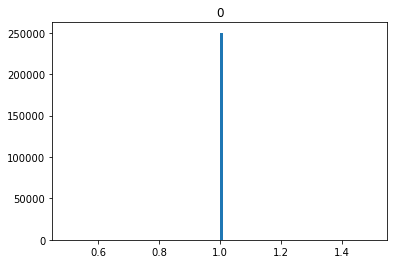

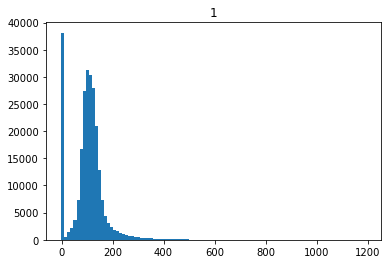

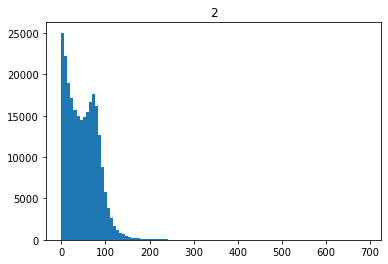

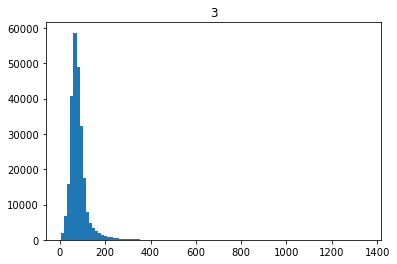

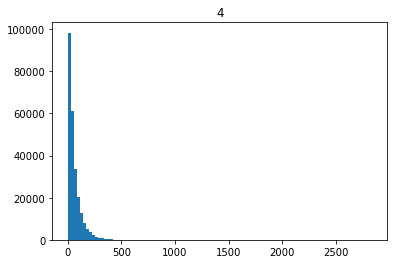

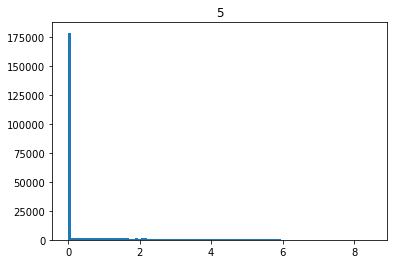

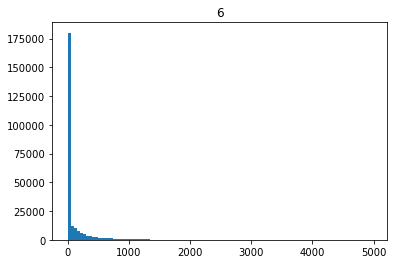

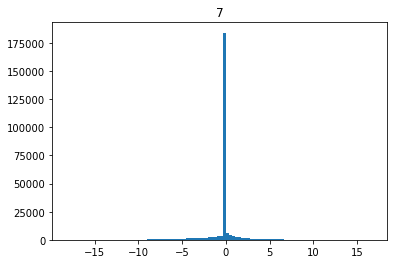

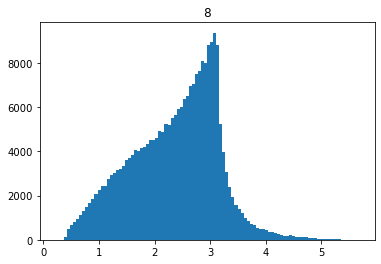

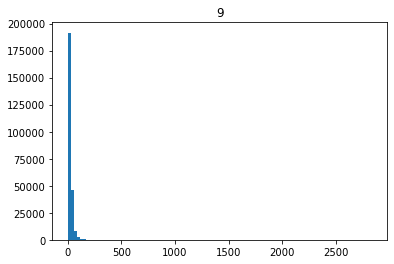

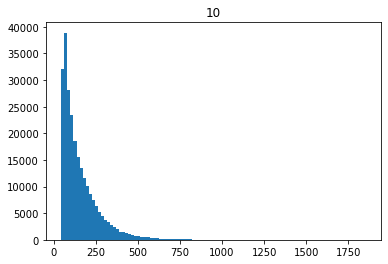

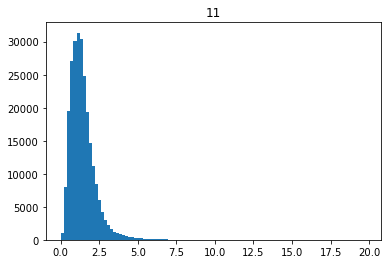

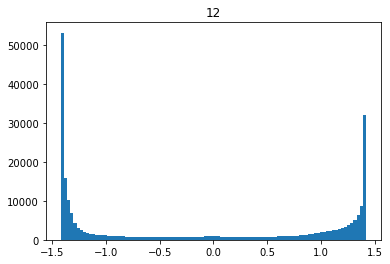

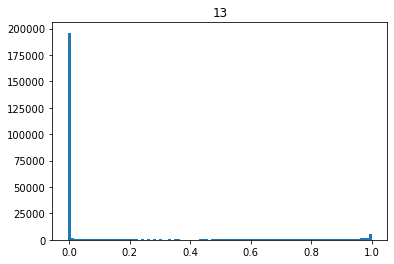

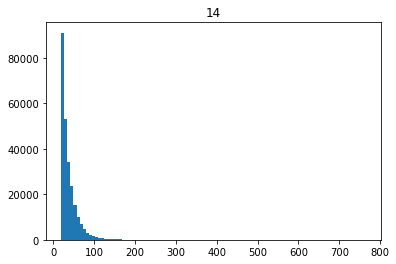

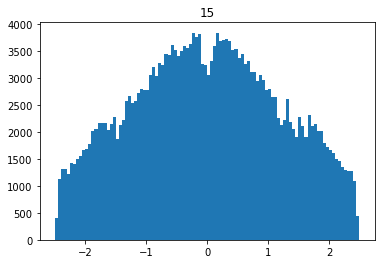

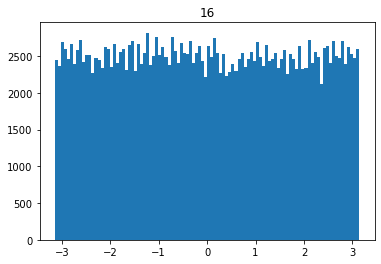

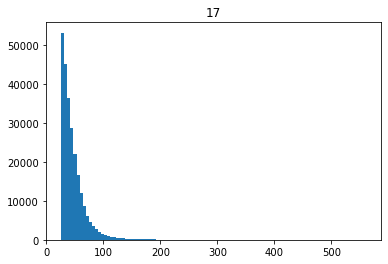

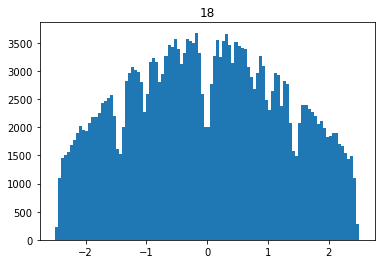

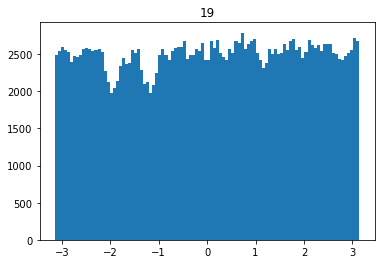

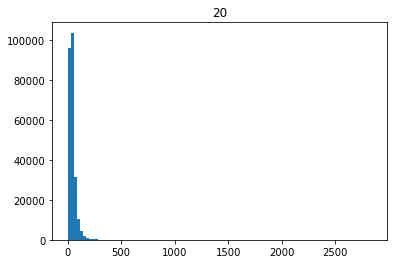

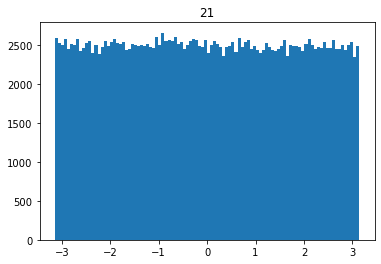

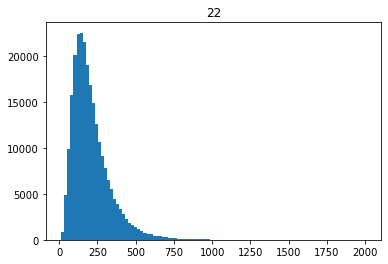

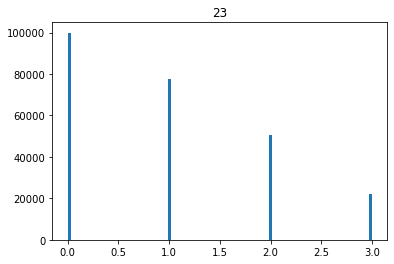

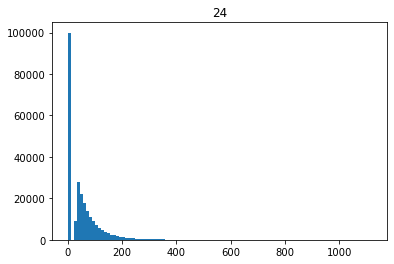

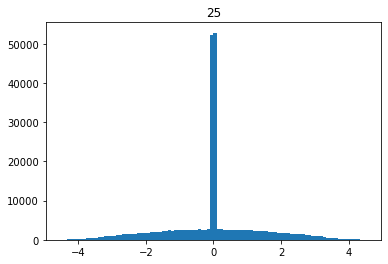

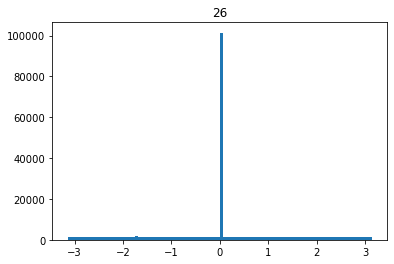

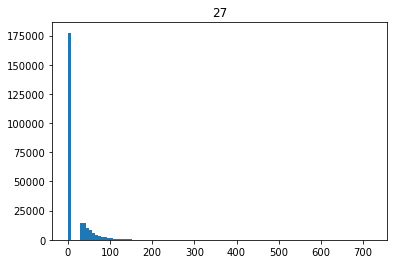

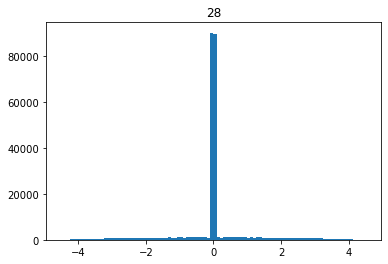

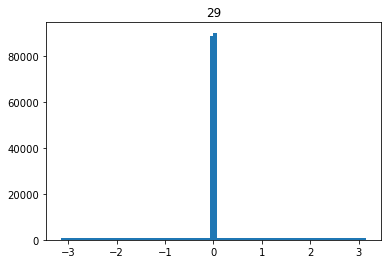

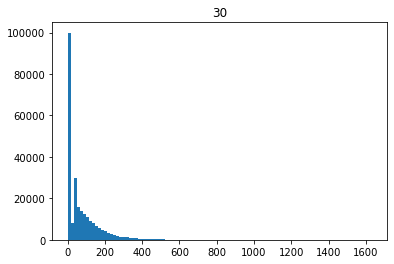

In [11]:
import matplotlib.pyplot as plt

for col in range(X_clean.shape[1]):
    plt.figure()
    plt.hist(X_clean[:,col], bins=100)
    plt.title(col)
    plt.show()

## Split data by Jet_num

In [12]:
#Define spliting thresholds for ["Feature", "Value"]
#thresh = [[19,0.5],
          #[19,1.5],
          #[19,2.5]]

thresh = [[23,0.5],
          [23,1.5],
          [23,2.5]]

#Returns set of all possible combinations of splits definded in thresh
#Last set in X_sets, Y_sets contains data split using all thresholds
X_sets, Y_sets, thresholds = split_data_set(X_clean, Y_train, thresh)
_, Test_ind, _ = split_data_set(X_clean, np.array(range(len(Y_train))), thresh)
print("Train split sizes:", [sets.shape[0] for sets in X_sets[-1]])

#Returns split data for test. Array containign indices is passed (Train_ind) and later used to re-merge prediction.
X_sets_t, Train_ind, thresholds = split_data_set(X_test_clean, np.array(range(X_test_clean.shape[0])), thresh)
print("Test split sizes:", [sets.shape[0] for sets in X_sets_t[-1]])

Train split sizes: [22164, 50379, 77544, 99913]
Test split sizes: [50794, 114648, 175338, 227458]


## Creating predictions for each split group
Data is split by Jet_num and processed. All four groups are processed identically, except for group4 where column 22 is removed (all nans).

Each group has a unique polynomial feature expansion. These specific expansions are obtained using test_for_gamma_all/stop functions. Where for each group, and increasing number of polynomials are tested (accounting for adjustments to gamma). See "Models_testing_split_data_logit.ipnyb"

#### Group 1

In [14]:
#Selecting expansions applied to each feature for each group
degree_test = [1, 1/2, 2, 1/3, 3, 1/4, 4, 1/5, 5, 1/6, 6, 1/7]


#Transforming Train Data
X_pass = X_sets[-1][0] #Select group
X_pass = np.delete(X_pass,23,axis=1) #Delete jet_nums column

deg_v = [degree_test for i in range(X_pass.shape[1])] #Define polynomials to use
ind_v = list(range(1,X_pass.shape[1])) #Define columns to expand

X_pass = build_poly_index(X_pass, ind_v, deg_v) #Build expanded array
X_pass, mean, std = standardize(X_pass) #Standardize

Y_pass = Y_sets[-1][0] #Select output vector

#Building model
initial_w = np.ones((X_pass.shape[1]))*(-0.01)
ws,loss = logistic_regression(Y_pass, X_pass, initial_w, max_iters=10000, gamma=0.2, print_=True)

#Transforming Test Data
Xt_pass = X_sets_t[-1][0]
Xt_pass = np.delete(Xt_pass,23,axis=1)
Xt_pass = build_poly_index(Xt_pass, ind_v, deg_v)
Xt_pass,_,_ = standardize_test(Xt_pass, mean, std)

#Building predictions
Y_test = sigmoid(Xt_pass.dot(ws))
Y_pred_G1 = probability_to_prediction(Y_test)

Current iteration=0, loss=0.7855999384483285
Current iteration=1, loss=0.6970216462937059
Current iteration=2, loss=0.6602503916987407
Current iteration=3, loss=0.6411397329025829
Current iteration=4, loss=0.6201373816805728
Current iteration=5, loss=0.607324598073492
Current iteration=6, loss=0.5932222072049067
Current iteration=7, loss=0.5838250163616457
Current iteration=8, loss=0.5742837157589794
Current iteration=9, loss=0.5671822262498665
Current iteration=10, loss=0.5602897918718309
Current iteration=11, loss=0.5546926692002445
Current iteration=12, loss=0.5494162828859314
Current iteration=13, loss=0.5448746254104674
Current iteration=14, loss=0.5406712427693374
Current iteration=15, loss=0.5369215261774749
Current iteration=16, loss=0.5334844798888232
Current iteration=17, loss=0.5303539930248115
Current iteration=18, loss=0.5274925247710254
Current iteration=19, loss=0.5248555726950076
Current iteration=20, loss=0.5224401702059277
Current iteration=21, loss=0.5201990831287298

Current iteration=186, loss=0.4648231033687328
Current iteration=187, loss=0.4647414599943546
Current iteration=188, loss=0.46466035726492205
Current iteration=189, loss=0.464579788277693
Current iteration=190, loss=0.4644997462528662
Current iteration=191, loss=0.4644202245307085
Current iteration=192, loss=0.46434121656876587
Current iteration=193, loss=0.4642627159391576
Current iteration=194, loss=0.4641847163259481
Current iteration=195, loss=0.4641072115225964
Current iteration=196, loss=0.46403019542947754
Current iteration=197, loss=0.4639536620514763
Current iteration=198, loss=0.46387760549564816
Current iteration=199, loss=0.46380201996894754
Current iteration=200, loss=0.4637268997760191
Current iteration=201, loss=0.46365223931705085
Current iteration=202, loss=0.463578033085687
Current iteration=203, loss=0.4635042756669989
Current iteration=204, loss=0.4634309617355109
Current iteration=205, loss=0.46335808605328
Current iteration=206, loss=0.4632856434680291
Current ite

Current iteration=374, loss=0.4548591760416064
Current iteration=375, loss=0.4548236770180852
Current iteration=376, loss=0.4547883100895532
Current iteration=377, loss=0.4547530744314699
Current iteration=378, loss=0.45471796919537033
Current iteration=379, loss=0.4546829935105962
Current iteration=380, loss=0.4546481464861015
Current iteration=381, loss=0.45461342721231274
Current iteration=382, loss=0.4545788347630259
Current iteration=383, loss=0.4545443681973206
Current iteration=384, loss=0.454510026561475
Current iteration=385, loss=0.45447580889086486
Current iteration=386, loss=0.4544417142118319
Current iteration=387, loss=0.45440774154350944
Current iteration=388, loss=0.4543738898995919
Current iteration=389, loss=0.45434015829003993
Current iteration=390, loss=0.45430654572271045
Current iteration=391, loss=0.45427305120490724
Current iteration=392, loss=0.4542396737448442
Current iteration=393, loss=0.45420641235301856
Current iteration=394, loss=0.45417326604349123
Curre

Current iteration=554, loss=0.4499113556349023
Current iteration=555, loss=0.44988948534739126
Current iteration=556, loss=0.4498676596735354
Current iteration=557, loss=0.44984587842121376
Current iteration=558, loss=0.4498241413995969
Current iteration=559, loss=0.4498024484191362
Current iteration=560, loss=0.44978079929155185
Current iteration=561, loss=0.44975919382982316
Current iteration=562, loss=0.44973763184817706
Current iteration=563, loss=0.44971611316207727
Current iteration=564, loss=0.44969463758821454
Current iteration=565, loss=0.44967320494449536
Current iteration=566, loss=0.4496518150500323
Current iteration=567, loss=0.44963046772513304
Current iteration=568, loss=0.44960916279129104
Current iteration=569, loss=0.44958790007117505
Current iteration=570, loss=0.4495666793886196
Current iteration=571, loss=0.44954550056861453
Current iteration=572, loss=0.449524363437296
Current iteration=573, loss=0.4495032678219368
Current iteration=574, loss=0.4494822135509362
Cu

Current iteration=731, loss=0.44659999287844276
Current iteration=732, loss=0.44658387758132617
Current iteration=733, loss=0.446567786092991
Current iteration=734, loss=0.44655171834410134
Current iteration=735, loss=0.446535674265655
Current iteration=736, loss=0.44651965378898123
Current iteration=737, loss=0.4465036568457392
Current iteration=738, loss=0.4464876833679146
Current iteration=739, loss=0.4464717332878187
Current iteration=740, loss=0.4464558065380848
Current iteration=741, loss=0.44643990305166714
Current iteration=742, loss=0.4464240227618384
Current iteration=743, loss=0.44640816560218693
Current iteration=744, loss=0.44639233150661584
Current iteration=745, loss=0.44637652040933967
Current iteration=746, loss=0.4463607322448831
Current iteration=747, loss=0.44634496694807835
Current iteration=748, loss=0.44632922445406364
Current iteration=749, loss=0.44631350469828057
Current iteration=750, loss=0.44629780761647253
Current iteration=751, loss=0.44628213314468246
Cu

Current iteration=910, loss=0.44404063546577643
Current iteration=911, loss=0.4440279184255684
Current iteration=912, loss=0.4440152165472268
Current iteration=913, loss=0.44400252979736077
Current iteration=914, loss=0.44398985814269504
Current iteration=915, loss=0.4439772015500691
Current iteration=916, loss=0.4439645599864371
Current iteration=917, loss=0.44395193341886685
Current iteration=918, loss=0.4439393218145396
Current iteration=919, loss=0.44392672514074916
Current iteration=920, loss=0.4439141433649014
Current iteration=921, loss=0.44390157645451433
Current iteration=922, loss=0.44388902437721633
Current iteration=923, loss=0.4438764871007467
Current iteration=924, loss=0.44386396459295446
Current iteration=925, loss=0.4438514568217982
Current iteration=926, loss=0.4438389637553454
Current iteration=927, loss=0.44382648536177177
Current iteration=928, loss=0.443814021609361
Current iteration=929, loss=0.44380157246650415
Current iteration=930, loss=0.44378913790169866
Cur

Current iteration=1083, loss=0.4420414216925631
Current iteration=1084, loss=0.442030911913973
Current iteration=1085, loss=0.44202041285984406
Current iteration=1086, loss=0.44200992451061527
Current iteration=1087, loss=0.44199944684677983
Current iteration=1088, loss=0.4419889798488854
Current iteration=1089, loss=0.4419785234975333
Current iteration=1090, loss=0.44196807777337876
Current iteration=1091, loss=0.44195764265713045
Current iteration=1092, loss=0.44194721812955046
Current iteration=1093, loss=0.44193680417145387
Current iteration=1094, loss=0.4419264007637088
Current iteration=1095, loss=0.44191600788723634
Current iteration=1096, loss=0.44190562552300955
Current iteration=1097, loss=0.44189525365205423
Current iteration=1098, loss=0.4418848922554486
Current iteration=1099, loss=0.44187454131432213
Current iteration=1100, loss=0.4418642008098566
Current iteration=1101, loss=0.44185387072328536
Current iteration=1102, loss=0.44184355103589273
Current iteration=1103, loss

Current iteration=1260, loss=0.44033236931173175
Current iteration=1261, loss=0.440323495714565
Current iteration=1262, loss=0.44031463007793026
Current iteration=1263, loss=0.440305772389532
Current iteration=1264, loss=0.440296922637106
Current iteration=1265, loss=0.4402880808084199
Current iteration=1266, loss=0.4402792468912719
Current iteration=1267, loss=0.44027042087349155
Current iteration=1268, loss=0.4402616027429399
Current iteration=1269, loss=0.4402527924875085
Current iteration=1270, loss=0.44024399009511994
Current iteration=1271, loss=0.4402351955537278
Current iteration=1272, loss=0.4402264088513165
Current iteration=1273, loss=0.44021762997590086
Current iteration=1274, loss=0.44020885891552647
Current iteration=1275, loss=0.4402000956582695
Current iteration=1276, loss=0.4401913401922368
Current iteration=1277, loss=0.44018259250556524
Current iteration=1278, loss=0.4401738525864222
Current iteration=1279, loss=0.44016512042300526
Current iteration=1280, loss=0.4401

Current iteration=1433, loss=0.4389062903369326
Current iteration=1434, loss=0.43889863503403787
Current iteration=1435, loss=0.43889098597210513
Current iteration=1436, loss=0.43888334314324906
Current iteration=1437, loss=0.4388757065396044
Current iteration=1438, loss=0.43886807615332546
Current iteration=1439, loss=0.4388604519765868
Current iteration=1440, loss=0.43885283400158287
Current iteration=1441, loss=0.4388452222205275
Current iteration=1442, loss=0.4388376166256545
Current iteration=1443, loss=0.43883001720921727
Current iteration=1444, loss=0.4388224239634888
Current iteration=1445, loss=0.43881483688076156
Current iteration=1446, loss=0.4388072559533475
Current iteration=1447, loss=0.43879968117357826
Current iteration=1448, loss=0.43879211253380446
Current iteration=1449, loss=0.4387845500263961
Current iteration=1450, loss=0.43877699364374273
Current iteration=1451, loss=0.4387694433782528
Current iteration=1452, loss=0.43876189922235403
Current iteration=1453, loss=

Current iteration=1608, loss=0.43765539364954237
Current iteration=1609, loss=0.437648726035323
Current iteration=1610, loss=0.4376420635419054
Current iteration=1611, loss=0.4376354061641728
Current iteration=1612, loss=0.4376287538970215
Current iteration=1613, loss=0.43762210673536045
Current iteration=1614, loss=0.43761546467411144
Current iteration=1615, loss=0.43760882770820897
Current iteration=1616, loss=0.4376021958326006
Current iteration=1617, loss=0.4375955690422466
Current iteration=1618, loss=0.43758894733212006
Current iteration=1619, loss=0.4375823306972066
Current iteration=1620, loss=0.43757571913250515
Current iteration=1621, loss=0.43756911263302734
Current iteration=1622, loss=0.43756251119379747
Current iteration=1623, loss=0.437555914809853
Current iteration=1624, loss=0.437549323476244
Current iteration=1625, loss=0.4375427371880336
Current iteration=1626, loss=0.4375361559402978
Current iteration=1627, loss=0.4375295797281258
Current iteration=1628, loss=0.4375

Current iteration=1782, loss=0.4365688576408152
Current iteration=1783, loss=0.43656304297005216
Current iteration=1784, loss=0.4365572341462594
Current iteration=1785, loss=0.4365514312282099
Current iteration=1786, loss=0.43654563427632664
Current iteration=1787, loss=0.43653984335262047
Current iteration=1788, loss=0.4365340585206129
Current iteration=1789, loss=0.4365282798452468
Current iteration=1790, loss=0.43652250739278053
Current iteration=1791, loss=0.43651674123066714
Current iteration=1792, loss=0.4365109814274163
Current iteration=1793, loss=0.4365052280524397
Current iteration=1794, loss=0.43649948117587833
Current iteration=1795, loss=0.43649374086841203
Current iteration=1796, loss=0.4364880072010499
Current iteration=1797, loss=0.4364822802449046
Current iteration=1798, loss=0.436476560070945
Current iteration=1799, loss=0.4364708467497352
Current iteration=1800, loss=0.43646514035115325
Current iteration=1801, loss=0.4364594409440957
Current iteration=1802, loss=0.43

Current iteration=1957, loss=0.4356423888647576
Current iteration=1958, loss=0.4356375056930186
Current iteration=1959, loss=0.4356326265716469
Current iteration=1960, loss=0.43562775149751537
Current iteration=1961, loss=0.4356228804674998
Current iteration=1962, loss=0.4356180134784791
Current iteration=1963, loss=0.43561315052733524
Current iteration=1964, loss=0.4356082916109525
Current iteration=1965, loss=0.43560343672621843
Current iteration=1966, loss=0.435598585870023
Current iteration=1967, loss=0.43559373903925874
Current iteration=1968, loss=0.43558889623082064
Current iteration=1969, loss=0.4355840574416062
Current iteration=1970, loss=0.4355792226685154
Current iteration=1971, loss=0.4355743919084502
Current iteration=1972, loss=0.43556956515831513
Current iteration=1973, loss=0.4355647424150165
Current iteration=1974, loss=0.4355599236754632
Current iteration=1975, loss=0.43555510893656574
Current iteration=1976, loss=0.43555029819523683
Current iteration=1977, loss=0.43

Current iteration=2131, loss=0.4348510344822357
Current iteration=2132, loss=0.4348468100617426
Current iteration=2133, loss=0.43484258916083013
Current iteration=2134, loss=0.43483837177643736
Current iteration=2135, loss=0.43483415790550345
Current iteration=2136, loss=0.43482994754496657
Current iteration=2137, loss=0.43482574069176483
Current iteration=2138, loss=0.4348215373428358
Current iteration=2139, loss=0.4348173374951167
Current iteration=2140, loss=0.43481314114554437
Current iteration=2141, loss=0.4348089482910551
Current iteration=2142, loss=0.43480475892858506
Current iteration=2143, loss=0.43480057305506964
Current iteration=2144, loss=0.4347963906674442
Current iteration=2145, loss=0.4347922117626437
Current iteration=2146, loss=0.4347880363376025
Current iteration=2147, loss=0.4347838643892547
Current iteration=2148, loss=0.43477969591453425
Current iteration=2149, loss=0.43477553091037446
Current iteration=2150, loss=0.43477136937370836
Current iteration=2151, loss=

Current iteration=2307, loss=0.43415899827002113
Current iteration=2308, loss=0.43415534610747414
Current iteration=2309, loss=0.43415169692745775
Current iteration=2310, loss=0.43414805072699214
Current iteration=2311, loss=0.4341444075030989
Current iteration=2312, loss=0.4341407672528011
Current iteration=2313, loss=0.4341371299731237
Current iteration=2314, loss=0.43413349566109305
Current iteration=2315, loss=0.43412986431373707
Current iteration=2316, loss=0.4341262359280855
Current iteration=2317, loss=0.4341226105011695
Current iteration=2318, loss=0.4341189880300221
Current iteration=2319, loss=0.4341153685116776
Current iteration=2320, loss=0.4341117519431726
Current iteration=2321, loss=0.43410813832154493
Current iteration=2322, loss=0.43410452764383417
Current iteration=2323, loss=0.4341009199070816
Current iteration=2324, loss=0.43409731510833033
Current iteration=2325, loss=0.4340937132446251
Current iteration=2326, loss=0.4340901143130125
Current iteration=2327, loss=0.

Current iteration=2481, loss=0.4335659114192629
Current iteration=2482, loss=0.4335627350886206
Current iteration=2483, loss=0.4335595612538048
Current iteration=2484, loss=0.43355638991223827
Current iteration=2485, loss=0.4335532210613468
Current iteration=2486, loss=0.4335500546985592
Current iteration=2487, loss=0.43354689082130643
Current iteration=2488, loss=0.43354372942702274
Current iteration=2489, loss=0.4335405705131451
Current iteration=2490, loss=0.43353741407711305
Current iteration=2491, loss=0.4335342601163692
Current iteration=2492, loss=0.4335311086283586
Current iteration=2493, loss=0.4335279596105293
Current iteration=2494, loss=0.4335248130603322
Current iteration=2495, loss=0.4335216689752207
Current iteration=2496, loss=0.4335185273526514
Current iteration=2497, loss=0.43351538819008334
Current iteration=2498, loss=0.43351225148497846
Current iteration=2499, loss=0.4335091172348016
Current iteration=2500, loss=0.4335059854370203
Current iteration=2501, loss=0.433

Current iteration=2657, loss=0.4330431191403878
Current iteration=2658, loss=0.4330403448824536
Current iteration=2659, loss=0.43303757270959903
Current iteration=2660, loss=0.4330348026197294
Current iteration=2661, loss=0.4330320346107527
Current iteration=2662, loss=0.4330292686805795
Current iteration=2663, loss=0.4330265048271228
Current iteration=2664, loss=0.4330237430482983
Current iteration=2665, loss=0.43302098334202416
Current iteration=2666, loss=0.433018225706221
Current iteration=2667, loss=0.43301547013881214
Current iteration=2668, loss=0.4330127166377234
Current iteration=2669, loss=0.43300996520088286
Current iteration=2670, loss=0.4330072158262216
Current iteration=2671, loss=0.43300446851167285
Current iteration=2672, loss=0.4330017232551726
Current iteration=2673, loss=0.43299898005465925
Current iteration=2674, loss=0.4329962389080736
Current iteration=2675, loss=0.43299349981335905
Current iteration=2676, loss=0.4329907627684617
Current iteration=2677, loss=0.432

Current iteration=2833, loss=0.4325851831817259
Current iteration=2834, loss=0.432582745787522
Current iteration=2835, loss=0.4325803101459064
Current iteration=2836, loss=0.43257787625517813
Current iteration=2837, loss=0.4325754441136383
Current iteration=2838, loss=0.43257301371958956
Current iteration=2839, loss=0.4325705850713368
Current iteration=2840, loss=0.43256815816718647
Current iteration=2841, loss=0.43256573300544715
Current iteration=2842, loss=0.43256330958442935
Current iteration=2843, loss=0.4325608879024452
Current iteration=2844, loss=0.43255846795780883
Current iteration=2845, loss=0.43255604974883644
Current iteration=2846, loss=0.4325536332738458
Current iteration=2847, loss=0.4325512185311566
Current iteration=2848, loss=0.43254880551909053
Current iteration=2849, loss=0.4325463942359712
Current iteration=2850, loss=0.4325439846801237
Current iteration=2851, loss=0.4325415768498755
Current iteration=2852, loss=0.43253917074355536
Current iteration=2853, loss=0.4

Current iteration=3014, loss=0.432170988205168
Current iteration=3015, loss=0.43216884202238737
Current iteration=3016, loss=0.4321666973120638
Current iteration=3017, loss=0.43216455407278836
Current iteration=3018, loss=0.43216241230315317
Current iteration=3019, loss=0.43216027200175194
Current iteration=3020, loss=0.4321581331671794
Current iteration=3021, loss=0.43215599579803193
Current iteration=3022, loss=0.4321538598929074
Current iteration=3023, loss=0.4321517254504046
Current iteration=3024, loss=0.43214959246912393
Current iteration=3025, loss=0.4321474609476671
Current iteration=3026, loss=0.43214533088463714
Current iteration=3027, loss=0.43214320227863856
Current iteration=3028, loss=0.4321410751282769
Current iteration=3029, loss=0.4321389494321595
Current iteration=3030, loss=0.4321368251888945
Current iteration=3031, loss=0.43213470239709184
Current iteration=3032, loss=0.43213258105536256
Current iteration=3033, loss=0.43213046116231896
Current iteration=3034, loss=0

Current iteration=3185, loss=0.4318242838749508
Current iteration=3186, loss=0.43182237004905005
Current iteration=3187, loss=0.4318204574728995
Current iteration=3188, loss=0.43181854614529697
Current iteration=3189, loss=0.43181663606504134
Current iteration=3190, loss=0.4318147272309326
Current iteration=3191, loss=0.43181281964177204
Current iteration=3192, loss=0.4318109132963615
Current iteration=3193, loss=0.43180900819350454
Current iteration=3194, loss=0.43180710433200525
Current iteration=3195, loss=0.43180520171066916
Current iteration=3196, loss=0.43180330032830255
Current iteration=3197, loss=0.43180140018371327
Current iteration=3198, loss=0.4317995012757099
Current iteration=3199, loss=0.43179760360310204
Current iteration=3200, loss=0.43179570716470067
Current iteration=3201, loss=0.4317938119593175
Current iteration=3202, loss=0.43179191798576555
Current iteration=3203, loss=0.4317900252428589
Current iteration=3204, loss=0.43178813372941266
Current iteration=3205, los

Current iteration=3364, loss=0.43150053247616255
Current iteration=3365, loss=0.4314988241880123
Current iteration=3366, loss=0.43149711695091086
Current iteration=3367, loss=0.43149541076383713
Current iteration=3368, loss=0.43149370562577094
Current iteration=3369, loss=0.4314920015356933
Current iteration=3370, loss=0.4314902984925857
Current iteration=3371, loss=0.4314885964954312
Current iteration=3372, loss=0.4314868955432132
Current iteration=3373, loss=0.4314851956349164
Current iteration=3374, loss=0.4314834967695264
Current iteration=3375, loss=0.43148179894602967
Current iteration=3376, loss=0.4314801021634137
Current iteration=3377, loss=0.43147840642066676
Current iteration=3378, loss=0.43147671171677837
Current iteration=3379, loss=0.4314750180507388
Current iteration=3380, loss=0.43147332542153916
Current iteration=3381, loss=0.4314716338281716
Current iteration=3382, loss=0.43146994326962923
Current iteration=3383, loss=0.43146825374490627
Current iteration=3384, loss=0

Current iteration=3547, loss=0.43120443491832106
Current iteration=3548, loss=0.43120290289544677
Current iteration=3549, loss=0.4312013717519917
Current iteration=3550, loss=0.43119984148709894
Current iteration=3551, loss=0.4311983120999125
Current iteration=3552, loss=0.43119678358957714
Current iteration=3553, loss=0.4311952559552388
Current iteration=3554, loss=0.4311937291960436
Current iteration=3555, loss=0.43119220331113933
Current iteration=3556, loss=0.43119067829967395
Current iteration=3557, loss=0.43118915416079656
Current iteration=3558, loss=0.43118763089365714
Current iteration=3559, loss=0.4311861084974066
Current iteration=3560, loss=0.4311845869711961
Current iteration=3561, loss=0.4311830663141785
Current iteration=3562, loss=0.43118154652550683
Current iteration=3563, loss=0.4311800276043353
Current iteration=3564, loss=0.43117850954981884
Current iteration=3565, loss=0.4311769923611133
Current iteration=3566, loss=0.4311754760373752
Current iteration=3567, loss=0

Current iteration=3733, loss=0.4309337447837451
Current iteration=3734, loss=0.43093236245713357
Current iteration=3735, loss=0.4309309808645392
Current iteration=3736, loss=0.4309296000052527
Current iteration=3737, loss=0.4309282198785658
Current iteration=3738, loss=0.4309268404837706
Current iteration=3739, loss=0.43092546182016017
Current iteration=3740, loss=0.4309240838870286
Current iteration=3741, loss=0.43092270668367
Current iteration=3742, loss=0.43092133020938
Current iteration=3743, loss=0.43091995446345427
Current iteration=3744, loss=0.4309185794451898
Current iteration=3745, loss=0.430917205153884
Current iteration=3746, loss=0.43091583158883495
Current iteration=3747, loss=0.4309144587493417
Current iteration=3748, loss=0.4309130866347038
Current iteration=3749, loss=0.4309117152442217
Current iteration=3750, loss=0.4309103445771966
Current iteration=3751, loss=0.43090897463293026
Current iteration=3752, loss=0.43090760541072526
Current iteration=3753, loss=0.43090623

Current iteration=3905, loss=0.4307062133853459
Current iteration=3906, loss=0.4307049474750832
Current iteration=3907, loss=0.430703682187221
Current iteration=3908, loss=0.4307024175211679
Current iteration=3909, loss=0.4307011534763337
Current iteration=3910, loss=0.4306998900521287
Current iteration=3911, loss=0.4306986272479637
Current iteration=3912, loss=0.4306973650632503
Current iteration=3913, loss=0.43069610349740045
Current iteration=3914, loss=0.43069484254982693
Current iteration=3915, loss=0.43069358221994325
Current iteration=3916, loss=0.4306923225071634
Current iteration=3917, loss=0.430691063410902
Current iteration=3918, loss=0.43068980493057435
Current iteration=3919, loss=0.4306885470655964
Current iteration=3920, loss=0.43068728981538446
Current iteration=3921, loss=0.4306860331793559
Current iteration=3922, loss=0.4306847771569285
Current iteration=3923, loss=0.4306835217475207
Current iteration=3924, loss=0.43068226695055145
Current iteration=3925, loss=0.43068

Current iteration=4087, loss=0.4304855122653326
Current iteration=4088, loss=0.4304843504969091
Current iteration=4089, loss=0.4304831892531669
Current iteration=4090, loss=0.43048202853362044
Current iteration=4091, loss=0.430480868337785
Current iteration=4092, loss=0.4304797086651758
Current iteration=4093, loss=0.4304785495153093
Current iteration=4094, loss=0.4304773908877019
Current iteration=4095, loss=0.43047623278187086
Current iteration=4096, loss=0.43047507519733386
Current iteration=4097, loss=0.4304739181336091
Current iteration=4098, loss=0.4304727615902152
Current iteration=4099, loss=0.4304716055666715
Current iteration=4100, loss=0.4304704500624978
Current iteration=4101, loss=0.4304692950772143
Current iteration=4102, loss=0.430468140610342
Current iteration=4103, loss=0.430466986661402
Current iteration=4104, loss=0.4304658332299163
Current iteration=4105, loss=0.4304646803154072
Current iteration=4106, loss=0.4304635279173976
Current iteration=4107, loss=0.430462376

Current iteration=4257, loss=0.43029517522886235
Current iteration=4258, loss=0.43029409608789515
Current iteration=4259, loss=0.4302930173962097
Current iteration=4260, loss=0.43029193915340225
Current iteration=4261, loss=0.4302908613590697
Current iteration=4262, loss=0.4302897840128091
Current iteration=4263, loss=0.4302887071142183
Current iteration=4264, loss=0.43028763066289527
Current iteration=4265, loss=0.43028655465843874
Current iteration=4266, loss=0.4302854791004475
Current iteration=4267, loss=0.430284403988521
Current iteration=4268, loss=0.43028332932225916
Current iteration=4269, loss=0.43028225510126217
Current iteration=4270, loss=0.4302811813251307
Current iteration=4271, loss=0.4302801079934661
Current iteration=4272, loss=0.4302790351058697
Current iteration=4273, loss=0.4302779626619435
Current iteration=4274, loss=0.4302768906612902
Current iteration=4275, loss=0.4302758191035124
Current iteration=4276, loss=0.4302747479882135
Current iteration=4277, loss=0.430

Current iteration=4435, loss=0.4301098096391566
Current iteration=4436, loss=0.4301088044965773
Current iteration=4437, loss=0.4301077997378827
Current iteration=4438, loss=0.4301067953627396
Current iteration=4439, loss=0.4301057913708153
Current iteration=4440, loss=0.43010478776177724
Current iteration=4441, loss=0.4301037845352934
Current iteration=4442, loss=0.4301027816910322
Current iteration=4443, loss=0.430101779228662
Current iteration=4444, loss=0.430100777147852
Current iteration=4445, loss=0.4300997754482715
Current iteration=4446, loss=0.43009877412959013
Current iteration=4447, loss=0.430097773191478
Current iteration=4448, loss=0.4300967726336054
Current iteration=4449, loss=0.43009577245564334
Current iteration=4450, loss=0.43009477265726265
Current iteration=4451, loss=0.43009377323813486
Current iteration=4452, loss=0.4300927741979318
Current iteration=4453, loss=0.4300917755363257
Current iteration=4454, loss=0.43009077725298894
Current iteration=4455, loss=0.430089

Current iteration=4613, loss=0.4299366475681878
Current iteration=4614, loss=0.4299357058225972
Current iteration=4615, loss=0.42993476440684636
Current iteration=4616, loss=0.42993382332065966
Current iteration=4617, loss=0.4299328825637616
Current iteration=4618, loss=0.4299319421358769
Current iteration=4619, loss=0.4299310020367307
Current iteration=4620, loss=0.4299300622660483
Current iteration=4621, loss=0.42992912282355555
Current iteration=4622, loss=0.42992818370897845
Current iteration=4623, loss=0.4299272449220431
Current iteration=4624, loss=0.4299263064624762
Current iteration=4625, loss=0.42992536833000455
Current iteration=4626, loss=0.4299244305243553
Current iteration=4627, loss=0.42992349304525573
Current iteration=4628, loss=0.4299225558924337
Current iteration=4629, loss=0.4299216190656171
Current iteration=4630, loss=0.4299206825645343
Current iteration=4631, loss=0.4299197463889137
Current iteration=4632, loss=0.42991881053848424
Current iteration=4633, loss=0.42

Current iteration=4801, loss=0.4297651107998521
Current iteration=4802, loss=0.4297642265165256
Current iteration=4803, loss=0.42976334251594345
Current iteration=4804, loss=0.42976245879787883
Current iteration=4805, loss=0.4297615753621051
Current iteration=4806, loss=0.429760692208396
Current iteration=4807, loss=0.4297598093365254
Current iteration=4808, loss=0.4297589267462674
Current iteration=4809, loss=0.4297580444373965
Current iteration=4810, loss=0.42975716240968725
Current iteration=4811, loss=0.42975628066291455
Current iteration=4812, loss=0.42975539919685324
Current iteration=4813, loss=0.4297545180112788
Current iteration=4814, loss=0.42975363710596665
Current iteration=4815, loss=0.42975275648069267
Current iteration=4816, loss=0.4297518761352328
Current iteration=4817, loss=0.42975099606936323
Current iteration=4818, loss=0.4297501162828605
Current iteration=4819, loss=0.4297492367755011
Current iteration=4820, loss=0.42974835754706203
Current iteration=4821, loss=0.4

Current iteration=4976, loss=0.4296144753342926
Current iteration=4977, loss=0.42961363727291146
Current iteration=4978, loss=0.42961279945790476
Current iteration=4979, loss=0.4296119618890825
Current iteration=4980, loss=0.42961112456625505
Current iteration=4981, loss=0.4296102874892329
Current iteration=4982, loss=0.42960945065782663
Current iteration=4983, loss=0.42960861407184714
Current iteration=4984, loss=0.42960777773110553
Current iteration=4985, loss=0.42960694163541296
Current iteration=4986, loss=0.42960610578458097
Current iteration=4987, loss=0.42960527017842104
Current iteration=4988, loss=0.42960443481674493
Current iteration=4989, loss=0.42960359969936485
Current iteration=4990, loss=0.4296027648260927
Current iteration=4991, loss=0.42960193019674103
Current iteration=4992, loss=0.42960109581112244
Current iteration=4993, loss=0.4296002616690495
Current iteration=4994, loss=0.4295994277703352
Current iteration=4995, loss=0.4295985941147928
Current iteration=4996, los

Current iteration=5148, loss=0.42947380014728836
Current iteration=5149, loss=0.429473001820594
Current iteration=5150, loss=0.42947220371023254
Current iteration=5151, loss=0.42947140581604404
Current iteration=5152, loss=0.42947060813786825
Current iteration=5153, loss=0.4294698106755452
Current iteration=5154, loss=0.4294690134289153
Current iteration=5155, loss=0.4294682163978189
Current iteration=5156, loss=0.4294674195820966
Current iteration=5157, loss=0.42946662298158905
Current iteration=5158, loss=0.4294658265961372
Current iteration=5159, loss=0.4294650304255819
Current iteration=5160, loss=0.42946423446976456
Current iteration=5161, loss=0.4294634387285264
Current iteration=5162, loss=0.4294626432017089
Current iteration=5163, loss=0.42946184788915376
Current iteration=5164, loss=0.4294610527907028
Current iteration=5165, loss=0.42946025790619796
Current iteration=5166, loss=0.42945946323548123
Current iteration=5167, loss=0.429458668778395
Current iteration=5168, loss=0.42

Current iteration=5323, loss=0.4293372516533076
Current iteration=5324, loss=0.4293364888762592
Current iteration=5325, loss=0.42933572628973543
Current iteration=5326, loss=0.4293349638936009
Current iteration=5327, loss=0.4293342016877203
Current iteration=5328, loss=0.42933343967195864
Current iteration=5329, loss=0.42933267784618057
Current iteration=5330, loss=0.42933191621025146
Current iteration=5331, loss=0.42933115476403644
Current iteration=5332, loss=0.42933039350740093
Current iteration=5333, loss=0.4293296324402105
Current iteration=5334, loss=0.4293288715623305
Current iteration=5335, loss=0.4293281108736269
Current iteration=5336, loss=0.42932735037396547
Current iteration=5337, loss=0.42932659006321233
Current iteration=5338, loss=0.4293258299412333
Current iteration=5339, loss=0.42932507000789505
Current iteration=5340, loss=0.4293243102630635
Current iteration=5341, loss=0.42932355070660566
Current iteration=5342, loss=0.42932279133838774
Current iteration=5343, loss=

Current iteration=5498, loss=0.4292065521874846
Current iteration=5499, loss=0.4292058207981134
Current iteration=5500, loss=0.42920508957740444
Current iteration=5501, loss=0.4292043585252426
Current iteration=5502, loss=0.42920362764151315
Current iteration=5503, loss=0.42920289692610125
Current iteration=5504, loss=0.42920216637889214
Current iteration=5505, loss=0.4292014359997715
Current iteration=5506, loss=0.4292007057886247
Current iteration=5507, loss=0.42919997574533736
Current iteration=5508, loss=0.42919924586979524
Current iteration=5509, loss=0.4291985161618842
Current iteration=5510, loss=0.4291977866214903
Current iteration=5511, loss=0.42919705724849955
Current iteration=5512, loss=0.42919632804279806
Current iteration=5513, loss=0.4291955990042722
Current iteration=5514, loss=0.4291948701328082
Current iteration=5515, loss=0.4291941414282927
Current iteration=5516, loss=0.42919341289061225
Current iteration=5517, loss=0.4291926845196535
Current iteration=5518, loss=0.

Current iteration=5673, loss=0.42908102982296065
Current iteration=5674, loss=0.4290803262874864
Current iteration=5675, loss=0.4290796229020659
Current iteration=5676, loss=0.4290789196666012
Current iteration=5677, loss=0.42907821658099415
Current iteration=5678, loss=0.4290775136451469
Current iteration=5679, loss=0.4290768108589616
Current iteration=5680, loss=0.4290761082223404
Current iteration=5681, loss=0.4290754057351857
Current iteration=5682, loss=0.42907470339739995
Current iteration=5683, loss=0.42907400120888545
Current iteration=5684, loss=0.4290732991695451
Current iteration=5685, loss=0.42907259727928126
Current iteration=5686, loss=0.4290718955379969
Current iteration=5687, loss=0.4290711939455948
Current iteration=5688, loss=0.42907049250197793
Current iteration=5689, loss=0.42906979120704913
Current iteration=5690, loss=0.42906909006071176
Current iteration=5691, loss=0.42906838906286887
Current iteration=5692, loss=0.4290676882134237
Current iteration=5693, loss=0.

Current iteration=5844, loss=0.4289628288641336
Current iteration=5845, loss=0.42896214963046436
Current iteration=5846, loss=0.4289614705312726
Current iteration=5847, loss=0.4289607915664739
Current iteration=5848, loss=0.42896011273598394
Current iteration=5849, loss=0.4289594340397186
Current iteration=5850, loss=0.4289587554775937
Current iteration=5851, loss=0.42895807704952504
Current iteration=5852, loss=0.42895739875542865
Current iteration=5853, loss=0.42895672059522044
Current iteration=5854, loss=0.42895604256881675
Current iteration=5855, loss=0.42895536467613354
Current iteration=5856, loss=0.4289546869170872
Current iteration=5857, loss=0.42895400929159405
Current iteration=5858, loss=0.4289533317995705
Current iteration=5859, loss=0.42895265444093295
Current iteration=5860, loss=0.428951977215598
Current iteration=5861, loss=0.4289513001234823
Current iteration=5862, loss=0.42895062316450255
Current iteration=5863, loss=0.4289499463385754
Current iteration=5864, loss=0.

Current iteration=6019, loss=0.4288459389617191
Current iteration=6020, loss=0.42884528203816746
Current iteration=6021, loss=0.42884462523537464
Current iteration=6022, loss=0.428843968553268
Current iteration=6023, loss=0.42884331199177483
Current iteration=6024, loss=0.42884265555082257
Current iteration=6025, loss=0.42884199923033883
Current iteration=6026, loss=0.4288413430302511
Current iteration=6027, loss=0.4288406869504872
Current iteration=6028, loss=0.4288400309909745
Current iteration=6029, loss=0.42883937515164106
Current iteration=6030, loss=0.4288387194324145
Current iteration=6031, loss=0.4288380638332228
Current iteration=6032, loss=0.42883740835399375
Current iteration=6033, loss=0.42883675299465557
Current iteration=6034, loss=0.42883609775513615
Current iteration=6035, loss=0.4288354426353637
Current iteration=6036, loss=0.4288347876352663
Current iteration=6037, loss=0.42883413275477233
Current iteration=6038, loss=0.42883347799381005
Current iteration=6039, loss=0

Current iteration=6194, loss=0.42873275431989105
Current iteration=6195, loss=0.4287321174741374
Current iteration=6196, loss=0.42873148073730427
Current iteration=6197, loss=0.42873084410932866
Current iteration=6198, loss=0.4287302075901479
Current iteration=6199, loss=0.428729571179699
Current iteration=6200, loss=0.42872893487791947
Current iteration=6201, loss=0.42872829868474654
Current iteration=6202, loss=0.4287276626001177
Current iteration=6203, loss=0.42872702662397044
Current iteration=6204, loss=0.428726390756242
Current iteration=6205, loss=0.4287257549968704
Current iteration=6206, loss=0.42872511934579277
Current iteration=6207, loss=0.4287244838029471
Current iteration=6208, loss=0.4287238483682709
Current iteration=6209, loss=0.4287232130417019
Current iteration=6210, loss=0.42872257782317813
Current iteration=6211, loss=0.42872194271263725
Current iteration=6212, loss=0.42872130771001726
Current iteration=6213, loss=0.42872067281525617
Current iteration=6214, loss=0.

Current iteration=6368, loss=0.42862353011280835
Current iteration=6369, loss=0.428622911315667
Current iteration=6370, loss=0.42862229261724016
Current iteration=6371, loss=0.42862167401747303
Current iteration=6372, loss=0.4286210555163111
Current iteration=6373, loss=0.4286204371136997
Current iteration=6374, loss=0.4286198188095845
Current iteration=6375, loss=0.42861920060391084
Current iteration=6376, loss=0.42861858249662443
Current iteration=6377, loss=0.4286179644876707
Current iteration=6378, loss=0.4286173465769956
Current iteration=6379, loss=0.4286167287645446
Current iteration=6380, loss=0.42861611105026354
Current iteration=6381, loss=0.42861549343409827
Current iteration=6382, loss=0.4286148759159945
Current iteration=6383, loss=0.4286142584958981
Current iteration=6384, loss=0.42861364117375506
Current iteration=6385, loss=0.42861302394951134
Current iteration=6386, loss=0.4286124068231129
Current iteration=6387, loss=0.4286117897945059
Current iteration=6388, loss=0.4

Current iteration=6542, loss=0.42851729955566575
Current iteration=6543, loss=0.42851669714829965
Current iteration=6544, loss=0.4285160948307576
Current iteration=6545, loss=0.42851549260299177
Current iteration=6546, loss=0.4285148904649547
Current iteration=6547, loss=0.4285142884165989
Current iteration=6548, loss=0.4285136864578764
Current iteration=6549, loss=0.42851308458873993
Current iteration=6550, loss=0.42851248280914184
Current iteration=6551, loss=0.4285118811190348
Current iteration=6552, loss=0.4285112795183712
Current iteration=6553, loss=0.4285106780071037
Current iteration=6554, loss=0.4285100765851849
Current iteration=6555, loss=0.4285094752525676
Current iteration=6556, loss=0.4285088740092044
Current iteration=6557, loss=0.42850827285504806
Current iteration=6558, loss=0.42850767179005117
Current iteration=6559, loss=0.42850707081416695
Current iteration=6560, loss=0.4285064699273479
Current iteration=6561, loss=0.428505869129547
Current iteration=6562, loss=0.42

Current iteration=6716, loss=0.4284137927676781
Current iteration=6717, loss=0.4284132053022282
Current iteration=6718, loss=0.42841261791882673
Current iteration=6719, loss=0.4284120306174318
Current iteration=6720, loss=0.42841144339800163
Current iteration=6721, loss=0.4284108562604945
Current iteration=6722, loss=0.42841026920486874
Current iteration=6723, loss=0.42840968223108267
Current iteration=6724, loss=0.4284090953390945
Current iteration=6725, loss=0.42840850852886275
Current iteration=6726, loss=0.4284079218003457
Current iteration=6727, loss=0.42840733515350204
Current iteration=6728, loss=0.42840674858829003
Current iteration=6729, loss=0.42840616210466836
Current iteration=6730, loss=0.4284055757025954
Current iteration=6731, loss=0.42840498938202975
Current iteration=6732, loss=0.4284044031429301
Current iteration=6733, loss=0.4284038169852549
Current iteration=6734, loss=0.4284032309089631
Current iteration=6735, loss=0.4284026449140131
Current iteration=6736, loss=0.

Current iteration=6890, loss=0.4283127737331445
Current iteration=6891, loss=0.42831219994085096
Current iteration=6892, loss=0.4283116262237783
Current iteration=6893, loss=0.42831105258188973
Current iteration=6894, loss=0.42831047901514846
Current iteration=6895, loss=0.42830990552351783
Current iteration=6896, loss=0.42830933210696115
Current iteration=6897, loss=0.4283087587654417
Current iteration=6898, loss=0.42830818549892286
Current iteration=6899, loss=0.4283076123073681
Current iteration=6900, loss=0.4283070391907406
Current iteration=6901, loss=0.428306466149004
Current iteration=6902, loss=0.4283058931821217
Current iteration=6903, loss=0.4283053202900572
Current iteration=6904, loss=0.428304747472774
Current iteration=6905, loss=0.4283041747302356
Current iteration=6906, loss=0.42830360206240564
Current iteration=6907, loss=0.4283030294692477
Current iteration=6908, loss=0.42830245695072544
Current iteration=6909, loss=0.42830188450680234
Current iteration=6910, loss=0.42

Current iteration=7068, loss=0.42821179071679105
Current iteration=7069, loss=0.4282112297581854
Current iteration=7070, loss=0.42821066886865333
Current iteration=7071, loss=0.4282101080481627
Current iteration=7072, loss=0.428209547296681
Current iteration=7073, loss=0.4282089866141758
Current iteration=7074, loss=0.42820842600061493
Current iteration=7075, loss=0.42820786545596606
Current iteration=7076, loss=0.428207304980197
Current iteration=7077, loss=0.42820674457327534
Current iteration=7078, loss=0.42820618423516893
Current iteration=7079, loss=0.4282056239658456
Current iteration=7080, loss=0.4282050637652731
Current iteration=7081, loss=0.4282045036334194
Current iteration=7082, loss=0.42820394357025227
Current iteration=7083, loss=0.4282033835757395
Current iteration=7084, loss=0.4282028236498492
Current iteration=7085, loss=0.4282022637925494
Current iteration=7086, loss=0.42820170400380764
Current iteration=7087, loss=0.42820114428359213
Current iteration=7088, loss=0.42

Current iteration=7254, loss=0.4281086077241214
Current iteration=7255, loss=0.42810805907921123
Current iteration=7256, loss=0.4281075104977238
Current iteration=7257, loss=0.4281069619796307
Current iteration=7258, loss=0.4281064135249035
Current iteration=7259, loss=0.4281058651335138
Current iteration=7260, loss=0.42810531680543296
Current iteration=7261, loss=0.4281047685406329
Current iteration=7262, loss=0.42810422033908513
Current iteration=7263, loss=0.4281036722007613
Current iteration=7264, loss=0.4281031241256331
Current iteration=7265, loss=0.4281025761136722
Current iteration=7266, loss=0.4281020281648503
Current iteration=7267, loss=0.4281014802791391
Current iteration=7268, loss=0.4281009324565106
Current iteration=7269, loss=0.42810038469693623
Current iteration=7270, loss=0.42809983700038795
Current iteration=7271, loss=0.42809928936683755
Current iteration=7272, loss=0.42809874179625684
Current iteration=7273, loss=0.4280981942886176
Current iteration=7274, loss=0.42

Current iteration=7431, loss=0.4280124603335935
Current iteration=7432, loss=0.42801192248821746
Current iteration=7433, loss=0.42801138470151473
Current iteration=7434, loss=0.42801084697346026
Current iteration=7435, loss=0.4280103093040285
Current iteration=7436, loss=0.4280097716931945
Current iteration=7437, loss=0.4280092341409329
Current iteration=7438, loss=0.42800869664721863
Current iteration=7439, loss=0.4280081592120264
Current iteration=7440, loss=0.4280076218353311
Current iteration=7441, loss=0.4280070845171075
Current iteration=7442, loss=0.42800654725733056
Current iteration=7443, loss=0.4280060100559751
Current iteration=7444, loss=0.4280054729130162
Current iteration=7445, loss=0.4280049358284286
Current iteration=7446, loss=0.42800439880218727
Current iteration=7447, loss=0.42800386183426714
Current iteration=7448, loss=0.42800332492464327
Current iteration=7449, loss=0.4280027880732906
Current iteration=7450, loss=0.42800225128018404
Current iteration=7451, loss=0.

Current iteration=7615, loss=0.4279144595593392
Current iteration=7616, loss=0.42791393210105527
Current iteration=7617, loss=0.4279134046970653
Current iteration=7618, loss=0.42791287734734673
Current iteration=7619, loss=0.42791235005187733
Current iteration=7620, loss=0.42791182281063467
Current iteration=7621, loss=0.4279112956235964
Current iteration=7622, loss=0.4279107684907403
Current iteration=7623, loss=0.42791024141204376
Current iteration=7624, loss=0.4279097143874848
Current iteration=7625, loss=0.4279091874170409
Current iteration=7626, loss=0.4279086605006899
Current iteration=7627, loss=0.4279081336384095
Current iteration=7628, loss=0.42790760683017737
Current iteration=7629, loss=0.4279070800759714
Current iteration=7630, loss=0.4279065533757693
Current iteration=7631, loss=0.4279060267295489
Current iteration=7632, loss=0.42790550013728795
Current iteration=7633, loss=0.4279049735989643
Current iteration=7634, loss=0.4279044471145558
Current iteration=7635, loss=0.42

Current iteration=7787, loss=0.42782451701273216
Current iteration=7788, loss=0.427823998575294
Current iteration=7789, loss=0.4278234801885011
Current iteration=7790, loss=0.427822961852333
Current iteration=7791, loss=0.4278224435667699
Current iteration=7792, loss=0.4278219253317917
Current iteration=7793, loss=0.4278214071473784
Current iteration=7794, loss=0.4278208890135099
Current iteration=7795, loss=0.4278203709301662
Current iteration=7796, loss=0.4278198528973274
Current iteration=7797, loss=0.4278193349149733
Current iteration=7798, loss=0.42781881698308427
Current iteration=7799, loss=0.4278182991016401
Current iteration=7800, loss=0.427817781270621
Current iteration=7801, loss=0.4278172634900067
Current iteration=7802, loss=0.4278167457597778
Current iteration=7803, loss=0.42781622807991393
Current iteration=7804, loss=0.42781571045039546
Current iteration=7805, loss=0.4278151928712024
Current iteration=7806, loss=0.4278146753423148
Current iteration=7807, loss=0.42781415

Current iteration=7959, loss=0.4277360742662761
Current iteration=7960, loss=0.42773556425479686
Current iteration=7961, loss=0.42773505429068803
Current iteration=7962, loss=0.42773454437393166
Current iteration=7963, loss=0.4277340345045095
Current iteration=7964, loss=0.42773352468240383
Current iteration=7965, loss=0.42773301490759646
Current iteration=7966, loss=0.42773250518006933
Current iteration=7967, loss=0.42773199549980473
Current iteration=7968, loss=0.42773148586678444
Current iteration=7969, loss=0.4277309762809906
Current iteration=7970, loss=0.4277304667424052
Current iteration=7971, loss=0.4277299572510104
Current iteration=7972, loss=0.42772944780678823
Current iteration=7973, loss=0.42772893840972065
Current iteration=7974, loss=0.4277284290597899
Current iteration=7975, loss=0.4277279197569781
Current iteration=7976, loss=0.4277274105012672
Current iteration=7977, loss=0.4277269012926395
Current iteration=7978, loss=0.4277263921310771
Current iteration=7979, loss=0

Current iteration=8134, loss=0.4276475280414366
Current iteration=8135, loss=0.4276470260545413
Current iteration=8136, loss=0.42764652411202086
Current iteration=8137, loss=0.42764602221385917
Current iteration=8138, loss=0.42764552036003983
Current iteration=8139, loss=0.4276450185505467
Current iteration=8140, loss=0.42764451678536364
Current iteration=8141, loss=0.42764401506447436
Current iteration=8142, loss=0.4276435133878628
Current iteration=8143, loss=0.42764301175551267
Current iteration=8144, loss=0.42764251016740795
Current iteration=8145, loss=0.42764200862353235
Current iteration=8146, loss=0.4276415071238698
Current iteration=8147, loss=0.42764100566840424
Current iteration=8148, loss=0.4276405042571194
Current iteration=8149, loss=0.4276400028899993
Current iteration=8150, loss=0.4276395015670278
Current iteration=8151, loss=0.42763900028818874
Current iteration=8152, loss=0.42763849905346607
Current iteration=8153, loss=0.42763799786284384
Current iteration=8154, loss

Current iteration=8309, loss=0.4275603420534965
Current iteration=8310, loss=0.42755984759341875
Current iteration=8311, loss=0.42755935317501825
Current iteration=8312, loss=0.4275588587982798
Current iteration=8313, loss=0.42755836446318907
Current iteration=8314, loss=0.42755787016973157
Current iteration=8315, loss=0.42755737591789245
Current iteration=8316, loss=0.4275568817076572
Current iteration=8317, loss=0.42755638753901126
Current iteration=8318, loss=0.42755589341194
Current iteration=8319, loss=0.42755539932642883
Current iteration=8320, loss=0.42755490528246326
Current iteration=8321, loss=0.4275544112800288
Current iteration=8322, loss=0.4275539173191107
Current iteration=8323, loss=0.4275534233996945
Current iteration=8324, loss=0.4275529295217658
Current iteration=8325, loss=0.4275524356853098
Current iteration=8326, loss=0.42755194189031226
Current iteration=8327, loss=0.4275514481367586
Current iteration=8328, loss=0.42755095442463426
Current iteration=8329, loss=0.4

Current iteration=8484, loss=0.42747443353886655
Current iteration=8485, loss=0.42747394615674095
Current iteration=8486, loss=0.42747345881385607
Current iteration=8487, loss=0.4274729715101991
Current iteration=8488, loss=0.4274724842457565
Current iteration=8489, loss=0.42747199702051525
Current iteration=8490, loss=0.42747150983446225
Current iteration=8491, loss=0.42747102268758397
Current iteration=8492, loss=0.42747053557986747
Current iteration=8493, loss=0.42747004851129944
Current iteration=8494, loss=0.4274695614818668
Current iteration=8495, loss=0.4274690744915562
Current iteration=8496, loss=0.4274685875403547
Current iteration=8497, loss=0.4274681006282491
Current iteration=8498, loss=0.42746761375522624
Current iteration=8499, loss=0.42746712692127287
Current iteration=8500, loss=0.42746664012637603
Current iteration=8501, loss=0.42746615337052246
Current iteration=8502, loss=0.42746566665369906
Current iteration=8503, loss=0.42746517997589284
Current iteration=8504, lo

Current iteration=8655, loss=0.4273916509842907
Current iteration=8656, loss=0.427391170126084
Current iteration=8657, loss=0.4273906893049615
Current iteration=8658, loss=0.42739020852091125
Current iteration=8659, loss=0.42738972777392104
Current iteration=8660, loss=0.42738924706397907
Current iteration=8661, loss=0.42738876639107326
Current iteration=8662, loss=0.42738828575519167
Current iteration=8663, loss=0.4273878051563222
Current iteration=8664, loss=0.42738732459445306
Current iteration=8665, loss=0.42738684406957206
Current iteration=8666, loss=0.4273863635816675
Current iteration=8667, loss=0.42738588313072723
Current iteration=8668, loss=0.4273854027167394
Current iteration=8669, loss=0.42738492233969205
Current iteration=8670, loss=0.42738444199957315
Current iteration=8671, loss=0.42738396169637094
Current iteration=8672, loss=0.4273834814300734
Current iteration=8673, loss=0.4273830012006686
Current iteration=8674, loss=0.4273825210081446
Current iteration=8675, loss=0

Current iteration=8827, loss=0.42730947895135013
Current iteration=8828, loss=0.4273090043003637
Current iteration=8829, loss=0.4273085296844897
Current iteration=8830, loss=0.4273080551037173
Current iteration=8831, loss=0.42730758055803536
Current iteration=8832, loss=0.4273071060474332
Current iteration=8833, loss=0.4273066315718998
Current iteration=8834, loss=0.4273061571314243
Current iteration=8835, loss=0.4273056827259957
Current iteration=8836, loss=0.4273052083556032
Current iteration=8837, loss=0.42730473402023594
Current iteration=8838, loss=0.4273042597198829
Current iteration=8839, loss=0.42730378545453335
Current iteration=8840, loss=0.4273033112241764
Current iteration=8841, loss=0.42730283702880106
Current iteration=8842, loss=0.42730236286839657
Current iteration=8843, loss=0.4273018887429522
Current iteration=8844, loss=0.42730141465245686
Current iteration=8845, loss=0.4273009405968998
Current iteration=8846, loss=0.42730046657627035
Current iteration=8847, loss=0.4

Current iteration=8998, loss=0.4272288152440857
Current iteration=8999, loss=0.42722834644322255
Current iteration=9000, loss=0.42722787767568643
Current iteration=9001, loss=0.4272274089414674
Current iteration=9002, loss=0.4272269402405554
Current iteration=9003, loss=0.4272264715729405
Current iteration=9004, loss=0.42722600293861285
Current iteration=9005, loss=0.4272255343375624
Current iteration=9006, loss=0.4272250657697792
Current iteration=9007, loss=0.42722459723525336
Current iteration=9008, loss=0.42722412873397503
Current iteration=9009, loss=0.42722366026593406
Current iteration=9010, loss=0.42722319183112073
Current iteration=9011, loss=0.4272227234295251
Current iteration=9012, loss=0.4272222550611372
Current iteration=9013, loss=0.42722178672594713
Current iteration=9014, loss=0.42722131842394506
Current iteration=9015, loss=0.42722085015512107
Current iteration=9016, loss=0.42722038191946515
Current iteration=9017, loss=0.42721991371696766
Current iteration=9018, loss

Current iteration=9170, loss=0.42714866347968317
Current iteration=9171, loss=0.4271482002687961
Current iteration=9172, loss=0.42714773708959697
Current iteration=9173, loss=0.4271472739420767
Current iteration=9174, loss=0.4271468108262261
Current iteration=9175, loss=0.42714634774203614
Current iteration=9176, loss=0.42714588468949777
Current iteration=9177, loss=0.4271454216686018
Current iteration=9178, loss=0.4271449586793393
Current iteration=9179, loss=0.4271444957217011
Current iteration=9180, loss=0.4271440327956781
Current iteration=9181, loss=0.4271435699012613
Current iteration=9182, loss=0.42714310703844155
Current iteration=9183, loss=0.42714264420721
Current iteration=9184, loss=0.4271421814075573
Current iteration=9185, loss=0.4271417186394746
Current iteration=9186, loss=0.4271412559029529
Current iteration=9187, loss=0.42714079319798304
Current iteration=9188, loss=0.427140330524556
Current iteration=9189, loss=0.4271398678826628
Current iteration=9190, loss=0.427139

Current iteration=9341, loss=0.42706990770777586
Current iteration=9342, loss=0.427069449786986
Current iteration=9343, loss=0.4270689918963939
Current iteration=9344, loss=0.4270685340359912
Current iteration=9345, loss=0.42706807620576953
Current iteration=9346, loss=0.4270676184057206
Current iteration=9347, loss=0.42706716063583594
Current iteration=9348, loss=0.42706670289610754
Current iteration=9349, loss=0.42706624518652675
Current iteration=9350, loss=0.4270657875070855
Current iteration=9351, loss=0.42706532985777546
Current iteration=9352, loss=0.4270648722385881
Current iteration=9353, loss=0.42706441464951544
Current iteration=9354, loss=0.4270639570905489
Current iteration=9355, loss=0.4270634995616804
Current iteration=9356, loss=0.42706304206290163
Current iteration=9357, loss=0.42706258459420415
Current iteration=9358, loss=0.4270621271555799
Current iteration=9359, loss=0.4270616697470204
Current iteration=9360, loss=0.4270612123685176
Current iteration=9361, loss=0.4

Current iteration=9512, loss=0.42699203549415693
Current iteration=9513, loss=0.4269915826194025
Current iteration=9514, loss=0.4269911297734799
Current iteration=9515, loss=0.4269906769563815
Current iteration=9516, loss=0.4269902241680997
Current iteration=9517, loss=0.4269897714086268
Current iteration=9518, loss=0.42698931867795525
Current iteration=9519, loss=0.4269888659760773
Current iteration=9520, loss=0.4269884133029855
Current iteration=9521, loss=0.42698796065867195
Current iteration=9522, loss=0.42698750804312935
Current iteration=9523, loss=0.42698705545634985
Current iteration=9524, loss=0.42698660289832585
Current iteration=9525, loss=0.42698615036904985
Current iteration=9526, loss=0.42698569786851415
Current iteration=9527, loss=0.4269852453967113
Current iteration=9528, loss=0.4269847929536336
Current iteration=9529, loss=0.42698434053927337
Current iteration=9530, loss=0.42698388815362315
Current iteration=9531, loss=0.42698343579667525
Current iteration=9532, loss=

Current iteration=9703, loss=0.4269060510278738
Current iteration=9704, loss=0.42690560352546686
Current iteration=9705, loss=0.42690515605049767
Current iteration=9706, loss=0.42690470860295904
Current iteration=9707, loss=0.42690426118284414
Current iteration=9708, loss=0.42690381379014597
Current iteration=9709, loss=0.42690336642485754
Current iteration=9710, loss=0.42690291908697187
Current iteration=9711, loss=0.4269024717764822
Current iteration=9712, loss=0.42690202449338144
Current iteration=9713, loss=0.4269015772376627
Current iteration=9714, loss=0.426901130009319
Current iteration=9715, loss=0.4269006828083435
Current iteration=9716, loss=0.4269002356347291
Current iteration=9717, loss=0.42689978848846893
Current iteration=9718, loss=0.4268993413695563
Current iteration=9719, loss=0.42689889427798405
Current iteration=9720, loss=0.4268984472137453
Current iteration=9721, loss=0.42689800017683316
Current iteration=9722, loss=0.42689755316724076
Current iteration=9723, loss=

Current iteration=9874, loss=0.4268299213350619
Current iteration=9875, loss=0.426829478425986
Current iteration=9876, loss=0.4268290355432045
Current iteration=9877, loss=0.42682859268671103
Current iteration=9878, loss=0.4268281498564993
Current iteration=9879, loss=0.4268277070525628
Current iteration=9880, loss=0.4268272642748952
Current iteration=9881, loss=0.42682682152349005
Current iteration=9882, loss=0.4268263787983409
Current iteration=9883, loss=0.4268259360994414
Current iteration=9884, loss=0.4268254934267853
Current iteration=9885, loss=0.426825050780366
Current iteration=9886, loss=0.42682460816017714
Current iteration=9887, loss=0.4268241655662124
Current iteration=9888, loss=0.4268237229984655
Current iteration=9889, loss=0.42682328045692985
Current iteration=9890, loss=0.42682283794159914
Current iteration=9891, loss=0.4268223954524671
Current iteration=9892, loss=0.42682195298952735
Current iteration=9893, loss=0.4268215105527733
Current iteration=9894, loss=0.42682

#### Group 2

In [15]:
degree_test = [1, 1/2, 2, 1/3]

#Transforming Train Data
X_pass = X_sets[-1][1]
X_pass = np.delete(X_pass,23,axis=1)

deg_v = [degree_test for i in range(X_pass.shape[1])]
ind_v = list(range(1,X_pass.shape[1]))

X_pass = build_poly_index(X_pass, ind_v, deg_v)
X_pass,mean,std = standardize(X_pass)

Y_pass = Y_sets[-1][1]

#Building model
initial_w = np.ones((X_pass.shape[1]))*(-0.01)
ws,loss = logistic_regression(Y_pass, X_pass, initial_w, max_iters=10000, gamma=0.5, print_=True)

#Transforming Test Data
Xt_pass = X_sets_t[-1][1]
Xt_pass = np.delete(Xt_pass,23,axis=1)
Xt_pass = build_poly_index(Xt_pass, ind_v, deg_v)
Xt_pass,_,_ = standardize_test(Xt_pass, mean, std)

#Building predictions
Y_test = sigmoid(Xt_pass.dot(ws))
Y_pred_G2 = probability_to_prediction(Y_test)

Current iteration=0, loss=0.7347345489779475
Current iteration=1, loss=0.623486421851723
Current iteration=2, loss=0.5553289321422481
Current iteration=3, loss=0.5454380926589266
Current iteration=4, loss=0.533234447402412
Current iteration=5, loss=0.5288681880429348
Current iteration=6, loss=0.5208285182971001
Current iteration=7, loss=0.5175391493223738
Current iteration=8, loss=0.5117335651319156
Current iteration=9, loss=0.5090325500672628
Current iteration=10, loss=0.5047119488725827
Current iteration=11, loss=0.5024032593069409
Current iteration=12, loss=0.49912268554053457
Current iteration=13, loss=0.4971198732344229
Current iteration=14, loss=0.49458993776208077
Current iteration=15, loss=0.4928520615841462
Current iteration=16, loss=0.4908687692327302
Current iteration=17, loss=0.48936615081001084
Current iteration=18, loss=0.4877796706399547
Current iteration=19, loss=0.48648245139193647
Current iteration=20, loss=0.4851832355368407
Current iteration=21, loss=0.4840601449827

Current iteration=200, loss=0.4433380324946919
Current iteration=201, loss=0.4432624316450108
Current iteration=202, loss=0.44318729615533575
Current iteration=203, loss=0.4431126214234389
Current iteration=204, loss=0.4430384029144991
Current iteration=205, loss=0.4429646361597638
Current iteration=206, loss=0.4428913167552435
Current iteration=207, loss=0.4428184403604394
Current iteration=208, loss=0.4427460026971011
Current iteration=209, loss=0.44267399954801717
Current iteration=210, loss=0.44260242675583217
Current iteration=211, loss=0.44253128022189503
Current iteration=212, loss=0.44246055590513433
Current iteration=213, loss=0.4423902498209599
Current iteration=214, loss=0.44232035804019226
Current iteration=215, loss=0.4422508766880158
Current iteration=216, loss=0.44218180194295903
Current iteration=217, loss=0.44211313003589603
Current iteration=218, loss=0.44204485724907455
Current iteration=219, loss=0.4419769799151641
Current iteration=220, loss=0.44190949441632793
Cur

Current iteration=376, loss=0.43464804774667465
Current iteration=377, loss=0.4346158986628909
Current iteration=378, loss=0.43458387678041654
Current iteration=379, loss=0.43455198136966494
Current iteration=380, loss=0.4345202117067207
Current iteration=381, loss=0.43448856707328387
Current iteration=382, loss=0.4344570467566115
Current iteration=383, loss=0.43442565004946326
Current iteration=384, loss=0.4343943762500462
Current iteration=385, loss=0.4343632246619598
Current iteration=386, loss=0.4343321945941427
Current iteration=387, loss=0.4343012853608198
Current iteration=388, loss=0.43427049628144976
Current iteration=389, loss=0.43423982668067324
Current iteration=390, loss=0.43420927588826186
Current iteration=391, loss=0.43417884323906814
Current iteration=392, loss=0.4341485280729751
Current iteration=393, loss=0.43411832973484754
Current iteration=394, loss=0.4340882475744835
Current iteration=395, loss=0.434058280946566
Current iteration=396, loss=0.4340284292106158
Curr

Current iteration=577, loss=0.43003885024432476
Current iteration=578, loss=0.430022645387169
Current iteration=579, loss=0.43000648846873735
Current iteration=580, loss=0.42999037929004863
Current iteration=581, loss=0.4299743176532002
Current iteration=582, loss=0.42995830336136115
Current iteration=583, loss=0.42994233621876404
Current iteration=584, loss=0.4299264160306981
Current iteration=585, loss=0.4299105426035019
Current iteration=586, loss=0.4298947157445568
Current iteration=587, loss=0.4298789352622787
Current iteration=588, loss=0.4298632009661118
Current iteration=589, loss=0.4298475126665212
Current iteration=590, loss=0.4298318701749868
Current iteration=591, loss=0.42981627330399524
Current iteration=592, loss=0.42980072186703383
Current iteration=593, loss=0.42978521567858347
Current iteration=594, loss=0.4297697545541125
Current iteration=595, loss=0.4297543383100694
Current iteration=596, loss=0.42973896676387646
Current iteration=597, loss=0.42972363973392325
Curr

Current iteration=771, loss=0.42760312772360637
Current iteration=772, loss=0.4275934692377479
Current iteration=773, loss=0.4275838339782811
Current iteration=774, loss=0.4275742218668237
Current iteration=775, loss=0.42756463282532753
Current iteration=776, loss=0.42755506677607685
Current iteration=777, loss=0.42754552364168674
Current iteration=778, loss=0.427536003345101
Current iteration=779, loss=0.42752650580959106
Current iteration=780, loss=0.4275170309587534
Current iteration=781, loss=0.42750757871650824
Current iteration=782, loss=0.42749814900709815
Current iteration=783, loss=0.427488741755086
Current iteration=784, loss=0.4274793568853531
Current iteration=785, loss=0.4274699943230978
Current iteration=786, loss=0.42746065399383404
Current iteration=787, loss=0.4274513358233892
Current iteration=788, loss=0.4274420397379029
Current iteration=789, loss=0.42743276566382504
Current iteration=790, loss=0.4274235135279141
Current iteration=791, loss=0.4274142832572364
Curren

Current iteration=965, loss=0.4260862082477142
Current iteration=966, loss=0.42607990738619367
Current iteration=967, loss=0.4260736191848765
Current iteration=968, loss=0.4260673436070269
Current iteration=969, loss=0.4260610806160403
Current iteration=970, loss=0.42605483017544316
Current iteration=971, loss=0.42604859224889285
Current iteration=972, loss=0.42604236680017654
Current iteration=973, loss=0.4260361537932112
Current iteration=974, loss=0.42602995319204207
Current iteration=975, loss=0.4260237649608435
Current iteration=976, loss=0.42601758906391696
Current iteration=977, loss=0.42601142546569143
Current iteration=978, loss=0.4260052741307227
Current iteration=979, loss=0.4259991350236927
Current iteration=980, loss=0.4259930081094086
Current iteration=981, loss=0.42598689335280304
Current iteration=982, loss=0.42598079071893297
Current iteration=983, loss=0.4259747001729793
Current iteration=984, loss=0.42596862168024663
Current iteration=985, loss=0.42596255520616216
Cu

Current iteration=1163, loss=0.42504574347781926
Current iteration=1164, loss=0.42504137121701324
Current iteration=1165, loss=0.42503700633290464
Current iteration=1166, loss=0.42503264880660435
Current iteration=1167, loss=0.42502829861928293
Current iteration=1168, loss=0.42502395575217017
Current iteration=1169, loss=0.4250196201865551
Current iteration=1170, loss=0.4250152919037855
Current iteration=1171, loss=0.4250109708852678
Current iteration=1172, loss=0.42500665711246677
Current iteration=1173, loss=0.4250023505669056
Current iteration=1174, loss=0.4249980512301651
Current iteration=1175, loss=0.42499375908388437
Current iteration=1176, loss=0.4249894741097596
Current iteration=1177, loss=0.4249851962895446
Current iteration=1178, loss=0.42498092560505046
Current iteration=1179, loss=0.42497666203814455
Current iteration=1180, loss=0.4249724055707516
Current iteration=1181, loss=0.42496815618485284
Current iteration=1182, loss=0.4249639138624854
Current iteration=1183, loss=

Current iteration=1335, loss=0.4243883180770761
Current iteration=1336, loss=0.4243849796513076
Current iteration=1337, loss=0.42438164607359147
Current iteration=1338, loss=0.42437831733268844
Current iteration=1339, loss=0.4243749934173921
Current iteration=1340, loss=0.4243716743165282
Current iteration=1341, loss=0.4243683600189547
Current iteration=1342, loss=0.4243650505135619
Current iteration=1343, loss=0.4243617457892717
Current iteration=1344, loss=0.4243584458350386
Current iteration=1345, loss=0.424355150639848
Current iteration=1346, loss=0.42435186019271787
Current iteration=1347, loss=0.4243485744826974
Current iteration=1348, loss=0.42434529349886707
Current iteration=1349, loss=0.42434201723033926
Current iteration=1350, loss=0.42433874566625707
Current iteration=1351, loss=0.4243354787957951
Current iteration=1352, loss=0.4243322166081592
Current iteration=1353, loss=0.4243289590925858
Current iteration=1354, loss=0.4243257062383423
Current iteration=1355, loss=0.4243

Current iteration=1508, loss=0.4238744188216117
Current iteration=1509, loss=0.4238717759547204
Current iteration=1510, loss=0.42386913639532414
Current iteration=1511, loss=0.42386650013647914
Current iteration=1512, loss=0.4238638671712597
Current iteration=1513, loss=0.42386123749275906
Current iteration=1514, loss=0.42385861109408873
Current iteration=1515, loss=0.4238559879683787
Current iteration=1516, loss=0.4238533681087771
Current iteration=1517, loss=0.4238507515084506
Current iteration=1518, loss=0.42384813816058386
Current iteration=1519, loss=0.42384552805837994
Current iteration=1520, loss=0.42384292119506
Current iteration=1521, loss=0.4238403175638629
Current iteration=1522, loss=0.4238377171580461
Current iteration=1523, loss=0.42383511997088447
Current iteration=1524, loss=0.4238325259956712
Current iteration=1525, loss=0.4238299352257168
Current iteration=1526, loss=0.42382734765435004
Current iteration=1527, loss=0.4238247632749174
Current iteration=1528, loss=0.423

Current iteration=1681, loss=0.42346112827640797
Current iteration=1682, loss=0.42345896818407514
Current iteration=1683, loss=0.4234568104316947
Current iteration=1684, loss=0.4234546550148225
Current iteration=1685, loss=0.42345250192902606
Current iteration=1686, loss=0.42345035116988344
Current iteration=1687, loss=0.423448202732984
Current iteration=1688, loss=0.4234460566139275
Current iteration=1689, loss=0.42344391280832505
Current iteration=1690, loss=0.42344177131179866
Current iteration=1691, loss=0.42343963211998087
Current iteration=1692, loss=0.42343749522851515
Current iteration=1693, loss=0.4234353606330556
Current iteration=1694, loss=0.4234332283292675
Current iteration=1695, loss=0.4234310983128262
Current iteration=1696, loss=0.42342897057941814
Current iteration=1697, loss=0.4234268451247404
Current iteration=1698, loss=0.42342472194450037
Current iteration=1699, loss=0.4234226010344164
Current iteration=1700, loss=0.4234204823902171
Current iteration=1701, loss=0.

Current iteration=1852, loss=0.4231224701707503
Current iteration=1853, loss=0.4231206536458666
Current iteration=1854, loss=0.42311883883809975
Current iteration=1855, loss=0.4231170257444974
Current iteration=1856, loss=0.423115214362114
Current iteration=1857, loss=0.4231134046880108
Current iteration=1858, loss=0.4231115967192559
Current iteration=1859, loss=0.42310979045292396
Current iteration=1860, loss=0.4231079858860963
Current iteration=1861, loss=0.4231061830158612
Current iteration=1862, loss=0.4231043818393136
Current iteration=1863, loss=0.42310258235355463
Current iteration=1864, loss=0.4231007845556927
Current iteration=1865, loss=0.4230989884428423
Current iteration=1866, loss=0.4230971940121249
Current iteration=1867, loss=0.4230954012606684
Current iteration=1868, loss=0.4230936101856073
Current iteration=1869, loss=0.4230918207840826
Current iteration=1870, loss=0.42309003305324183
Current iteration=1871, loss=0.4230882469902391
Current iteration=1872, loss=0.423086

Current iteration=2025, loss=0.42283147869175364
Current iteration=2026, loss=0.42282992045267725
Current iteration=2027, loss=0.4228283635070322
Current iteration=2028, loss=0.42282680785280613
Current iteration=2029, loss=0.4228252534879913
Current iteration=2030, loss=0.4228237004105841
Current iteration=2031, loss=0.42282214861858525
Current iteration=2032, loss=0.42282059810999967
Current iteration=2033, loss=0.42281904888283645
Current iteration=2034, loss=0.4228175009351093
Current iteration=2035, loss=0.4228159542648356
Current iteration=2036, loss=0.4228144088700371
Current iteration=2037, loss=0.42281286474874014
Current iteration=2038, loss=0.42281132189897475
Current iteration=2039, loss=0.4228097803187755
Current iteration=2040, loss=0.4228082400061808
Current iteration=2041, loss=0.42280670095923367
Current iteration=2042, loss=0.42280516317598066
Current iteration=2043, loss=0.422803626654473
Current iteration=2044, loss=0.42280209139276576
Current iteration=2045, loss=0

Current iteration=2197, loss=0.4225809449158486
Current iteration=2198, loss=0.4225795827775058
Current iteration=2199, loss=0.4225782216414272
Current iteration=2200, loss=0.4225768615062002
Current iteration=2201, loss=0.4225755023704152
Current iteration=2202, loss=0.4225741442326647
Current iteration=2203, loss=0.42257278709154483
Current iteration=2204, loss=0.422571430945654
Current iteration=2205, loss=0.42257007579359346
Current iteration=2206, loss=0.4225687216339674
Current iteration=2207, loss=0.4225673684653826
Current iteration=2208, loss=0.4225660162864487
Current iteration=2209, loss=0.42256466509577784
Current iteration=2210, loss=0.42256331489198534
Current iteration=2211, loss=0.42256196567368864
Current iteration=2212, loss=0.4225606174395087
Current iteration=2213, loss=0.4225592701880684
Current iteration=2214, loss=0.4225579239179938
Current iteration=2215, loss=0.42255657862791357
Current iteration=2216, loss=0.4225552343164591
Current iteration=2217, loss=0.4225

Current iteration=2371, loss=0.42235789432808835
Current iteration=2372, loss=0.4223566875101021
Current iteration=2373, loss=0.42235548148551366
Current iteration=2374, loss=0.42235427625331023
Current iteration=2375, loss=0.4223530718124812
Current iteration=2376, loss=0.42235186816201714
Current iteration=2377, loss=0.422350665300911
Current iteration=2378, loss=0.4223494632281573
Current iteration=2379, loss=0.42234826194275266
Current iteration=2380, loss=0.42234706144369516
Current iteration=2381, loss=0.42234586172998545
Current iteration=2382, loss=0.422344662800625
Current iteration=2383, loss=0.42234346465461786
Current iteration=2384, loss=0.4223422672909698
Current iteration=2385, loss=0.42234107070868804
Current iteration=2386, loss=0.4223398749067821
Current iteration=2387, loss=0.422338679884263
Current iteration=2388, loss=0.4223374856401438
Current iteration=2389, loss=0.42233629217343904
Current iteration=2390, loss=0.4223350994831654
Current iteration=2391, loss=0.42

Current iteration=2566, loss=0.4221364397747103
Current iteration=2567, loss=0.4221353705584904
Current iteration=2568, loss=0.42213430196890744
Current iteration=2569, loss=0.42213323400524455
Current iteration=2570, loss=0.4221321666667859
Current iteration=2571, loss=0.42213109995281684
Current iteration=2572, loss=0.42213003386262404
Current iteration=2573, loss=0.42212896839549535
Current iteration=2574, loss=0.42212790355071994
Current iteration=2575, loss=0.4221268393275879
Current iteration=2576, loss=0.4221257757253907
Current iteration=2577, loss=0.4221247127434211
Current iteration=2578, loss=0.4221236503809729
Current iteration=2579, loss=0.422122588637341
Current iteration=2580, loss=0.4221215275118219
Current iteration=2581, loss=0.42212046700371303
Current iteration=2582, loss=0.4221194071123128
Current iteration=2583, loss=0.42211834783692115
Current iteration=2584, loss=0.42211728917683905
Current iteration=2585, loss=0.4221162311313687
Current iteration=2586, loss=0.4

Current iteration=2738, loss=0.42196119242526603
Current iteration=2739, loss=0.4219602213774727
Current iteration=2740, loss=0.42195925084895874
Current iteration=2741, loss=0.4219582808391834
Current iteration=2742, loss=0.421957311347607
Current iteration=2743, loss=0.4219563423736906
Current iteration=2744, loss=0.42195537391689586
Current iteration=2745, loss=0.42195440597668565
Current iteration=2746, loss=0.4219534385525234
Current iteration=2747, loss=0.42195247164387367
Current iteration=2748, loss=0.4219515052502016
Current iteration=2749, loss=0.4219505393709732
Current iteration=2750, loss=0.4219495740056557
Current iteration=2751, loss=0.4219486091537166
Current iteration=2752, loss=0.42194764481462466
Current iteration=2753, loss=0.42194668098784915
Current iteration=2754, loss=0.4219457176728606
Current iteration=2755, loss=0.42194475486912997
Current iteration=2756, loss=0.42194379257612935
Current iteration=2757, loss=0.42194283079333134
Current iteration=2758, loss=0.

Current iteration=2912, loss=0.4217996087248494
Current iteration=2913, loss=0.42179872057283607
Current iteration=2914, loss=0.42179783285754546
Current iteration=2915, loss=0.4217969455785626
Current iteration=2916, loss=0.42179605873547366
Current iteration=2917, loss=0.42179517232786523
Current iteration=2918, loss=0.42179428635532445
Current iteration=2919, loss=0.4217934008174392
Current iteration=2920, loss=0.42179251571379783
Current iteration=2921, loss=0.42179163104398926
Current iteration=2922, loss=0.42179074680760337
Current iteration=2923, loss=0.42178986300423
Current iteration=2924, loss=0.4217889796334603
Current iteration=2925, loss=0.42178809669488543
Current iteration=2926, loss=0.42178721418809756
Current iteration=2927, loss=0.42178633211268934
Current iteration=2928, loss=0.42178545046825383
Current iteration=2929, loss=0.4217845692543848
Current iteration=2930, loss=0.42178368847067693
Current iteration=2931, loss=0.4217828081167248
Current iteration=2932, loss=

Current iteration=3086, loss=0.42165130669780615
Current iteration=3087, loss=0.42165048878090844
Current iteration=3088, loss=0.4216496712368453
Current iteration=3089, loss=0.42164885406529273
Current iteration=3090, loss=0.4216480372659269
Current iteration=3091, loss=0.421647220838425
Current iteration=3092, loss=0.42164640478246396
Current iteration=3093, loss=0.4216455890977216
Current iteration=3094, loss=0.4216447737838762
Current iteration=3095, loss=0.42164395884060624
Current iteration=3096, loss=0.4216431442675908
Current iteration=3097, loss=0.42164233006450946
Current iteration=3098, loss=0.42164151623104185
Current iteration=3099, loss=0.42164070276686855
Current iteration=3100, loss=0.4216398896716703
Current iteration=3101, loss=0.42163907694512825
Current iteration=3102, loss=0.421638264586924
Current iteration=3103, loss=0.42163745259673985
Current iteration=3104, loss=0.4216366409742579
Current iteration=3105, loss=0.4216358297191615
Current iteration=3106, loss=0.4

Current iteration=3260, loss=0.4215143364261534
Current iteration=3261, loss=0.42151357885926993
Current iteration=3262, loss=0.42151282161486014
Current iteration=3263, loss=0.42151206469266644
Current iteration=3264, loss=0.4215113080924313
Current iteration=3265, loss=0.42151055181389746
Current iteration=3266, loss=0.42150979585680826
Current iteration=3267, loss=0.4215090402209072
Current iteration=3268, loss=0.42150828490593806
Current iteration=3269, loss=0.42150752991164503
Current iteration=3270, loss=0.4215067752377726
Current iteration=3271, loss=0.42150602088406547
Current iteration=3272, loss=0.4215052668502688
Current iteration=3273, loss=0.42150451313612824
Current iteration=3274, loss=0.4215037597413893
Current iteration=3275, loss=0.4215030066657982
Current iteration=3276, loss=0.4215022539091014
Current iteration=3277, loss=0.4215015014710453
Current iteration=3278, loss=0.42150074935137744
Current iteration=3279, loss=0.4214999975498449
Current iteration=3280, loss=0

Current iteration=3432, loss=0.42138857325584783
Current iteration=3433, loss=0.4213878676168826
Current iteration=3434, loss=0.42138716226042194
Current iteration=3435, loss=0.4213864571862568
Current iteration=3436, loss=0.42138575239417836
Current iteration=3437, loss=0.421385047883978
Current iteration=3438, loss=0.42138434365544775
Current iteration=3439, loss=0.42138363970837944
Current iteration=3440, loss=0.4213829360425652
Current iteration=3441, loss=0.4213822326577978
Current iteration=3442, loss=0.42138152955386976
Current iteration=3443, loss=0.421380826730574
Current iteration=3444, loss=0.42138012418770365
Current iteration=3445, loss=0.42137942192505234
Current iteration=3446, loss=0.4213787199424137
Current iteration=3447, loss=0.4213780182395816
Current iteration=3448, loss=0.4213773168163503
Current iteration=3449, loss=0.4213766156725142
Current iteration=3450, loss=0.4213759148078678
Current iteration=3451, loss=0.42137521422220614
Current iteration=3452, loss=0.42

Current iteration=3605, loss=0.42127053197162945
Current iteration=3606, loss=0.4212698722913687
Current iteration=3607, loss=0.42126921286079994
Current iteration=3608, loss=0.4212685536797517
Current iteration=3609, loss=0.42126789474805215
Current iteration=3610, loss=0.42126723606552985
Current iteration=3611, loss=0.4212665776320137
Current iteration=3612, loss=0.42126591944733255
Current iteration=3613, loss=0.42126526151131566
Current iteration=3614, loss=0.42126460382379227
Current iteration=3615, loss=0.4212639463845919
Current iteration=3616, loss=0.4212632891935442
Current iteration=3617, loss=0.4212626322504791
Current iteration=3618, loss=0.4212619755552268
Current iteration=3619, loss=0.4212613191076172
Current iteration=3620, loss=0.42126066290748115
Current iteration=3621, loss=0.421260006954649
Current iteration=3622, loss=0.4212593512489516
Current iteration=3623, loss=0.42125869579022
Current iteration=3624, loss=0.42125804057828525
Current iteration=3625, loss=0.421

Current iteration=3777, loss=0.4211606020556579
Current iteration=3778, loss=0.421159982942817
Current iteration=3779, loss=0.4211593640526568
Current iteration=3780, loss=0.4211587453850336
Current iteration=3781, loss=0.4211581269398047
Current iteration=3782, loss=0.4211575087168267
Current iteration=3783, loss=0.42115689071595697
Current iteration=3784, loss=0.4211562729370524
Current iteration=3785, loss=0.4211556553799708
Current iteration=3786, loss=0.42115503804456944
Current iteration=3787, loss=0.42115442093070615
Current iteration=3788, loss=0.4211538040382386
Current iteration=3789, loss=0.42115318736702506
Current iteration=3790, loss=0.42115257091692326
Current iteration=3791, loss=0.4211519546877919
Current iteration=3792, loss=0.4211513386794889
Current iteration=3793, loss=0.4211507228918733
Current iteration=3794, loss=0.4211501073248034
Current iteration=3795, loss=0.42114949197813817
Current iteration=3796, loss=0.42114887685173663
Current iteration=3797, loss=0.421

Current iteration=3948, loss=0.42105785784215616
Current iteration=3949, loss=0.4210572748368469
Current iteration=3950, loss=0.4210566920316664
Current iteration=3951, loss=0.42105610942649324
Current iteration=3952, loss=0.4210555270212066
Current iteration=3953, loss=0.42105494481568523
Current iteration=3954, loss=0.42105436280980835
Current iteration=3955, loss=0.4210537810034554
Current iteration=3956, loss=0.42105319939650576
Current iteration=3957, loss=0.4210526179888388
Current iteration=3958, loss=0.4210520367803341
Current iteration=3959, loss=0.4210514557708716
Current iteration=3960, loss=0.42105087496033095
Current iteration=3961, loss=0.4210502943485922
Current iteration=3962, loss=0.4210497139355354
Current iteration=3963, loss=0.42104913372104075
Current iteration=3964, loss=0.4210485537049886
Current iteration=3965, loss=0.4210479738872593
Current iteration=3966, loss=0.4210473942677333
Current iteration=3967, loss=0.42104681484629125
Current iteration=3968, loss=0.4

Current iteration=4119, loss=0.4209609773558954
Current iteration=4120, loss=0.4209604269001354
Current iteration=4121, loss=0.4209598766253321
Current iteration=4122, loss=0.42095932653138163
Current iteration=4123, loss=0.4209587766181808
Current iteration=4124, loss=0.4209582268856261
Current iteration=4125, loss=0.42095767733361406
Current iteration=4126, loss=0.4209571279620415
Current iteration=4127, loss=0.42095657877080533
Current iteration=4128, loss=0.4209560297598024
Current iteration=4129, loss=0.42095548092892987
Current iteration=4130, loss=0.4209549322780847
Current iteration=4131, loss=0.42095438380716443
Current iteration=4132, loss=0.420953835516066
Current iteration=4133, loss=0.420953287404687
Current iteration=4134, loss=0.42095273947292505
Current iteration=4135, loss=0.4209521917206774
Current iteration=4136, loss=0.42095164414784186
Current iteration=4137, loss=0.4209510967543164
Current iteration=4138, loss=0.42095054953999855
Current iteration=4139, loss=0.420

Current iteration=4290, loss=0.4208693978232853
Current iteration=4291, loss=0.4208688768765954
Current iteration=4292, loss=0.42086835609439094
Current iteration=4293, loss=0.4208678354765824
Current iteration=4294, loss=0.42086731502308045
Current iteration=4295, loss=0.42086679473379557
Current iteration=4296, loss=0.4208662746086388
Current iteration=4297, loss=0.4208657546475209
Current iteration=4298, loss=0.42086523485035277
Current iteration=4299, loss=0.42086471521704527
Current iteration=4300, loss=0.4208641957475096
Current iteration=4301, loss=0.42086367644165695
Current iteration=4302, loss=0.4208631572993983
Current iteration=4303, loss=0.42086263832064513
Current iteration=4304, loss=0.42086211950530883
Current iteration=4305, loss=0.4208616008533007
Current iteration=4306, loss=0.42086108236453224
Current iteration=4307, loss=0.42086056403891503
Current iteration=4308, loss=0.42086004587636083
Current iteration=4309, loss=0.42085952787678116
Current iteration=4310, loss

Current iteration=4464, loss=0.42078115420888745
Current iteration=4465, loss=0.4207806605972545
Current iteration=4466, loss=0.4207801671355881
Current iteration=4467, loss=0.4207796738238105
Current iteration=4468, loss=0.4207791806618439
Current iteration=4469, loss=0.4207786876496108
Current iteration=4470, loss=0.42077819478703377
Current iteration=4471, loss=0.4207777020740349
Current iteration=4472, loss=0.42077720951053715
Current iteration=4473, loss=0.420776717096463
Current iteration=4474, loss=0.420776224831735
Current iteration=4475, loss=0.4207757327162759
Current iteration=4476, loss=0.4207752407500087
Current iteration=4477, loss=0.4207747489328561
Current iteration=4478, loss=0.42077425726474094
Current iteration=4479, loss=0.4207737657455862
Current iteration=4480, loss=0.42077327437531514
Current iteration=4481, loss=0.42077278315385064
Current iteration=4482, loss=0.42077229208111583
Current iteration=4483, loss=0.42077180115703416
Current iteration=4484, loss=0.420

Current iteration=4638, loss=0.4206974579941973
Current iteration=4639, loss=0.4206969893564794
Current iteration=4640, loss=0.42069652085605747
Current iteration=4641, loss=0.42069605249286324
Current iteration=4642, loss=0.4206955842668286
Current iteration=4643, loss=0.42069511617788574
Current iteration=4644, loss=0.4206946482259663
Current iteration=4645, loss=0.4206941804110027
Current iteration=4646, loss=0.42069371273292683
Current iteration=4647, loss=0.420693245191671
Current iteration=4648, loss=0.4206927777871671
Current iteration=4649, loss=0.4206923105193479
Current iteration=4650, loss=0.42069184338814536
Current iteration=4651, loss=0.4206913763934919
Current iteration=4652, loss=0.42069090953532
Current iteration=4653, loss=0.4206904428135621
Current iteration=4654, loss=0.4206899762281507
Current iteration=4655, loss=0.42068950977901826
Current iteration=4656, loss=0.42068904346609753
Current iteration=4657, loss=0.4206885772893212
Current iteration=4658, loss=0.42068

Current iteration=4811, loss=0.42061837031885246
Current iteration=4812, loss=0.42061792446027957
Current iteration=4813, loss=0.4206174787279186
Current iteration=4814, loss=0.42061703312170917
Current iteration=4815, loss=0.42061658764159116
Current iteration=4816, loss=0.4206161422875045
Current iteration=4817, loss=0.4206156970593891
Current iteration=4818, loss=0.42061525195718497
Current iteration=4819, loss=0.4206148069808321
Current iteration=4820, loss=0.4206143621302705
Current iteration=4821, loss=0.4206139174054404
Current iteration=4822, loss=0.42061347280628186
Current iteration=4823, loss=0.420613028332735
Current iteration=4824, loss=0.42061258398474
Current iteration=4825, loss=0.4206121397622375
Current iteration=4826, loss=0.4206116956651675
Current iteration=4827, loss=0.42061125169347024
Current iteration=4828, loss=0.42061080784708627
Current iteration=4829, loss=0.42061036412595604
Current iteration=4830, loss=0.42060992053002005
Current iteration=4831, loss=0.42

Current iteration=4984, loss=0.42054306498056626
Current iteration=4985, loss=0.420542640095198
Current iteration=4986, loss=0.4205422153262184
Current iteration=4987, loss=0.4205417906735738
Current iteration=4988, loss=0.4205413661372108
Current iteration=4989, loss=0.420540941717076
Current iteration=4990, loss=0.42054051741311593
Current iteration=4991, loss=0.4205400932252772
Current iteration=4992, loss=0.42053966915350643
Current iteration=4993, loss=0.42053924519775043
Current iteration=4994, loss=0.42053882135795584
Current iteration=4995, loss=0.4205383976340696
Current iteration=4996, loss=0.4205379740260381
Current iteration=4997, loss=0.4205375505338086
Current iteration=4998, loss=0.42053712715732783
Current iteration=4999, loss=0.42053670389654263
Current iteration=5000, loss=0.4205362807513998
Current iteration=5001, loss=0.42053585772184665
Current iteration=5002, loss=0.42053543480783
Current iteration=5003, loss=0.42053501200929694
Current iteration=5004, loss=0.4205

Current iteration=5158, loss=0.4204708417735415
Current iteration=5159, loss=0.420470436363632
Current iteration=5160, loss=0.42047003106130404
Current iteration=5161, loss=0.4204696258665099
Current iteration=5162, loss=0.42046922077920185
Current iteration=5163, loss=0.4204688157993317
Current iteration=5164, loss=0.4204684109268521
Current iteration=5165, loss=0.4204680061617151
Current iteration=5166, loss=0.42046760150387336
Current iteration=5167, loss=0.4204671969532788
Current iteration=5168, loss=0.4204667925098841
Current iteration=5169, loss=0.4204663881736416
Current iteration=5170, loss=0.4204659839445037
Current iteration=5171, loss=0.4204655798224229
Current iteration=5172, loss=0.4204651758073516
Current iteration=5173, loss=0.4204647718992425
Current iteration=5174, loss=0.420464368098048
Current iteration=5175, loss=0.4204639644037208
Current iteration=5176, loss=0.4204635608162135
Current iteration=5177, loss=0.42046315733547857
Current iteration=5178, loss=0.4204627

Current iteration=5332, loss=0.42040187946366986
Current iteration=5333, loss=0.4204014920780891
Current iteration=5334, loss=0.4204011047921985
Current iteration=5335, loss=0.4204007176059551
Current iteration=5336, loss=0.42040033051931613
Current iteration=5337, loss=0.4203999435322385
Current iteration=5338, loss=0.4203995566446791
Current iteration=5339, loss=0.42039916985659564
Current iteration=5340, loss=0.4203987831679448
Current iteration=5341, loss=0.420398396578684
Current iteration=5342, loss=0.4203980100887702
Current iteration=5343, loss=0.4203976236981609
Current iteration=5344, loss=0.42039723740681334
Current iteration=5345, loss=0.4203968512146846
Current iteration=5346, loss=0.42039646512173223
Current iteration=5347, loss=0.4203960791279134
Current iteration=5348, loss=0.4203956932331855
Current iteration=5349, loss=0.42039530743750597
Current iteration=5350, loss=0.42039492174083226
Current iteration=5351, loss=0.4203945361431218
Current iteration=5352, loss=0.420

Current iteration=5505, loss=0.4203363094138966
Current iteration=5506, loss=0.42033593865656516
Current iteration=5507, loss=0.4203355679918567
Current iteration=5508, loss=0.4203351974197325
Current iteration=5509, loss=0.4203348269401539
Current iteration=5510, loss=0.420334456553082
Current iteration=5511, loss=0.420334086258478
Current iteration=5512, loss=0.42033371605630343
Current iteration=5513, loss=0.4203333459465192
Current iteration=5514, loss=0.4203329759290871
Current iteration=5515, loss=0.4203326060039682
Current iteration=5516, loss=0.42033223617112386
Current iteration=5517, loss=0.42033186643051557
Current iteration=5518, loss=0.4203314967821047
Current iteration=5519, loss=0.4203311272258528
Current iteration=5520, loss=0.42033075776172113
Current iteration=5521, loss=0.42033038838967124
Current iteration=5522, loss=0.4203300191096648
Current iteration=5523, loss=0.42032964992166316
Current iteration=5524, loss=0.4203292808256279
Current iteration=5525, loss=0.4203

Current iteration=5680, loss=0.42027280381769555
Current iteration=5681, loss=0.4202724486975483
Current iteration=5682, loss=0.42027209366355817
Current iteration=5683, loss=0.4202717387156903
Current iteration=5684, loss=0.4202713838539092
Current iteration=5685, loss=0.42027102907818
Current iteration=5686, loss=0.4202706743884673
Current iteration=5687, loss=0.4202703197847365
Current iteration=5688, loss=0.4202699652669522
Current iteration=5689, loss=0.4202696108350794
Current iteration=5690, loss=0.42026925648908314
Current iteration=5691, loss=0.4202689022289285
Current iteration=5692, loss=0.42026854805458036
Current iteration=5693, loss=0.42026819396600373
Current iteration=5694, loss=0.42026783996316375
Current iteration=5695, loss=0.42026748604602565
Current iteration=5696, loss=0.42026713221455425
Current iteration=5697, loss=0.42026677846871485
Current iteration=5698, loss=0.4202664248084725
Current iteration=5699, loss=0.42026607123379245
Current iteration=5700, loss=0.4

Current iteration=5852, loss=0.4202129615536284
Current iteration=5853, loss=0.4202126207512629
Current iteration=5854, loss=0.42021228002928235
Current iteration=5855, loss=0.42021193938765483
Current iteration=5856, loss=0.4202115988263481
Current iteration=5857, loss=0.4202112583453305
Current iteration=5858, loss=0.42021091794457
Current iteration=5859, loss=0.42021057762403446
Current iteration=5860, loss=0.4202102373836922
Current iteration=5861, loss=0.4202098972235111
Current iteration=5862, loss=0.4202095571434593
Current iteration=5863, loss=0.4202092171435051
Current iteration=5864, loss=0.42020887722361633
Current iteration=5865, loss=0.4202085373837614
Current iteration=5866, loss=0.4202081976239084
Current iteration=5867, loss=0.4202078579440255
Current iteration=5868, loss=0.4202075183440808
Current iteration=5869, loss=0.42020717882404274
Current iteration=5870, loss=0.42020683938387954
Current iteration=5871, loss=0.42020650002355925
Current iteration=5872, loss=0.4202

Current iteration=6025, loss=0.4201551721615871
Current iteration=6026, loss=0.42015484480352794
Current iteration=6027, loss=0.4201545175205586
Current iteration=6028, loss=0.42015419031265
Current iteration=6029, loss=0.42015386317977277
Current iteration=6030, loss=0.4201535361218979
Current iteration=6031, loss=0.420153209138996
Current iteration=6032, loss=0.42015288223103797
Current iteration=6033, loss=0.42015255539799456
Current iteration=6034, loss=0.4201522286398368
Current iteration=6035, loss=0.42015190195653546
Current iteration=6036, loss=0.4201515753480614
Current iteration=6037, loss=0.42015124881438554
Current iteration=6038, loss=0.42015092235547874
Current iteration=6039, loss=0.420150595971312
Current iteration=6040, loss=0.4201502696618562
Current iteration=6041, loss=0.42014994342708223
Current iteration=6042, loss=0.42014961726696126
Current iteration=6043, loss=0.4201492911814642
Current iteration=6044, loss=0.4201489651705619
Current iteration=6045, loss=0.4201

Current iteration=6198, loss=0.420099632137396
Current iteration=6199, loss=0.4200993173472389
Current iteration=6200, loss=0.4200990026273283
Current iteration=6201, loss=0.42009868797763755
Current iteration=6202, loss=0.42009837339813955
Current iteration=6203, loss=0.42009805888880775
Current iteration=6204, loss=0.4200977444496155
Current iteration=6205, loss=0.4200974300805358
Current iteration=6206, loss=0.4200971157815421
Current iteration=6207, loss=0.42009680155260765
Current iteration=6208, loss=0.42009648739370553
Current iteration=6209, loss=0.4200961733048096
Current iteration=6210, loss=0.42009585928589277
Current iteration=6211, loss=0.4200955453369284
Current iteration=6212, loss=0.42009523145788996
Current iteration=6213, loss=0.420094917648751
Current iteration=6214, loss=0.4200946039094844
Current iteration=6215, loss=0.4200942902400641
Current iteration=6216, loss=0.42009397664046316
Current iteration=6217, loss=0.4200936631106551
Current iteration=6218, loss=0.420

Current iteration=6373, loss=0.4200455903358934
Current iteration=6374, loss=0.42004528744240843
Current iteration=6375, loss=0.42004498461467743
Current iteration=6376, loss=0.42004468185267596
Current iteration=6377, loss=0.42004437915637943
Current iteration=6378, loss=0.4200440765257632
Current iteration=6379, loss=0.4200437739608028
Current iteration=6380, loss=0.4200434714614738
Current iteration=6381, loss=0.42004316902775135
Current iteration=6382, loss=0.4200428666596112
Current iteration=6383, loss=0.4200425643570288
Current iteration=6384, loss=0.42004226211997964
Current iteration=6385, loss=0.42004195994843924
Current iteration=6386, loss=0.4200416578423832
Current iteration=6387, loss=0.4200413558017869
Current iteration=6388, loss=0.42004105382662604
Current iteration=6389, loss=0.4200407519168762
Current iteration=6390, loss=0.4200404500725128
Current iteration=6391, loss=0.42004014829351166
Current iteration=6392, loss=0.4200398465798482
Current iteration=6393, loss=0.

Current iteration=6547, loss=0.41999385574782105
Current iteration=6548, loss=0.4199935639354863
Current iteration=6549, loss=0.4199932721848001
Current iteration=6550, loss=0.4199929804957398
Current iteration=6551, loss=0.41999268886828284
Current iteration=6552, loss=0.4199923973024064
Current iteration=6553, loss=0.419992105798088
Current iteration=6554, loss=0.41999181435530525
Current iteration=6555, loss=0.4199915229740353
Current iteration=6556, loss=0.4199912316542556
Current iteration=6557, loss=0.4199909403959438
Current iteration=6558, loss=0.4199906491990772
Current iteration=6559, loss=0.4199903580636333
Current iteration=6560, loss=0.41999006698958946
Current iteration=6561, loss=0.41998977597692344
Current iteration=6562, loss=0.41998948502561245
Current iteration=6563, loss=0.41998919413563407
Current iteration=6564, loss=0.419988903306966
Current iteration=6565, loss=0.4199886125395855
Current iteration=6566, loss=0.4199883218334704
Current iteration=6567, loss=0.4199

Current iteration=6720, loss=0.41994427060299144
Current iteration=6721, loss=0.41994398912791103
Current iteration=6722, loss=0.4199437077107162
Current iteration=6723, loss=0.4199434263513865
Current iteration=6724, loss=0.41994314504990055
Current iteration=6725, loss=0.41994286380623774
Current iteration=6726, loss=0.4199425826203771
Current iteration=6727, loss=0.4199423014922981
Current iteration=6728, loss=0.41994202042197937
Current iteration=6729, loss=0.4199417394094003
Current iteration=6730, loss=0.4199414584545404
Current iteration=6731, loss=0.41994117755737836
Current iteration=6732, loss=0.41994089671789375
Current iteration=6733, loss=0.41994061593606535
Current iteration=6734, loss=0.41994033521187296
Current iteration=6735, loss=0.41994005454529515
Current iteration=6736, loss=0.41993977393631177
Current iteration=6737, loss=0.41993949338490166
Current iteration=6738, loss=0.4199392128910441
Current iteration=6739, loss=0.4199389324547186
Current iteration=6740, loss

Current iteration=6894, loss=0.4198961474948728
Current iteration=6895, loss=0.4198958757855051
Current iteration=6896, loss=0.4198956041305266
Current iteration=6897, loss=0.4198953325299184
Current iteration=6898, loss=0.4198950609836607
Current iteration=6899, loss=0.41989478949173487
Current iteration=6900, loss=0.419894518054121
Current iteration=6901, loss=0.41989424667080016
Current iteration=6902, loss=0.41989397534175293
Current iteration=6903, loss=0.41989370406696
Current iteration=6904, loss=0.4198934328464023
Current iteration=6905, loss=0.41989316168006047
Current iteration=6906, loss=0.41989289056791523
Current iteration=6907, loss=0.4198926195099474
Current iteration=6908, loss=0.4198923485061378
Current iteration=6909, loss=0.4198920775564672
Current iteration=6910, loss=0.4198918066609164
Current iteration=6911, loss=0.41989153581946603
Current iteration=6912, loss=0.41989126503209717
Current iteration=6913, loss=0.41989099429879045
Current iteration=6914, loss=0.4198

Current iteration=7068, loss=0.4198496723227146
Current iteration=7069, loss=0.4198494097936163
Current iteration=7070, loss=0.4198491473156715
Current iteration=7071, loss=0.4198488848888624
Current iteration=7072, loss=0.4198486225131711
Current iteration=7073, loss=0.4198483601885798
Current iteration=7074, loss=0.4198480979150704
Current iteration=7075, loss=0.41984783569262524
Current iteration=7076, loss=0.4198475735212263
Current iteration=7077, loss=0.41984731140085585
Current iteration=7078, loss=0.41984704933149614
Current iteration=7079, loss=0.41984678731312913
Current iteration=7080, loss=0.41984652534573713
Current iteration=7081, loss=0.41984626342930226
Current iteration=7082, loss=0.41984600156380675
Current iteration=7083, loss=0.41984573974923284
Current iteration=7084, loss=0.4198454779855626
Current iteration=7085, loss=0.4198452162727783
Current iteration=7086, loss=0.4198449546108622
Current iteration=7087, loss=0.41984469299979665
Current iteration=7088, loss=0.

Current iteration=7240, loss=0.419805254938734
Current iteration=7241, loss=0.4198050009512214
Current iteration=7242, loss=0.41980474701189535
Current iteration=7243, loss=0.41980449312073925
Current iteration=7244, loss=0.41980423927773625
Current iteration=7245, loss=0.41980398548287
Current iteration=7246, loss=0.4198037317361236
Current iteration=7247, loss=0.4198034780374807
Current iteration=7248, loss=0.41980322438692463
Current iteration=7249, loss=0.41980297078443896
Current iteration=7250, loss=0.41980271723000673
Current iteration=7251, loss=0.4198024637236119
Current iteration=7252, loss=0.4198022102652376
Current iteration=7253, loss=0.41980195685486726
Current iteration=7254, loss=0.41980170349248436
Current iteration=7255, loss=0.4198014501780725
Current iteration=7256, loss=0.419801196911615
Current iteration=7257, loss=0.4198009436930954
Current iteration=7258, loss=0.4198006905224972
Current iteration=7259, loss=0.4198004373998039
Current iteration=7260, loss=0.41980

Current iteration=7412, loss=0.41976226411014933
Current iteration=7413, loss=0.4197620181720339
Current iteration=7414, loss=0.41976177227934697
Current iteration=7415, loss=0.4197615264320729
Current iteration=7416, loss=0.41976128063019624
Current iteration=7417, loss=0.41976103487370153
Current iteration=7418, loss=0.41976078916257337
Current iteration=7419, loss=0.4197605434967964
Current iteration=7420, loss=0.41976029787635505
Current iteration=7421, loss=0.41976005230123403
Current iteration=7422, loss=0.4197598067714177
Current iteration=7423, loss=0.4197595612868908
Current iteration=7424, loss=0.419759315847638
Current iteration=7425, loss=0.41975907045364375
Current iteration=7426, loss=0.41975882510489265
Current iteration=7427, loss=0.4197585798013696
Current iteration=7428, loss=0.419758334543059
Current iteration=7429, loss=0.41975808932994535
Current iteration=7430, loss=0.4197578441620135
Current iteration=7431, loss=0.41975759903924786
Current iteration=7432, loss=0.

Current iteration=7583, loss=0.4197208565501167
Current iteration=7584, loss=0.4197206181606527
Current iteration=7585, loss=0.4197203798140637
Current iteration=7586, loss=0.4197201415103352
Current iteration=7587, loss=0.4197199032494528
Current iteration=7588, loss=0.41971966503140223
Current iteration=7589, loss=0.41971942685616914
Current iteration=7590, loss=0.4197191887237389
Current iteration=7591, loss=0.41971895063409725
Current iteration=7592, loss=0.4197187125872299
Current iteration=7593, loss=0.41971847458312245
Current iteration=7594, loss=0.41971823662176033
Current iteration=7595, loss=0.4197179987031293
Current iteration=7596, loss=0.41971776082721535
Current iteration=7597, loss=0.41971752299400356
Current iteration=7598, loss=0.41971728520348006
Current iteration=7599, loss=0.4197170474556301
Current iteration=7600, loss=0.4197168097504397
Current iteration=7601, loss=0.41971657208789437
Current iteration=7602, loss=0.41971633446797973
Current iteration=7603, loss=0

Current iteration=7776, loss=0.4196756250937426
Current iteration=7777, loss=0.4196753947188914
Current iteration=7778, loss=0.4196751643842391
Current iteration=7779, loss=0.41967493408977213
Current iteration=7780, loss=0.4196747038354774
Current iteration=7781, loss=0.41967447362134164
Current iteration=7782, loss=0.4196742434473512
Current iteration=7783, loss=0.4196740133134932
Current iteration=7784, loss=0.419673783219754
Current iteration=7785, loss=0.4196735531661204
Current iteration=7786, loss=0.4196733231525793
Current iteration=7787, loss=0.41967309317911705
Current iteration=7788, loss=0.4196728632457207
Current iteration=7789, loss=0.41967263335237665
Current iteration=7790, loss=0.419672403499072
Current iteration=7791, loss=0.41967217368579307
Current iteration=7792, loss=0.41967194391252693
Current iteration=7793, loss=0.41967171417926014
Current iteration=7794, loss=0.41967148448597946
Current iteration=7795, loss=0.4196712548326718
Current iteration=7796, loss=0.419

Current iteration=7972, loss=0.4196312236575284
Current iteration=7973, loss=0.41963100091327804
Current iteration=7974, loss=0.4196307782067118
Current iteration=7975, loss=0.4196305555378173
Current iteration=7976, loss=0.41963033290658214
Current iteration=7977, loss=0.419630110312994
Current iteration=7978, loss=0.4196298877570406
Current iteration=7979, loss=0.41962966523870965
Current iteration=7980, loss=0.41962944275798875
Current iteration=7981, loss=0.4196292203148656
Current iteration=7982, loss=0.41962899790932784
Current iteration=7983, loss=0.4196287755413634
Current iteration=7984, loss=0.41962855321095976
Current iteration=7985, loss=0.41962833091810475
Current iteration=7986, loss=0.4196281086627861
Current iteration=7987, loss=0.4196278864449913
Current iteration=7988, loss=0.4196276642647085
Current iteration=7989, loss=0.4196274421219248
Current iteration=7990, loss=0.41962722001662855
Current iteration=7991, loss=0.41962699794880715
Current iteration=7992, loss=0.4

Current iteration=8143, loss=0.4195936721880965
Current iteration=8144, loss=0.41959345571233664
Current iteration=8145, loss=0.4195932392722189
Current iteration=8146, loss=0.41959302286773204
Current iteration=8147, loss=0.4195928064988642
Current iteration=8148, loss=0.4195925901656041
Current iteration=8149, loss=0.41959237386794
Current iteration=8150, loss=0.4195921576058605
Current iteration=8151, loss=0.41959194137935407
Current iteration=8152, loss=0.41959172518840915
Current iteration=8153, loss=0.4195915090330142
Current iteration=8154, loss=0.4195912929131578
Current iteration=8155, loss=0.41959107682882824
Current iteration=8156, loss=0.4195908607800143
Current iteration=8157, loss=0.4195906447667043
Current iteration=8158, loss=0.41959042878888675
Current iteration=8159, loss=0.41959021284655024
Current iteration=8160, loss=0.41958999693968324
Current iteration=8161, loss=0.4195897810682742
Current iteration=8162, loss=0.4195895652323117
Current iteration=8163, loss=0.419

Current iteration=8315, loss=0.419556953043355
Current iteration=8316, loss=0.4195567425318744
Current iteration=8317, loss=0.4195565320541134
Current iteration=8318, loss=0.41955632161006123
Current iteration=8319, loss=0.41955611119970715
Current iteration=8320, loss=0.4195559008230404
Current iteration=8321, loss=0.41955569048005
Current iteration=8322, loss=0.41955548017072536
Current iteration=8323, loss=0.4195552698950555
Current iteration=8324, loss=0.41955505965302975
Current iteration=8325, loss=0.4195548494446374
Current iteration=8326, loss=0.41955463926986747
Current iteration=8327, loss=0.4195544291287093
Current iteration=8328, loss=0.4195542190211521
Current iteration=8329, loss=0.419554008947185
Current iteration=8330, loss=0.41955379890679745
Current iteration=8331, loss=0.4195535888999785
Current iteration=8332, loss=0.41955337892671757
Current iteration=8333, loss=0.41955316898700373
Current iteration=8334, loss=0.4195529590808263
Current iteration=8335, loss=0.41955

Current iteration=8488, loss=0.4195210272136596
Current iteration=8489, loss=0.4195208223782067
Current iteration=8490, loss=0.41952061757466214
Current iteration=8491, loss=0.4195204128030158
Current iteration=8492, loss=0.4195202080632574
Current iteration=8493, loss=0.419520003355377
Current iteration=8494, loss=0.41951979867936423
Current iteration=8495, loss=0.41951959403520933
Current iteration=8496, loss=0.41951938942290196
Current iteration=8497, loss=0.419519184842432
Current iteration=8498, loss=0.4195189802937894
Current iteration=8499, loss=0.419518775776964
Current iteration=8500, loss=0.4195185712919458
Current iteration=8501, loss=0.4195183668387245
Current iteration=8502, loss=0.41951816241729034
Current iteration=8503, loss=0.419517958027633
Current iteration=8504, loss=0.4195177536697424
Current iteration=8505, loss=0.4195175493436085
Current iteration=8506, loss=0.41951734504922134
Current iteration=8507, loss=0.41951714078657065
Current iteration=8508, loss=0.419516

Current iteration=8662, loss=0.41948585749047707
Current iteration=8663, loss=0.419485658057765
Current iteration=8664, loss=0.4194854586552537
Current iteration=8665, loss=0.4194852592829337
Current iteration=8666, loss=0.4194850599407953
Current iteration=8667, loss=0.41948486062882917
Current iteration=8668, loss=0.4194846613470259
Current iteration=8669, loss=0.4194844620953757
Current iteration=8670, loss=0.4194842628738694
Current iteration=8671, loss=0.41948406368249724
Current iteration=8672, loss=0.4194838645212501
Current iteration=8673, loss=0.41948366539011805
Current iteration=8674, loss=0.41948346628909206
Current iteration=8675, loss=0.41948326721816254
Current iteration=8676, loss=0.41948306817731973
Current iteration=8677, loss=0.4194828691665546
Current iteration=8678, loss=0.4194826701858575
Current iteration=8679, loss=0.4194824712352189
Current iteration=8680, loss=0.4194822723146295
Current iteration=8681, loss=0.4194820734240797
Current iteration=8682, loss=0.419

Current iteration=8836, loss=0.41945160267918
Current iteration=8837, loss=0.41945140836137473
Current iteration=8838, loss=0.41945121407216873
Current iteration=8839, loss=0.41945101981155275
Current iteration=8840, loss=0.41945082557951807
Current iteration=8841, loss=0.41945063137605576
Current iteration=8842, loss=0.41945043720115693
Current iteration=8843, loss=0.41945024305481265
Current iteration=8844, loss=0.41945004893701404
Current iteration=8845, loss=0.41944985484775216
Current iteration=8846, loss=0.41944966078701823
Current iteration=8847, loss=0.4194494667548032
Current iteration=8848, loss=0.4194492727510984
Current iteration=8849, loss=0.4194490787758947
Current iteration=8850, loss=0.4194488848291833
Current iteration=8851, loss=0.4194486909109555
Current iteration=8852, loss=0.4194484970212023
Current iteration=8853, loss=0.4194483031599148
Current iteration=8854, loss=0.41944810932708415
Current iteration=8855, loss=0.4194479155227015
Current iteration=8856, loss=0.

Current iteration=9009, loss=0.41941840375181166
Current iteration=9010, loss=0.4194182142517242
Current iteration=9011, loss=0.41941802477874085
Current iteration=9012, loss=0.4194178353328532
Current iteration=9013, loss=0.41941764591405256
Current iteration=9014, loss=0.4194174565223309
Current iteration=9015, loss=0.41941726715767996
Current iteration=9016, loss=0.41941707782009086
Current iteration=9017, loss=0.4194168885095555
Current iteration=9018, loss=0.41941669922606584
Current iteration=9019, loss=0.41941650996961305
Current iteration=9020, loss=0.4194163207401892
Current iteration=9021, loss=0.41941613153778556
Current iteration=9022, loss=0.419415942362394
Current iteration=9023, loss=0.41941575321400604
Current iteration=9024, loss=0.4194155640926135
Current iteration=9025, loss=0.419415374998208
Current iteration=9026, loss=0.4194151859307811
Current iteration=9027, loss=0.41941499689032463
Current iteration=9028, loss=0.41941480787683016
Current iteration=9029, loss=0.

Current iteration=9205, loss=0.41938176951934353
Current iteration=9206, loss=0.41938158517524277
Current iteration=9207, loss=0.4193814008566604
Current iteration=9208, loss=0.4193812165635889
Current iteration=9209, loss=0.4193810322960202
Current iteration=9210, loss=0.4193808480539465
Current iteration=9211, loss=0.41938066383736017
Current iteration=9212, loss=0.4193804796462533
Current iteration=9213, loss=0.4193802954806181
Current iteration=9214, loss=0.4193801113404467
Current iteration=9215, loss=0.4193799272257315
Current iteration=9216, loss=0.4193797431364646
Current iteration=9217, loss=0.41937955907263824
Current iteration=9218, loss=0.4193793750342446
Current iteration=9219, loss=0.4193791910212759
Current iteration=9220, loss=0.41937900703372444
Current iteration=9221, loss=0.41937882307158236
Current iteration=9222, loss=0.41937863913484197
Current iteration=9223, loss=0.4193784552234954
Current iteration=9224, loss=0.41937827133753497
Current iteration=9225, loss=0.4

Current iteration=9376, loss=0.4193506112889921
Current iteration=9377, loss=0.41935043119727183
Current iteration=9378, loss=0.4193502511297739
Current iteration=9379, loss=0.41935007108649125
Current iteration=9380, loss=0.41934989106741616
Current iteration=9381, loss=0.41934971107254126
Current iteration=9382, loss=0.41934953110185946
Current iteration=9383, loss=0.41934935115536337
Current iteration=9384, loss=0.4193491712330456
Current iteration=9385, loss=0.41934899133489867
Current iteration=9386, loss=0.41934881146091535
Current iteration=9387, loss=0.4193486316110884
Current iteration=9388, loss=0.4193484517854104
Current iteration=9389, loss=0.419348271983874
Current iteration=9390, loss=0.41934809220647196
Current iteration=9391, loss=0.4193479124531968
Current iteration=9392, loss=0.4193477327240415
Current iteration=9393, loss=0.4193475530189985
Current iteration=9394, loss=0.4193473733380606
Current iteration=9395, loss=0.4193471936812203
Current iteration=9396, loss=0.4

Current iteration=9548, loss=0.4193199856894562
Current iteration=9549, loss=0.41931980965796384
Current iteration=9550, loss=0.4193196336494663
Current iteration=9551, loss=0.4193194576639563
Current iteration=9552, loss=0.4193192817014272
Current iteration=9553, loss=0.4193191057618722
Current iteration=9554, loss=0.41931892984528396
Current iteration=9555, loss=0.4193187539516559
Current iteration=9556, loss=0.41931857808098116
Current iteration=9557, loss=0.4193184022332525
Current iteration=9558, loss=0.41931822640846333
Current iteration=9559, loss=0.4193180506066066
Current iteration=9560, loss=0.41931787482767535
Current iteration=9561, loss=0.4193176990716629
Current iteration=9562, loss=0.41931752333856204
Current iteration=9563, loss=0.4193173476283661
Current iteration=9564, loss=0.41931717194106805
Current iteration=9565, loss=0.4193169962766612
Current iteration=9566, loss=0.4193168206351385
Current iteration=9567, loss=0.419316645016493
Current iteration=9568, loss=0.419

Current iteration=9719, loss=0.41929021294330066
Current iteration=9720, loss=0.41929004074517734
Current iteration=9721, loss=0.41928986856889855
Current iteration=9722, loss=0.41928969641445785
Current iteration=9723, loss=0.4192895242818488
Current iteration=9724, loss=0.41928935217106467
Current iteration=9725, loss=0.41928918008209914
Current iteration=9726, loss=0.4192890080149456
Current iteration=9727, loss=0.41928883596959743
Current iteration=9728, loss=0.41928866394604836
Current iteration=9729, loss=0.4192884919442917
Current iteration=9730, loss=0.4192883199643208
Current iteration=9731, loss=0.41928814800612957
Current iteration=9732, loss=0.419287976069711
Current iteration=9733, loss=0.419287804155059
Current iteration=9734, loss=0.4192876322621669
Current iteration=9735, loss=0.4192874603910282
Current iteration=9736, loss=0.4192872885416365
Current iteration=9737, loss=0.4192871167139851
Current iteration=9738, loss=0.41928694490806767
Current iteration=9739, loss=0.4

Current iteration=9916, loss=0.4192567035868491
Current iteration=9917, loss=0.4192565355688339
Current iteration=9918, loss=0.4192563675714193
Current iteration=9919, loss=0.41925619959459953
Current iteration=9920, loss=0.4192560316383681
Current iteration=9921, loss=0.4192558637027191
Current iteration=9922, loss=0.4192556957876463
Current iteration=9923, loss=0.4192555278931438
Current iteration=9924, loss=0.41925536001920527
Current iteration=9925, loss=0.41925519216582463
Current iteration=9926, loss=0.419255024332996
Current iteration=9927, loss=0.4192548565207132
Current iteration=9928, loss=0.41925468872897015
Current iteration=9929, loss=0.41925452095776067
Current iteration=9930, loss=0.41925435320707877
Current iteration=9931, loss=0.4192541854769183
Current iteration=9932, loss=0.4192540177672733
Current iteration=9933, loss=0.41925385007813754
Current iteration=9934, loss=0.41925368240950506
Current iteration=9935, loss=0.41925351476136985
Current iteration=9936, loss=0.4

#### Group 3

In [16]:
#degree_test = [1, 2, 3, 4, 5, 6, 7, 1/2, 1/3, 1/4]
degree_test = [1, 1/2, 2, 1/3]

#Transforming Train Data
X_pass = X_sets[-1][2]
X_pass = np.delete(X_pass,23,axis=1)

deg_v = [degree_test for i in range(X_pass.shape[1])]
ind_v = list(range(1,X_pass.shape[1]))

X_pass = build_poly_index(X_pass, ind_v, deg_v)
X_pass,mean,std = standardize(X_pass)

Y_pass = Y_sets[-1][2]

#Building model
initial_w = np.ones((X_pass.shape[1]))*(-0.01)
ws,loss = logistic_regression(Y_pass, X_pass, initial_w, max_iters=10000, gamma=0.5, print_=True)

#Transforming Test Data
Xt_pass = X_sets_t[-1][2]
Xt_pass = np.delete(Xt_pass,23,axis=1)
Xt_pass = build_poly_index(Xt_pass, ind_v, deg_v)
Xt_pass,_,_ = standardize_test(Xt_pass, mean, std)

#Building predictions
Y_test = sigmoid(Xt_pass.dot(ws))
Y_pred_G3 = probability_to_prediction(Y_test)

Current iteration=0, loss=0.7186021871717839
Current iteration=1, loss=0.6359690712584332
Current iteration=2, loss=0.5855654242007214
Current iteration=3, loss=0.5704940294542412
Current iteration=4, loss=0.5587210470315366
Current iteration=5, loss=0.5499009302187231
Current iteration=6, loss=0.5427468257517318
Current iteration=7, loss=0.5369068185313745
Current iteration=8, loss=0.532026905182948
Current iteration=9, loss=0.5279086058604225
Current iteration=10, loss=0.5243912243557095
Current iteration=11, loss=0.5213607322256187
Current iteration=12, loss=0.5187281195924353
Current iteration=13, loss=0.5164238295623849
Current iteration=14, loss=0.5143927161615177
Current iteration=15, loss=0.5125900641446269
Current iteration=16, loss=0.5109800442751092
Current iteration=17, loss=0.5095331941393737
Current iteration=18, loss=0.5082256012440808
Current iteration=19, loss=0.5070373450945314
Current iteration=20, loss=0.5059520238656846
Current iteration=21, loss=0.5049558433160805

Current iteration=188, loss=0.47638865712309886
Current iteration=189, loss=0.47633577777633923
Current iteration=190, loss=0.47628321411216346
Current iteration=191, loss=0.47623096273411863
Current iteration=192, loss=0.4761790203057552
Current iteration=193, loss=0.47612738354918077
Current iteration=194, loss=0.4760760492436567
Current iteration=195, loss=0.4760250142242345
Current iteration=196, loss=0.47597427538043224
Current iteration=197, loss=0.47592382965494845
Current iteration=198, loss=0.4758736740424115
Current iteration=199, loss=0.4758238055881671
Current iteration=200, loss=0.4757742213870972
Current iteration=201, loss=0.4757249185824737
Current iteration=202, loss=0.4756758943648437
Current iteration=203, loss=0.4756271459709468
Current iteration=204, loss=0.4755786706826602
Current iteration=205, loss=0.475530465825976
Current iteration=206, loss=0.4754825287700042
Current iteration=207, loss=0.47543485692600373
Current iteration=208, loss=0.4753874477464412
Curren

Current iteration=376, loss=0.4699036049324127
Current iteration=377, loss=0.46988104673117664
Current iteration=378, loss=0.4698585715974214
Current iteration=379, loss=0.46983617909744335
Current iteration=380, loss=0.46981386880060416
Current iteration=381, loss=0.46979164027930126
Current iteration=382, loss=0.46976949310893784
Current iteration=383, loss=0.46974742686789306
Current iteration=384, loss=0.46972544113749504
Current iteration=385, loss=0.46970353550199034
Current iteration=386, loss=0.46968170954851757
Current iteration=387, loss=0.46965996286707834
Current iteration=388, loss=0.46963829505051186
Current iteration=389, loss=0.46961670569446606
Current iteration=390, loss=0.46959519439737224
Current iteration=391, loss=0.46957376076041824
Current iteration=392, loss=0.4695524043875233
Current iteration=393, loss=0.46953112488531173
Current iteration=394, loss=0.4695099218630882
Current iteration=395, loss=0.4694887949328129
Current iteration=396, loss=0.469467743709076

Current iteration=567, loss=0.4667283727183876
Current iteration=568, loss=0.46671623719105676
Current iteration=569, loss=0.46670413647364556
Current iteration=570, loss=0.46669207042684735
Current iteration=571, loss=0.4666800389120771
Current iteration=572, loss=0.46666804179146726
Current iteration=573, loss=0.46665607892786204
Current iteration=574, loss=0.46664415018481487
Current iteration=575, loss=0.4666322554265819
Current iteration=576, loss=0.46662039451811865
Current iteration=577, loss=0.4666085673250762
Current iteration=578, loss=0.4665967737137957
Current iteration=579, loss=0.4665850135513045
Current iteration=580, loss=0.4665732867053121
Current iteration=581, loss=0.466561593044206
Current iteration=582, loss=0.4665499324370465
Current iteration=583, loss=0.466538304753564
Current iteration=584, loss=0.4665267098641538
Current iteration=585, loss=0.46651514763987206
Current iteration=586, loss=0.4665036179524322
Current iteration=587, loss=0.4664921206742004
Current

Current iteration=756, loss=0.4649290290843572
Current iteration=757, loss=0.46492161349255756
Current iteration=758, loss=0.46491421547773826
Current iteration=759, loss=0.46490683498257834
Current iteration=760, loss=0.4648994719499999
Current iteration=761, loss=0.4648921263231659
Current iteration=762, loss=0.4648847980454793
Current iteration=763, loss=0.46487748706058163
Current iteration=764, loss=0.46487019331235163
Current iteration=765, loss=0.46486291674490465
Current iteration=766, loss=0.46485565730259026
Current iteration=767, loss=0.464848414929992
Current iteration=768, loss=0.46484118957192605
Current iteration=769, loss=0.46483398117343955
Current iteration=770, loss=0.4648267896798097
Current iteration=771, loss=0.46481961503654257
Current iteration=772, loss=0.4648124571893715
Current iteration=773, loss=0.46480531608425674
Current iteration=774, loss=0.4647981916673835
Current iteration=775, loss=0.46479108388516144
Current iteration=776, loss=0.46478399268422244
C

Current iteration=946, loss=0.4637818209436446
Current iteration=947, loss=0.463776934083375
Current iteration=948, loss=0.4637720571537633
Current iteration=949, loss=0.4637671901272708
Current iteration=950, loss=0.46376233297645536
Current iteration=951, loss=0.4637574856739714
Current iteration=952, loss=0.46375264819256845
Current iteration=953, loss=0.4637478205050919
Current iteration=954, loss=0.46374300258448153
Current iteration=955, loss=0.463738194403772
Current iteration=956, loss=0.4637333959360918
Current iteration=957, loss=0.4637286071546633
Current iteration=958, loss=0.4637238280328018
Current iteration=959, loss=0.46371905854391565
Current iteration=960, loss=0.46371429866150554
Current iteration=961, loss=0.4637095483591641
Current iteration=962, loss=0.46370480761057575
Current iteration=963, loss=0.4637000763895162
Current iteration=964, loss=0.4636953546698515
Current iteration=965, loss=0.46369064242553854
Current iteration=966, loss=0.4636859396306243
Current 

Current iteration=1129, loss=0.4630290029356049
Current iteration=1130, loss=0.46302555565584075
Current iteration=1131, loss=0.4630221145312074
Current iteration=1132, loss=0.46301867954651965
Current iteration=1133, loss=0.4630152506866379
Current iteration=1134, loss=0.46301182793646867
Current iteration=1135, loss=0.4630084112809635
Current iteration=1136, loss=0.46300500070511946
Current iteration=1137, loss=0.46300159619397846
Current iteration=1138, loss=0.4629981977326279
Current iteration=1139, loss=0.4629948053061991
Current iteration=1140, loss=0.4629914188998687
Current iteration=1141, loss=0.46298803849885733
Current iteration=1142, loss=0.4629846640884303
Current iteration=1143, loss=0.46298129565389656
Current iteration=1144, loss=0.46297793318060937
Current iteration=1145, loss=0.4629745766539654
Current iteration=1146, loss=0.46297122605940544
Current iteration=1147, loss=0.46296788138241324
Current iteration=1148, loss=0.4629645426085161
Current iteration=1149, loss=0

Current iteration=1299, loss=0.46252053609149113
Current iteration=1300, loss=0.46251794888212994
Current iteration=1301, loss=0.4625153657885111
Current iteration=1302, loss=0.4625127868012843
Current iteration=1303, loss=0.4625102119111243
Current iteration=1304, loss=0.4625076411087304
Current iteration=1305, loss=0.4625050743848276
Current iteration=1306, loss=0.4625025117301657
Current iteration=1307, loss=0.46249995313551945
Current iteration=1308, loss=0.4624973985916883
Current iteration=1309, loss=0.46249484808949637
Current iteration=1310, loss=0.46249230161979293
Current iteration=1311, loss=0.46248975917345125
Current iteration=1312, loss=0.46248722074136933
Current iteration=1313, loss=0.4624846863144698
Current iteration=1314, loss=0.46248215588369923
Current iteration=1315, loss=0.46247962944002885
Current iteration=1316, loss=0.4624771069744539
Current iteration=1317, loss=0.4624745884779936
Current iteration=1318, loss=0.46247207394169143
Current iteration=1319, loss=0

Current iteration=1470, loss=0.462131071833936
Current iteration=1471, loss=0.4621290706679311
Current iteration=1472, loss=0.4621270723278008
Current iteration=1473, loss=0.4621250768075371
Current iteration=1474, loss=0.46212308410114583
Current iteration=1475, loss=0.4621210942026483
Current iteration=1476, loss=0.46211910710608023
Current iteration=1477, loss=0.4621171228054923
Current iteration=1478, loss=0.4621151412949498
Current iteration=1479, loss=0.46211316256853285
Current iteration=1480, loss=0.46211118662033634
Current iteration=1481, loss=0.46210921344446926
Current iteration=1482, loss=0.4621072430350557
Current iteration=1483, loss=0.46210527538623375
Current iteration=1484, loss=0.46210331049215647
Current iteration=1485, loss=0.46210134834699107
Current iteration=1486, loss=0.46209938894491914
Current iteration=1487, loss=0.46209743228013667
Current iteration=1488, loss=0.46209547834685394
Current iteration=1489, loss=0.46209352713929575
Current iteration=1490, loss=

Current iteration=1641, loss=0.4618254935756846
Current iteration=1642, loss=0.46182389916334815
Current iteration=1643, loss=0.46182230673505864
Current iteration=1644, loss=0.4618207162868307
Current iteration=1645, loss=0.46181912781468887
Current iteration=1646, loss=0.4618175413146662
Current iteration=1647, loss=0.46181595678280524
Current iteration=1648, loss=0.461814374215158
Current iteration=1649, loss=0.46181279360778543
Current iteration=1650, loss=0.4618112149567575
Current iteration=1651, loss=0.4618096382581536
Current iteration=1652, loss=0.461808063508062
Current iteration=1653, loss=0.46180649070258006
Current iteration=1654, loss=0.46180491983781413
Current iteration=1655, loss=0.4618033509098801
Current iteration=1656, loss=0.4618017839149021
Current iteration=1657, loss=0.46180021884901346
Current iteration=1658, loss=0.4617986557083571
Current iteration=1659, loss=0.46179709448908385
Current iteration=1660, loss=0.4617955351873541
Current iteration=1661, loss=0.46

Current iteration=1812, loss=0.4615787168320279
Current iteration=1813, loss=0.461577410589915
Current iteration=1814, loss=0.461576105767296
Current iteration=1815, loss=0.46157480236146725
Current iteration=1816, loss=0.46157350036973066
Current iteration=1817, loss=0.4615721997893947
Current iteration=1818, loss=0.4615709006177734
Current iteration=1819, loss=0.46156960285218696
Current iteration=1820, loss=0.4615683064899613
Current iteration=1821, loss=0.46156701152842833
Current iteration=1822, loss=0.46156571796492585
Current iteration=1823, loss=0.4615644257967976
Current iteration=1824, loss=0.4615631350213931
Current iteration=1825, loss=0.4615618456360676
Current iteration=1826, loss=0.4615605576381827
Current iteration=1827, loss=0.461559271025105
Current iteration=1828, loss=0.46155798579420765
Current iteration=1829, loss=0.461556701942869
Current iteration=1830, loss=0.4615554194684736
Current iteration=1831, loss=0.4615541383684116
Current iteration=1832, loss=0.4615528

Current iteration=1984, loss=0.461372859369391
Current iteration=1985, loss=0.4613717620246723
Current iteration=1986, loss=0.46137066571130037
Current iteration=1987, loss=0.46136957042741195
Current iteration=1988, loss=0.46136847617114884
Current iteration=1989, loss=0.46136738294065543
Current iteration=1990, loss=0.46136629073408125
Current iteration=1991, loss=0.4613651995495789
Current iteration=1992, loss=0.46136410938530553
Current iteration=1993, loss=0.46136302023942183
Current iteration=1994, loss=0.4613619321100923
Current iteration=1995, loss=0.4613608449954856
Current iteration=1996, loss=0.461359758893774
Current iteration=1997, loss=0.46135867380313395
Current iteration=1998, loss=0.46135758972174523
Current iteration=1999, loss=0.46135650664779226
Current iteration=2000, loss=0.46135542457946244
Current iteration=2001, loss=0.4613543435149477
Current iteration=2002, loss=0.4613532634524432
Current iteration=2003, loss=0.46135218439014836
Current iteration=2004, loss=0

Current iteration=2155, loss=0.4611988045623918
Current iteration=2156, loss=0.46119785944026126
Current iteration=2157, loss=0.4611969150814619
Current iteration=2158, loss=0.4611959714846884
Current iteration=2159, loss=0.46119502864863804
Current iteration=2160, loss=0.46119408657201116
Current iteration=2161, loss=0.4611931452535106
Current iteration=2162, loss=0.46119220469184147
Current iteration=2163, loss=0.4611912648857119
Current iteration=2164, loss=0.4611903258338329
Current iteration=2165, loss=0.46118938753491745
Current iteration=2166, loss=0.46118844998768155
Current iteration=2167, loss=0.46118751319084367
Current iteration=2168, loss=0.46118657714312516
Current iteration=2169, loss=0.4611856418432494
Current iteration=2170, loss=0.4611847072899431
Current iteration=2171, loss=0.46118377348193507
Current iteration=2172, loss=0.4611828404179567
Current iteration=2173, loss=0.46118190809674225
Current iteration=2174, loss=0.4611809765170283
Current iteration=2175, loss=0

Current iteration=2342, loss=0.46103406323414226
Current iteration=2343, loss=0.4610332407381007
Current iteration=2344, loss=0.4610324188018141
Current iteration=2345, loss=0.4610315974243846
Current iteration=2346, loss=0.46103077660491565
Current iteration=2347, loss=0.4610299563425131
Current iteration=2348, loss=0.4610291366362842
Current iteration=2349, loss=0.46102831748533774
Current iteration=2350, loss=0.46102749888878486
Current iteration=2351, loss=0.4610266808457377
Current iteration=2352, loss=0.4610258633553107
Current iteration=2353, loss=0.46102504641661984
Current iteration=2354, loss=0.4610242300287827
Current iteration=2355, loss=0.4610234141909189
Current iteration=2356, loss=0.46102259890214947
Current iteration=2357, loss=0.4610217841615971
Current iteration=2358, loss=0.4610209699683867
Current iteration=2359, loss=0.46102015632164434
Current iteration=2360, loss=0.461019343220498
Current iteration=2361, loss=0.46101853066407744
Current iteration=2362, loss=0.46

Current iteration=2513, loss=0.46090087350444836
Current iteration=2514, loss=0.46090013499178445
Current iteration=2515, loss=0.46089939690802495
Current iteration=2516, loss=0.46089865925252355
Current iteration=2517, loss=0.4608979220246352
Current iteration=2518, loss=0.46089718522371587
Current iteration=2519, loss=0.4608964488491232
Current iteration=2520, loss=0.4608957129002153
Current iteration=2521, loss=0.46089497737635243
Current iteration=2522, loss=0.4608942422768953
Current iteration=2523, loss=0.460893507601206
Current iteration=2524, loss=0.46089277334864803
Current iteration=2525, loss=0.4608920395185861
Current iteration=2526, loss=0.4608913061103857
Current iteration=2527, loss=0.46089057312341375
Current iteration=2528, loss=0.46088984055703863
Current iteration=2529, loss=0.4608891084106297
Current iteration=2530, loss=0.46088837668355714
Current iteration=2531, loss=0.4608876453751931
Current iteration=2532, loss=0.4608869144849101
Current iteration=2533, loss=0.

Current iteration=2684, loss=0.460780331893728
Current iteration=2685, loss=0.46077965824529404
Current iteration=2686, loss=0.46077898493103914
Current iteration=2687, loss=0.4607783119504923
Current iteration=2688, loss=0.4607776393031836
Current iteration=2689, loss=0.46077696698864357
Current iteration=2690, loss=0.4607762950064038
Current iteration=2691, loss=0.46077562335599703
Current iteration=2692, loss=0.46077495203695623
Current iteration=2693, loss=0.4607742810488159
Current iteration=2694, loss=0.46077361039111064
Current iteration=2695, loss=0.46077294006337666
Current iteration=2696, loss=0.4607722700651504
Current iteration=2697, loss=0.4607716003959694
Current iteration=2698, loss=0.4607709310553723
Current iteration=2699, loss=0.46077026204289795
Current iteration=2700, loss=0.46076959335808637
Current iteration=2701, loss=0.46076892500047856
Current iteration=2702, loss=0.46076825696961615
Current iteration=2703, loss=0.4607675892650417
Current iteration=2704, loss=0

Current iteration=2855, loss=0.4606696371623171
Current iteration=2856, loss=0.4606690144564618
Current iteration=2857, loss=0.46066839201535587
Current iteration=2858, loss=0.4606677698386517
Current iteration=2859, loss=0.46066714792600255
Current iteration=2860, loss=0.460666526277062
Current iteration=2861, loss=0.46066590489148457
Current iteration=2862, loss=0.460665283768925
Current iteration=2863, loss=0.4606646629090389
Current iteration=2864, loss=0.4606640423114825
Current iteration=2865, loss=0.46066342197591237
Current iteration=2866, loss=0.4606628019019861
Current iteration=2867, loss=0.4606621820893611
Current iteration=2868, loss=0.4606615625376965
Current iteration=2869, loss=0.4606609432466511
Current iteration=2870, loss=0.4606603242158843
Current iteration=2871, loss=0.460659705445057
Current iteration=2872, loss=0.4606590869338296
Current iteration=2873, loss=0.460658468681864
Current iteration=2874, loss=0.46065785068882176
Current iteration=2875, loss=0.46065723

Current iteration=3027, loss=0.4605661555295587
Current iteration=3028, loss=0.46056557371477447
Current iteration=3029, loss=0.4605649921129437
Current iteration=3030, loss=0.46056441072380727
Current iteration=3031, loss=0.4605638295471064
Current iteration=3032, loss=0.46056324858258263
Current iteration=3033, loss=0.4605626678299782
Current iteration=3034, loss=0.46056208728903536
Current iteration=3035, loss=0.46056150695949705
Current iteration=3036, loss=0.46056092684110644
Current iteration=3037, loss=0.46056034693360764
Current iteration=3038, loss=0.46055976723674474
Current iteration=3039, loss=0.46055918775026233
Current iteration=3040, loss=0.4605586084739052
Current iteration=3041, loss=0.46055802940741897
Current iteration=3042, loss=0.4605574505505496
Current iteration=3043, loss=0.4605568719030432
Current iteration=3044, loss=0.46055629346464677
Current iteration=3045, loss=0.46055571523510724
Current iteration=3046, loss=0.4605551372141721
Current iteration=3047, loss

Current iteration=3198, loss=0.46046956213248874
Current iteration=3199, loss=0.4604690132908823
Current iteration=3200, loss=0.4604684646235388
Current iteration=3201, loss=0.4604679161302615
Current iteration=3202, loss=0.46046736781085473
Current iteration=3203, loss=0.4604668196651226
Current iteration=3204, loss=0.46046627169287013
Current iteration=3205, loss=0.46046572389390156
Current iteration=3206, loss=0.4604651762680225
Current iteration=3207, loss=0.4604646288150386
Current iteration=3208, loss=0.46046408153475543
Current iteration=3209, loss=0.46046353442697924
Current iteration=3210, loss=0.4604629874915165
Current iteration=3211, loss=0.46046244072817394
Current iteration=3212, loss=0.4604618941367587
Current iteration=3213, loss=0.4604613477170781
Current iteration=3214, loss=0.4604608014689397
Current iteration=3215, loss=0.4604602553921518
Current iteration=3216, loss=0.4604597094865224
Current iteration=3217, loss=0.46045916375186
Current iteration=3218, loss=0.4604

Current iteration=3369, loss=0.4603780924410855
Current iteration=3370, loss=0.4603775707808184
Current iteration=3371, loss=0.4603770492653254
Current iteration=3372, loss=0.46037652789445577
Current iteration=3373, loss=0.4603760066680591
Current iteration=3374, loss=0.46037548558598507
Current iteration=3375, loss=0.4603749646480837
Current iteration=3376, loss=0.4603744438542052
Current iteration=3377, loss=0.46037392320420006
Current iteration=3378, loss=0.4603734026979186
Current iteration=3379, loss=0.46037288233521206
Current iteration=3380, loss=0.46037236211593147
Current iteration=3381, loss=0.46037184203992804
Current iteration=3382, loss=0.4603713221070532
Current iteration=3383, loss=0.46037080231715904
Current iteration=3384, loss=0.46037028267009733
Current iteration=3385, loss=0.46036976316572026
Current iteration=3386, loss=0.46036924380388045
Current iteration=3387, loss=0.46036872458443046
Current iteration=3388, loss=0.460368205507223
Current iteration=3389, loss=0

Current iteration=3539, loss=0.46029137582204893
Current iteration=3540, loss=0.4602908767779271
Current iteration=3541, loss=0.460290377855911
Current iteration=3542, loss=0.46028987905588314
Current iteration=3543, loss=0.4602893803777263
Current iteration=3544, loss=0.4602888818213233
Current iteration=3545, loss=0.46028838338655714
Current iteration=3546, loss=0.4602878850733109
Current iteration=3547, loss=0.4602873868814683
Current iteration=3548, loss=0.4602868888109127
Current iteration=3549, loss=0.46028639086152756
Current iteration=3550, loss=0.46028589303319695
Current iteration=3551, loss=0.460285395325805
Current iteration=3552, loss=0.46028489773923575
Current iteration=3553, loss=0.4602844002733734
Current iteration=3554, loss=0.4602839029281029
Current iteration=3555, loss=0.46028340570330845
Current iteration=3556, loss=0.46028290859887516
Current iteration=3557, loss=0.4602824116146882
Current iteration=3558, loss=0.4602819147506323
Current iteration=3559, loss=0.460

Current iteration=3710, loss=0.460207723329957
Current iteration=3711, loss=0.46020724358593307
Current iteration=3712, loss=0.4602067639461362
Current iteration=3713, loss=0.46020628441047323
Current iteration=3714, loss=0.4602058049788518
Current iteration=3715, loss=0.4602053256511793
Current iteration=3716, loss=0.46020484642736353
Current iteration=3717, loss=0.4602043673073122
Current iteration=3718, loss=0.4602038882909332
Current iteration=3719, loss=0.46020340937813453
Current iteration=3720, loss=0.4602029305688245
Current iteration=3721, loss=0.4602024518629111
Current iteration=3722, loss=0.4602019732603031
Current iteration=3723, loss=0.46020149476090866
Current iteration=3724, loss=0.4602010163646366
Current iteration=3725, loss=0.46020053807139566
Current iteration=3726, loss=0.46020005988109475
Current iteration=3727, loss=0.46019958179364284
Current iteration=3728, loss=0.46019910380894913
Current iteration=3729, loss=0.46019862592692273
Current iteration=3730, loss=0.

Current iteration=3881, loss=0.4601271301702591
Current iteration=3882, loss=0.46012666699643884
Current iteration=3883, loss=0.4601262039126395
Current iteration=3884, loss=0.46012574091878666
Current iteration=3885, loss=0.46012527801480657
Current iteration=3886, loss=0.4601248152006248
Current iteration=3887, loss=0.4601243524761678
Current iteration=3888, loss=0.4601238898413614
Current iteration=3889, loss=0.46012342729613215
Current iteration=3890, loss=0.46012296484040616
Current iteration=3891, loss=0.46012250247410996
Current iteration=3892, loss=0.4601220401971703
Current iteration=3893, loss=0.4601215780095135
Current iteration=3894, loss=0.46012111591106636
Current iteration=3895, loss=0.4601206539017559
Current iteration=3896, loss=0.4601201919815087
Current iteration=3897, loss=0.46011973015025215
Current iteration=3898, loss=0.46011926840791295
Current iteration=3899, loss=0.4601188067544185
Current iteration=3900, loss=0.46011834518969613
Current iteration=3901, loss=0

Current iteration=4067, loss=0.4600424546079384
Current iteration=4068, loss=0.4600420069931478
Current iteration=4069, loss=0.46004155945603764
Current iteration=4070, loss=0.4600411119965487
Current iteration=4071, loss=0.46004066461462223
Current iteration=4072, loss=0.4600402173101988
Current iteration=4073, loss=0.46003977008321995
Current iteration=4074, loss=0.4600393229336264
Current iteration=4075, loss=0.46003887586135955
Current iteration=4076, loss=0.46003842886636076
Current iteration=4077, loss=0.46003798194857104
Current iteration=4078, loss=0.460037535107932
Current iteration=4079, loss=0.4600370883443852
Current iteration=4080, loss=0.4600366416578719
Current iteration=4081, loss=0.4600361950483341
Current iteration=4082, loss=0.46003574851571316
Current iteration=4083, loss=0.4600353020599509
Current iteration=4084, loss=0.46003485568098923
Current iteration=4085, loss=0.46003440937876994
Current iteration=4086, loss=0.460033963153235
Current iteration=4087, loss=0.46

Current iteration=4238, loss=0.45996699540766706
Current iteration=4239, loss=0.4599665602699723
Current iteration=4240, loss=0.4599661252007726
Current iteration=4241, loss=0.4599656902000193
Current iteration=4242, loss=0.45996525526766374
Current iteration=4243, loss=0.4599648204036574
Current iteration=4244, loss=0.4599643856079516
Current iteration=4245, loss=0.45996395088049813
Current iteration=4246, loss=0.4599635162212485
Current iteration=4247, loss=0.4599630816301542
Current iteration=4248, loss=0.459962647107167
Current iteration=4249, loss=0.45996221265223886
Current iteration=4250, loss=0.4599617782653213
Current iteration=4251, loss=0.4599613439463664
Current iteration=4252, loss=0.4599609096953258
Current iteration=4253, loss=0.45996047551215186
Current iteration=4254, loss=0.4599600413967962
Current iteration=4255, loss=0.45995960734921104
Current iteration=4256, loss=0.4599591733693485
Current iteration=4257, loss=0.45995873945716087
Current iteration=4258, loss=0.459

Current iteration=4424, loss=0.45988718934757816
Current iteration=4425, loss=0.45988676616552393
Current iteration=4426, loss=0.4598863430437568
Current iteration=4427, loss=0.4598859199822369
Current iteration=4428, loss=0.4598854969809243
Current iteration=4429, loss=0.4598850740397791
Current iteration=4430, loss=0.4598846511587617
Current iteration=4431, loss=0.4598842283378321
Current iteration=4432, loss=0.4598838055769508
Current iteration=4433, loss=0.459883382876078
Current iteration=4434, loss=0.45988296023517405
Current iteration=4435, loss=0.45988253765419923
Current iteration=4436, loss=0.45988211513311433
Current iteration=4437, loss=0.4598816926718796
Current iteration=4438, loss=0.4598812702704556
Current iteration=4439, loss=0.45988084792880274
Current iteration=4440, loss=0.459880425646882
Current iteration=4441, loss=0.4598800034246536
Current iteration=4442, loss=0.45987958126207856
Current iteration=4443, loss=0.45987915915911737
Current iteration=4444, loss=0.459

Current iteration=4595, loss=0.4598156701469783
Current iteration=4596, loss=0.45981525672544366
Current iteration=4597, loss=0.45981484335792155
Current iteration=4598, loss=0.4598144300443783
Current iteration=4599, loss=0.45981401678478034
Current iteration=4600, loss=0.4598136035790942
Current iteration=4601, loss=0.459813190427286
Current iteration=4602, loss=0.4598127773293224
Current iteration=4603, loss=0.4598123642851699
Current iteration=4604, loss=0.45981195129479496
Current iteration=4605, loss=0.45981153835816413
Current iteration=4606, loss=0.45981112547524405
Current iteration=4607, loss=0.4598107126460012
Current iteration=4608, loss=0.45981029987040256
Current iteration=4609, loss=0.45980988714841453
Current iteration=4610, loss=0.4598094744800039
Current iteration=4611, loss=0.45980906186513754
Current iteration=4612, loss=0.4598086493037821
Current iteration=4613, loss=0.45980823679590443
Current iteration=4614, loss=0.45980782434147144
Current iteration=4615, loss=0

Current iteration=4765, loss=0.45974613833946104
Current iteration=4766, loss=0.45974573364121885
Current iteration=4767, loss=0.4597453289917005
Current iteration=4768, loss=0.45974492439087733
Current iteration=4769, loss=0.45974451983872056
Current iteration=4770, loss=0.4597441153352016
Current iteration=4771, loss=0.45974371088029203
Current iteration=4772, loss=0.4597433064739628
Current iteration=4773, loss=0.45974290211618557
Current iteration=4774, loss=0.45974249780693194
Current iteration=4775, loss=0.45974209354617307
Current iteration=4776, loss=0.4597416893338808
Current iteration=4777, loss=0.4597412851700263
Current iteration=4778, loss=0.4597408810545815
Current iteration=4779, loss=0.4597404769875178
Current iteration=4780, loss=0.45974007296880665
Current iteration=4781, loss=0.45973966899842
Current iteration=4782, loss=0.4597392650763293
Current iteration=4783, loss=0.4597388612025062
Current iteration=4784, loss=0.4597384573769226
Current iteration=4785, loss=0.45

Current iteration=4936, loss=0.45967762050006084
Current iteration=4937, loss=0.45967722373669884
Current iteration=4938, loss=0.459676827017507
Current iteration=4939, loss=0.4596764303424605
Current iteration=4940, loss=0.45967603371153465
Current iteration=4941, loss=0.459675637124705
Current iteration=4942, loss=0.45967524058194686
Current iteration=4943, loss=0.4596748440832354
Current iteration=4944, loss=0.4596744476285464
Current iteration=4945, loss=0.45967405121785526
Current iteration=4946, loss=0.4596736548511373
Current iteration=4947, loss=0.4596732585283681
Current iteration=4948, loss=0.4596728622495232
Current iteration=4949, loss=0.45967246601457806
Current iteration=4950, loss=0.4596720698235084
Current iteration=4951, loss=0.45967167367628964
Current iteration=4952, loss=0.4596712775728974
Current iteration=4953, loss=0.45967088151330726
Current iteration=4954, loss=0.45967048549749506
Current iteration=4955, loss=0.45967008952543637
Current iteration=4956, loss=0.4

Current iteration=5106, loss=0.4596107860704136
Current iteration=5107, loss=0.45961039647782703
Current iteration=5108, loss=0.4596100069255023
Current iteration=5109, loss=0.45960961741341816
Current iteration=5110, loss=0.459609227941553
Current iteration=5111, loss=0.45960883850988576
Current iteration=5112, loss=0.4596084491183949
Current iteration=5113, loss=0.45960805976705904
Current iteration=5114, loss=0.4596076704558571
Current iteration=5115, loss=0.45960728118476774
Current iteration=5116, loss=0.45960689195376947
Current iteration=5117, loss=0.4596065027628414
Current iteration=5118, loss=0.45960611361196185
Current iteration=5119, loss=0.4596057245011099
Current iteration=5120, loss=0.4596053354302644
Current iteration=5121, loss=0.459604946399404
Current iteration=5122, loss=0.4596045574085077
Current iteration=5123, loss=0.459604168457554
Current iteration=5124, loss=0.4596037795465221
Current iteration=5125, loss=0.45960339067539074
Current iteration=5126, loss=0.4596

Current iteration=5277, loss=0.4595447340079231
Current iteration=5278, loss=0.4595443510028524
Current iteration=5279, loss=0.45954396803462433
Current iteration=5280, loss=0.45954358510322046
Current iteration=5281, loss=0.45954320220862227
Current iteration=5282, loss=0.45954281935081087
Current iteration=5283, loss=0.4595424365297678
Current iteration=5284, loss=0.4595420537454742
Current iteration=5285, loss=0.4595416709979118
Current iteration=5286, loss=0.45954128828706187
Current iteration=5287, loss=0.45954090561290584
Current iteration=5288, loss=0.45954052297542514
Current iteration=5289, loss=0.45954014037460145
Current iteration=5290, loss=0.45953975781041584
Current iteration=5291, loss=0.4595393752828501
Current iteration=5292, loss=0.4595389927918859
Current iteration=5293, loss=0.4595386103375044
Current iteration=5294, loss=0.45953822791968735
Current iteration=5295, loss=0.4595378455384162
Current iteration=5296, loss=0.4595374631936726
Current iteration=5297, loss=0

Current iteration=5448, loss=0.45947976085252784
Current iteration=5449, loss=0.4594793838877084
Current iteration=5450, loss=0.45947900695674015
Current iteration=5451, loss=0.45947863005960615
Current iteration=5452, loss=0.4594782531962906
Current iteration=5453, loss=0.4594778763667768
Current iteration=5454, loss=0.4594774995710482
Current iteration=5455, loss=0.459477122809089
Current iteration=5456, loss=0.4594767460808825
Current iteration=5457, loss=0.45947636938641245
Current iteration=5458, loss=0.45947599272566264
Current iteration=5459, loss=0.45947561609861687
Current iteration=5460, loss=0.45947523950525865
Current iteration=5461, loss=0.45947486294557177
Current iteration=5462, loss=0.45947448641954003
Current iteration=5463, loss=0.45947410992714716
Current iteration=5464, loss=0.45947373346837705
Current iteration=5465, loss=0.4594733570432133
Current iteration=5466, loss=0.45947298065164005
Current iteration=5467, loss=0.45947260429364073
Current iteration=5468, loss

Current iteration=5618, loss=0.4594161503209949
Current iteration=5619, loss=0.45941577888495194
Current iteration=5620, loss=0.4594154074801414
Current iteration=5621, loss=0.45941503610654894
Current iteration=5622, loss=0.4594146647641598
Current iteration=5623, loss=0.45941429345295987
Current iteration=5624, loss=0.45941392217293453
Current iteration=5625, loss=0.4594135509240695
Current iteration=5626, loss=0.4594131797063501
Current iteration=5627, loss=0.4594128085197621
Current iteration=5628, loss=0.45941243736429116
Current iteration=5629, loss=0.4594120662399229
Current iteration=5630, loss=0.4594116951466428
Current iteration=5631, loss=0.4594113240844367
Current iteration=5632, loss=0.4594109530532901
Current iteration=5633, loss=0.4594105820531888
Current iteration=5634, loss=0.459410211084118
Current iteration=5635, loss=0.45940984014606406
Current iteration=5636, loss=0.4594094692390122
Current iteration=5637, loss=0.4594090983629484
Current iteration=5638, loss=0.4594

Current iteration=5788, loss=0.45935344355023133
Current iteration=5789, loss=0.459353077223965
Current iteration=5790, loss=0.45935271092661384
Current iteration=5791, loss=0.4593523446581653
Current iteration=5792, loss=0.4593519784186064
Current iteration=5793, loss=0.4593516122079245
Current iteration=5794, loss=0.4593512460261066
Current iteration=5795, loss=0.4593508798731399
Current iteration=5796, loss=0.45935051374901176
Current iteration=5797, loss=0.45935014765370935
Current iteration=5798, loss=0.45934978158721995
Current iteration=5799, loss=0.4593494155495305
Current iteration=5800, loss=0.4593490495406288
Current iteration=5801, loss=0.4593486835605016
Current iteration=5802, loss=0.45934831760913647
Current iteration=5803, loss=0.45934795168652054
Current iteration=5804, loss=0.45934758579264123
Current iteration=5805, loss=0.45934721992748573
Current iteration=5806, loss=0.4593468540910415
Current iteration=5807, loss=0.4593464882832955
Current iteration=5808, loss=0.4

Current iteration=5958, loss=0.4592915734251863
Current iteration=5959, loss=0.45929121183716826
Current iteration=5960, loss=0.45929085027600686
Current iteration=5961, loss=0.4592904887416904
Current iteration=5962, loss=0.45929012723420787
Current iteration=5963, loss=0.45928976575354763
Current iteration=5964, loss=0.45928940429969844
Current iteration=5965, loss=0.4592890428726486
Current iteration=5966, loss=0.4592886814723873
Current iteration=5967, loss=0.4592883200989025
Current iteration=5968, loss=0.45928795875218337
Current iteration=5969, loss=0.45928759743221825
Current iteration=5970, loss=0.4592872361389958
Current iteration=5971, loss=0.45928687487250497
Current iteration=5972, loss=0.4592865136327341
Current iteration=5973, loss=0.45928615241967197
Current iteration=5974, loss=0.45928579123330715
Current iteration=5975, loss=0.4592854300736286
Current iteration=5976, loss=0.4592850689406247
Current iteration=5977, loss=0.4592847078342846
Current iteration=5978, loss=0

Current iteration=6129, loss=0.45923012314292927
Current iteration=6130, loss=0.4592297659875169
Current iteration=6131, loss=0.4592294088571155
Current iteration=6132, loss=0.459229051751715
Current iteration=6133, loss=0.4592286946713051
Current iteration=6134, loss=0.45922833761587567
Current iteration=6135, loss=0.45922798058541653
Current iteration=6136, loss=0.45922762357991764
Current iteration=6137, loss=0.45922726659936863
Current iteration=6138, loss=0.45922690964375945
Current iteration=6139, loss=0.45922655271308
Current iteration=6140, loss=0.4592261958073201
Current iteration=6141, loss=0.4592258389264697
Current iteration=6142, loss=0.4592254820705186
Current iteration=6143, loss=0.45922512523945663
Current iteration=6144, loss=0.459224768433274
Current iteration=6145, loss=0.45922441165196015
Current iteration=6146, loss=0.4592240548955052
Current iteration=6147, loss=0.45922369816389896
Current iteration=6148, loss=0.4592233414571317
Current iteration=6149, loss=0.4592

Current iteration=6315, loss=0.45916411211479863
Current iteration=6316, loss=0.45916375944298427
Current iteration=6317, loss=0.45916340679439605
Current iteration=6318, loss=0.45916305416902514
Current iteration=6319, loss=0.4591627015668622
Current iteration=6320, loss=0.4591623489878985
Current iteration=6321, loss=0.4591619964321249
Current iteration=6322, loss=0.45916164389953235
Current iteration=6323, loss=0.4591612913901119
Current iteration=6324, loss=0.45916093890385457
Current iteration=6325, loss=0.45916058644075153
Current iteration=6326, loss=0.4591602340007936
Current iteration=6327, loss=0.4591598815839718
Current iteration=6328, loss=0.45915952919027725
Current iteration=6329, loss=0.4591591768197009
Current iteration=6330, loss=0.459158824472234
Current iteration=6331, loss=0.45915847214786737
Current iteration=6332, loss=0.4591581198465921
Current iteration=6333, loss=0.4591577675683994
Current iteration=6334, loss=0.45915741531328025
Current iteration=6335, loss=0.

Current iteration=6503, loss=0.4590982085338154
Current iteration=6504, loss=0.4590978600760249
Current iteration=6505, loss=0.45909751163986184
Current iteration=6506, loss=0.45909716322531835
Current iteration=6507, loss=0.4590968148323863
Current iteration=6508, loss=0.45909646646105756
Current iteration=6509, loss=0.45909611811132445
Current iteration=6510, loss=0.45909576978317873
Current iteration=6511, loss=0.45909542147661264
Current iteration=6512, loss=0.4590950731916181
Current iteration=6513, loss=0.45909472492818715
Current iteration=6514, loss=0.45909437668631187
Current iteration=6515, loss=0.4590940284659841
Current iteration=6516, loss=0.45909368026719616
Current iteration=6517, loss=0.45909333208993997
Current iteration=6518, loss=0.4590929839342078
Current iteration=6519, loss=0.4590926357999913
Current iteration=6520, loss=0.459092287687283
Current iteration=6521, loss=0.45909193959607447
Current iteration=6522, loss=0.4590915915263583
Current iteration=6523, loss=0

Current iteration=6673, loss=0.4590392751192965
Current iteration=6674, loss=0.45903893022723213
Current iteration=6675, loss=0.4590385853555057
Current iteration=6676, loss=0.45903824050410985
Current iteration=6677, loss=0.45903789567303754
Current iteration=6678, loss=0.45903755086228165
Current iteration=6679, loss=0.4590372060718349
Current iteration=6680, loss=0.4590368613016901
Current iteration=6681, loss=0.45903651655184013
Current iteration=6682, loss=0.45903617182227796
Current iteration=6683, loss=0.4590358271129963
Current iteration=6684, loss=0.459035482423988
Current iteration=6685, loss=0.45903513775524596
Current iteration=6686, loss=0.459034793106763
Current iteration=6687, loss=0.4590344484785321
Current iteration=6688, loss=0.45903410387054594
Current iteration=6689, loss=0.45903375928279766
Current iteration=6690, loss=0.45903341471527975
Current iteration=6691, loss=0.4590330701679856
Current iteration=6692, loss=0.45903272564090775
Current iteration=6693, loss=0.

Current iteration=6855, loss=0.4589768328475592
Current iteration=6856, loss=0.45897649154306136
Current iteration=6857, loss=0.45897615025766614
Current iteration=6858, loss=0.45897580899136736
Current iteration=6859, loss=0.45897546774415876
Current iteration=6860, loss=0.4589751265160338
Current iteration=6861, loss=0.4589747853069862
Current iteration=6862, loss=0.45897444411700944
Current iteration=6863, loss=0.45897410294609736
Current iteration=6864, loss=0.45897376179424326
Current iteration=6865, loss=0.4589734206614411
Current iteration=6866, loss=0.45897307954768435
Current iteration=6867, loss=0.45897273845296643
Current iteration=6868, loss=0.4589723973772814
Current iteration=6869, loss=0.4589720563206228
Current iteration=6870, loss=0.45897171528298397
Current iteration=6871, loss=0.4589713742643589
Current iteration=6872, loss=0.45897103326474126
Current iteration=6873, loss=0.4589706922841244
Current iteration=6874, loss=0.4589703513225021
Current iteration=6875, loss=

Current iteration=7027, loss=0.4589184042076447
Current iteration=7028, loss=0.45891806609802493
Current iteration=7029, loss=0.45891772800646524
Current iteration=7030, loss=0.45891738993295944
Current iteration=7031, loss=0.4589170518775022
Current iteration=7032, loss=0.4589167138400875
Current iteration=7033, loss=0.4589163758207098
Current iteration=7034, loss=0.4589160378193633
Current iteration=7035, loss=0.45891569983604225
Current iteration=7036, loss=0.45891536187074106
Current iteration=7037, loss=0.45891502392345396
Current iteration=7038, loss=0.4589146859941752
Current iteration=7039, loss=0.4589143480828991
Current iteration=7040, loss=0.45891401018961997
Current iteration=7041, loss=0.45891367231433206
Current iteration=7042, loss=0.45891333445702986
Current iteration=7043, loss=0.45891299661770746
Current iteration=7044, loss=0.45891265879635923
Current iteration=7045, loss=0.45891232099297957
Current iteration=7046, loss=0.4589119832075629
Current iteration=7047, loss

Current iteration=7197, loss=0.4588611805096351
Current iteration=7198, loss=0.45886084539069344
Current iteration=7199, loss=0.4588605102888878
Current iteration=7200, loss=0.4588601752042132
Current iteration=7201, loss=0.45885984013666425
Current iteration=7202, loss=0.4588595050862362
Current iteration=7203, loss=0.4588591700529236
Current iteration=7204, loss=0.4588588350367215
Current iteration=7205, loss=0.45885850003762446
Current iteration=7206, loss=0.45885816505562776
Current iteration=7207, loss=0.4588578300907261
Current iteration=7208, loss=0.45885749514291446
Current iteration=7209, loss=0.45885716021218764
Current iteration=7210, loss=0.45885682529854055
Current iteration=7211, loss=0.4588564904019681
Current iteration=7212, loss=0.45885615552246517
Current iteration=7213, loss=0.45885582066002667
Current iteration=7214, loss=0.4588554858146476
Current iteration=7215, loss=0.4588551509863227
Current iteration=7216, loss=0.45885481617504714
Current iteration=7217, loss=0

Current iteration=7368, loss=0.45880412014992616
Current iteration=7369, loss=0.45880378788926335
Current iteration=7370, loss=0.45880345564490543
Current iteration=7371, loss=0.4588031234168478
Current iteration=7372, loss=0.458802791205086
Current iteration=7373, loss=0.45880245900961536
Current iteration=7374, loss=0.4588021268304312
Current iteration=7375, loss=0.45880179466752924
Current iteration=7376, loss=0.4588014625209045
Current iteration=7377, loss=0.45880113039055265
Current iteration=7378, loss=0.45880079827646914
Current iteration=7379, loss=0.45880046617864945
Current iteration=7380, loss=0.45880013409708886
Current iteration=7381, loss=0.4587998020317829
Current iteration=7382, loss=0.458799469982727
Current iteration=7383, loss=0.4587991379499167
Current iteration=7384, loss=0.4587988059333473
Current iteration=7385, loss=0.4587984739330144
Current iteration=7386, loss=0.4587981419489133
Current iteration=7387, loss=0.4587978099810395
Current iteration=7388, loss=0.45

Current iteration=7539, loss=0.45874753691686593
Current iteration=7540, loss=0.4587472073801453
Current iteration=7541, loss=0.45874687785898877
Current iteration=7542, loss=0.45874654835339257
Current iteration=7543, loss=0.4587462188633522
Current iteration=7544, loss=0.4587458893888641
Current iteration=7545, loss=0.4587455599299236
Current iteration=7546, loss=0.4587452304865271
Current iteration=7547, loss=0.4587449010586704
Current iteration=7548, loss=0.45874457164634935
Current iteration=7549, loss=0.45874424224956
Current iteration=7550, loss=0.45874391286829824
Current iteration=7551, loss=0.4587435835025601
Current iteration=7552, loss=0.45874325415234146
Current iteration=7553, loss=0.4587429248176382
Current iteration=7554, loss=0.45874259549844626
Current iteration=7555, loss=0.45874226619476177
Current iteration=7556, loss=0.45874193690658066
Current iteration=7557, loss=0.4587416076338987
Current iteration=7558, loss=0.4587412783767122
Current iteration=7559, loss=0.45

Current iteration=7710, loss=0.45869140912043044
Current iteration=7711, loss=0.45869108218820137
Current iteration=7712, loss=0.4586907552708796
Current iteration=7713, loss=0.4586904283684613
Current iteration=7714, loss=0.45869010148094336
Current iteration=7715, loss=0.4586897746083219
Current iteration=7716, loss=0.4586894477505931
Current iteration=7717, loss=0.45868912090775366
Current iteration=7718, loss=0.45868879407979996
Current iteration=7719, loss=0.4586884672667284
Current iteration=7720, loss=0.45868814046853545
Current iteration=7721, loss=0.45868781368521727
Current iteration=7722, loss=0.45868748691677064
Current iteration=7723, loss=0.4586871601631916
Current iteration=7724, loss=0.4586868334244768
Current iteration=7725, loss=0.45868650670062266
Current iteration=7726, loss=0.4586861799916256
Current iteration=7727, loss=0.4586858532974819
Current iteration=7728, loss=0.4586855266181883
Current iteration=7729, loss=0.45868519995374085
Current iteration=7730, loss=0

Current iteration=7898, loss=0.45863020410382754
Current iteration=7899, loss=0.4586298799136301
Current iteration=7900, loss=0.45862955573770775
Current iteration=7901, loss=0.4586292315760574
Current iteration=7902, loss=0.45862890742867585
Current iteration=7903, loss=0.45862858329555983
Current iteration=7904, loss=0.4586282591767066
Current iteration=7905, loss=0.45862793507211275
Current iteration=7906, loss=0.4586276109817752
Current iteration=7907, loss=0.45862728690569105
Current iteration=7908, loss=0.4586269628438568
Current iteration=7909, loss=0.45862663879626986
Current iteration=7910, loss=0.45862631476292676
Current iteration=7911, loss=0.4586259907438245
Current iteration=7912, loss=0.45862566673896
Current iteration=7913, loss=0.4586253427483302
Current iteration=7914, loss=0.45862501877193196
Current iteration=7915, loss=0.4586246948097622
Current iteration=7916, loss=0.45862437086181784
Current iteration=7917, loss=0.45862404692809566
Current iteration=7918, loss=0.

Current iteration=8069, loss=0.4585749725959118
Current iteration=8070, loss=0.45857465080337123
Current iteration=8071, loss=0.45857432902460693
Current iteration=8072, loss=0.4585740072596166
Current iteration=8073, loss=0.4585736855083975
Current iteration=8074, loss=0.45857336377094676
Current iteration=8075, loss=0.4585730420472617
Current iteration=8076, loss=0.45857272033733965
Current iteration=8077, loss=0.45857239864117805
Current iteration=8078, loss=0.45857207695877394
Current iteration=8079, loss=0.4585717552901249
Current iteration=8080, loss=0.458571433635228
Current iteration=8081, loss=0.45857111199408074
Current iteration=8082, loss=0.45857079036668025
Current iteration=8083, loss=0.4585704687530241
Current iteration=8084, loss=0.45857014715310934
Current iteration=8085, loss=0.4585698255669335
Current iteration=8086, loss=0.45856950399449375
Current iteration=8087, loss=0.45856918243578754
Current iteration=8088, loss=0.458568860890812
Current iteration=8089, loss=0.

Current iteration=8239, loss=0.45852046366197374
Current iteration=8240, loss=0.45852014417437575
Current iteration=8241, loss=0.45851982470012664
Current iteration=8242, loss=0.4585195052392241
Current iteration=8243, loss=0.45851918579166573
Current iteration=8244, loss=0.45851886635744915
Current iteration=8245, loss=0.4585185469365721
Current iteration=8246, loss=0.4585182275290326
Current iteration=8247, loss=0.45851790813482785
Current iteration=8248, loss=0.4585175887539557
Current iteration=8249, loss=0.45851726938641385
Current iteration=8250, loss=0.4585169500322002
Current iteration=8251, loss=0.45851663069131215
Current iteration=8252, loss=0.4585163113637475
Current iteration=8253, loss=0.4585159920495041
Current iteration=8254, loss=0.4585156727485793
Current iteration=8255, loss=0.45851535346097116
Current iteration=8256, loss=0.45851503418667716
Current iteration=8257, loss=0.4585147149256952
Current iteration=8258, loss=0.4585143956780228
Current iteration=8259, loss=0

Current iteration=8410, loss=0.4584660234806839
Current iteration=8411, loss=0.45846570624374544
Current iteration=8412, loss=0.4584653890197899
Current iteration=8413, loss=0.45846507180881546
Current iteration=8414, loss=0.45846475461082
Current iteration=8415, loss=0.45846443742580156
Current iteration=8416, loss=0.4584641202537582
Current iteration=8417, loss=0.45846380309468804
Current iteration=8418, loss=0.4584634859485892
Current iteration=8419, loss=0.45846316881545957
Current iteration=8420, loss=0.4584628516952973
Current iteration=8421, loss=0.4584625345881002
Current iteration=8422, loss=0.4584622174938668
Current iteration=8423, loss=0.4584619004125948
Current iteration=8424, loss=0.45846158334428244
Current iteration=8425, loss=0.4584612662889277
Current iteration=8426, loss=0.4584609492465287
Current iteration=8427, loss=0.4584606322170835
Current iteration=8428, loss=0.45846031520059016
Current iteration=8429, loss=0.45845999819704664
Current iteration=8430, loss=0.458

Current iteration=8581, loss=0.45841196313836097
Current iteration=8582, loss=0.45841164809471496
Current iteration=8583, loss=0.45841133306374643
Current iteration=8584, loss=0.4584110180454538
Current iteration=8585, loss=0.4584107030398358
Current iteration=8586, loss=0.45841038804689027
Current iteration=8587, loss=0.458410073066616
Current iteration=8588, loss=0.45840975809901124
Current iteration=8589, loss=0.45840944314407434
Current iteration=8590, loss=0.4584091282018038
Current iteration=8591, loss=0.45840881327219807
Current iteration=8592, loss=0.45840849835525527
Current iteration=8593, loss=0.45840818345097417
Current iteration=8594, loss=0.45840786855935267
Current iteration=8595, loss=0.4584075536803898
Current iteration=8596, loss=0.45840723881408363
Current iteration=8597, loss=0.4584069239604325
Current iteration=8598, loss=0.458406609119435
Current iteration=8599, loss=0.4584062942910893
Current iteration=8600, loss=0.45840597947539413
Current iteration=8601, loss=0

Current iteration=8752, loss=0.45835827368620113
Current iteration=8753, loss=0.4583579607884923
Current iteration=8754, loss=0.4583576479032122
Current iteration=8755, loss=0.45835733503035947
Current iteration=8756, loss=0.4583570221699328
Current iteration=8757, loss=0.458356709321931
Current iteration=8758, loss=0.4583563964863526
Current iteration=8759, loss=0.4583560836631966
Current iteration=8760, loss=0.4583557708524614
Current iteration=8761, loss=0.45835545805414596
Current iteration=8762, loss=0.4583551452682489
Current iteration=8763, loss=0.4583548324947688
Current iteration=8764, loss=0.4583545197337047
Current iteration=8765, loss=0.45835420698505497
Current iteration=8766, loss=0.4583538942488185
Current iteration=8767, loss=0.45835358152499395
Current iteration=8768, loss=0.45835326881358013
Current iteration=8769, loss=0.45835295611457577
Current iteration=8770, loss=0.45835264342797943
Current iteration=8771, loss=0.4583523307537901
Current iteration=8772, loss=0.45

Current iteration=8923, loss=0.45830494782648873
Current iteration=8924, loss=0.45830463703664626
Current iteration=8925, loss=0.45830432625903567
Current iteration=8926, loss=0.45830401549365585
Current iteration=8927, loss=0.4583037047405059
Current iteration=8928, loss=0.45830339399958475
Current iteration=8929, loss=0.4583030832708912
Current iteration=8930, loss=0.4583027725544247
Current iteration=8931, loss=0.4583024618501839
Current iteration=8932, loss=0.458302151158168
Current iteration=8933, loss=0.4583018404783759
Current iteration=8934, loss=0.4583015298108065
Current iteration=8935, loss=0.458301219155459
Current iteration=8936, loss=0.4583009085123323
Current iteration=8937, loss=0.4583005978814256
Current iteration=8938, loss=0.4583002872627375
Current iteration=8939, loss=0.4582999766562674
Current iteration=8940, loss=0.45829966606201433
Current iteration=8941, loss=0.4582993554799769
Current iteration=8942, loss=0.45829904491015455
Current iteration=8943, loss=0.4582

Current iteration=9093, loss=0.4582522885055883
Current iteration=9094, loss=0.458251979781937
Current iteration=9095, loss=0.4582516710703686
Current iteration=9096, loss=0.45825136237088204
Current iteration=9097, loss=0.4582510536834768
Current iteration=9098, loss=0.4582507450081519
Current iteration=9099, loss=0.45825043634490675
Current iteration=9100, loss=0.4582501276937406
Current iteration=9101, loss=0.4582498190546528
Current iteration=9102, loss=0.4582495104276425
Current iteration=9103, loss=0.45824920181270884
Current iteration=9104, loss=0.45824889320985135
Current iteration=9105, loss=0.458248584619069
Current iteration=9106, loss=0.4582482760403612
Current iteration=9107, loss=0.4582479674737275
Current iteration=9108, loss=0.45824765891916663
Current iteration=9109, loss=0.4582473503766781
Current iteration=9110, loss=0.4582470418462612
Current iteration=9111, loss=0.4582467333279154
Current iteration=9112, loss=0.45824642482163946
Current iteration=9113, loss=0.45824

Current iteration=9264, loss=0.4581996718166854
Current iteration=9265, loss=0.4581993651493936
Current iteration=9266, loss=0.4581990584940757
Current iteration=9267, loss=0.45819875185073133
Current iteration=9268, loss=0.4581984452193599
Current iteration=9269, loss=0.4581981385999609
Current iteration=9270, loss=0.45819783199253394
Current iteration=9271, loss=0.45819752539707814
Current iteration=9272, loss=0.4581972188135934
Current iteration=9273, loss=0.45819691224207904
Current iteration=9274, loss=0.45819660568253434
Current iteration=9275, loss=0.45819629913495913
Current iteration=9276, loss=0.45819599259935273
Current iteration=9277, loss=0.4581956860757146
Current iteration=9278, loss=0.45819537956404416
Current iteration=9279, loss=0.4581950730643411
Current iteration=9280, loss=0.4581947665766047
Current iteration=9281, loss=0.4581944601008346
Current iteration=9282, loss=0.45819415363703014
Current iteration=9283, loss=0.458193847185191
Current iteration=9284, loss=0.4

Current iteration=9435, loss=0.45814740536093207
Current iteration=9436, loss=0.4581471007344838
Current iteration=9437, loss=0.45814679611993603
Current iteration=9438, loss=0.4581464915172881
Current iteration=9439, loss=0.45814618692654
Current iteration=9440, loss=0.4581458823476913
Current iteration=9441, loss=0.45814557778074144
Current iteration=9442, loss=0.45814527322569026
Current iteration=9443, loss=0.45814496868253757
Current iteration=9444, loss=0.4581446641512827
Current iteration=9445, loss=0.4581443596319254
Current iteration=9446, loss=0.4581440551244655
Current iteration=9447, loss=0.45814375062890267
Current iteration=9448, loss=0.45814344614523644
Current iteration=9449, loss=0.4581431416734664
Current iteration=9450, loss=0.45814283721359245
Current iteration=9451, loss=0.4581425327656142
Current iteration=9452, loss=0.45814222832953116
Current iteration=9453, loss=0.45814192390534325
Current iteration=9454, loss=0.45814161949305
Current iteration=9455, loss=0.458

Current iteration=9605, loss=0.45809578956938246
Current iteration=9606, loss=0.45809548696181507
Current iteration=9607, loss=0.4580951843661024
Current iteration=9608, loss=0.4580948817822446
Current iteration=9609, loss=0.4580945792102414
Current iteration=9610, loss=0.4580942766500923
Current iteration=9611, loss=0.4580939741017975
Current iteration=9612, loss=0.45809367156535663
Current iteration=9613, loss=0.45809336904076947
Current iteration=9614, loss=0.458093066528036
Current iteration=9615, loss=0.4580927640271559
Current iteration=9616, loss=0.4580924615381289
Current iteration=9617, loss=0.4580921590609549
Current iteration=9618, loss=0.45809185659563356
Current iteration=9619, loss=0.458091554142165
Current iteration=9620, loss=0.4580912517005487
Current iteration=9621, loss=0.4580909492707848
Current iteration=9622, loss=0.4580906468528729
Current iteration=9623, loss=0.4580903444468128
Current iteration=9624, loss=0.4580900420526042
Current iteration=9625, loss=0.458089

Current iteration=9775, loss=0.4580445164407443
Current iteration=9776, loss=0.4580442158461687
Current iteration=9777, loss=0.45804391526342314
Current iteration=9778, loss=0.4580436146925074
Current iteration=9779, loss=0.4580433141334213
Current iteration=9780, loss=0.4580430135861649
Current iteration=9781, loss=0.458042713050738
Current iteration=9782, loss=0.45804241252714056
Current iteration=9783, loss=0.45804211201537254
Current iteration=9784, loss=0.45804181151543366
Current iteration=9785, loss=0.45804151102732393
Current iteration=9786, loss=0.4580412105510433
Current iteration=9787, loss=0.4580409100865917
Current iteration=9788, loss=0.45804060963396875
Current iteration=9789, loss=0.4580403091931747
Current iteration=9790, loss=0.4580400087642093
Current iteration=9791, loss=0.45803970834707236
Current iteration=9792, loss=0.4580394079417639
Current iteration=9793, loss=0.45803910754828386
Current iteration=9794, loss=0.45803880716663214
Current iteration=9795, loss=0.4

Current iteration=9946, loss=0.45799328664685407
Current iteration=9947, loss=0.45799298807403255
Current iteration=9948, loss=0.45799268951302885
Current iteration=9949, loss=0.45799239096384287
Current iteration=9950, loss=0.4579920924264746
Current iteration=9951, loss=0.4579917939009239
Current iteration=9952, loss=0.4579914953871908
Current iteration=9953, loss=0.4579911968852753
Current iteration=9954, loss=0.45799089839517726
Current iteration=9955, loss=0.4579905999168965
Current iteration=9956, loss=0.45799030145043323
Current iteration=9957, loss=0.4579900029957873
Current iteration=9958, loss=0.4579897045529586
Current iteration=9959, loss=0.4579894061219474
Current iteration=9960, loss=0.45798910770275314
Current iteration=9961, loss=0.4579888092953761
Current iteration=9962, loss=0.4579885108998162
Current iteration=9963, loss=0.45798821251607325
Current iteration=9964, loss=0.4579879141441475
Current iteration=9965, loss=0.45798761578403857
Current iteration=9966, loss=0.

In [19]:
X_pass = X_sets[-1][3]

for col in range(X_pass.shape[1]):
    print(col, np.std(X_pass[:,col]))

0 0.0
1 69.20771899713071
2 32.003391002149044
3 38.043478864872974
4 16.674623519342884
5 0.01217839972642779
6 1.3050709495744803
7 0.0014046928160658598
8 0.6932916121283307
9 16.674623479399706
10 23.560938790633358
11 0.5815929044328852
12 0.9367020146589163
13 0.0026266629652185406
14 15.229464299676058
15 1.233424228911501
16 1.8173421715780307
17 14.585905967749145
18 1.3108486308627165
19 1.817834727968669
20 20.294439070256477
21 1.8109974332919374
22 53.08633439742235
23 0.0
24 0.37898530691232485
25 0.0005761912884489509
26 0.00019007929656777311
27 0.2767053484409711
28 5.7775756706210274e-05
29 1.1543690695343809e-05
30 0.0


#### Group 4 

In [23]:
#degree_test = [1, 1/2, 2, 1/3, 3, 1/4, 4]
degree_test = [1, 1/2, 2]

#Transforming Train Data
X_pass = X_sets[-1][3]
X_pass = np.delete(X_pass,23,axis=1) #USED TO BE 19!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_pass = np.delete(X_pass,29,axis=1)
#X_pass = np.delete(X_pass,22,axis=1) #Column is deleted because it contains only nans

deg_v = [degree_test for i in range(X_pass.shape[1])]
ind_v = list(range(1,X_pass.shape[1]))

X_pass = build_poly_index(X_pass, ind_v, deg_v)
X_pass, mean, std = standardize(X_pass)

Y_pass = Y_sets[-1][3]

#Building model
initial_w = np.ones((X_pass.shape[1]))*(-0.01)
ws,loss = logistic_regression(Y_pass, X_pass, initial_w, max_iters=10000, gamma=1, print_=True)

#Transforming Test Data
Xt_pass = X_sets_t[-1][3]
Xt_pass = np.delete(Xt_pass,23,axis=1)
Xt_pass = np.delete(Xt_pass,29,axis=1)
#Xt_pass = np.delete(Xt_pass,22,axis=1)
Xt_pass = build_poly_index(Xt_pass, ind_v, deg_v)
Xt_pass,_,_ = standardize_test(Xt_pass, mean, std)

#Building predictions
Y_test = sigmoid(Xt_pass.dot(ws))
Y_pred_G4 = probability_to_prediction(Y_test)

Current iteration=0, loss=0.6941643953287641
Current iteration=1, loss=0.5679890275368095
Current iteration=2, loss=0.5010111589095868
Current iteration=3, loss=0.47303534637120853
Current iteration=4, loss=0.45443848403962045
Current iteration=5, loss=0.4416289571298092
Current iteration=6, loss=0.43227200201305765
Current iteration=7, loss=0.42514420559205984
Current iteration=8, loss=0.4195523193862083
Current iteration=9, loss=0.4150600640858916
Current iteration=10, loss=0.4113485052884509
Current iteration=11, loss=0.4082214306386676
Current iteration=12, loss=0.40554556629928923
Current iteration=13, loss=0.4032283341642172
Current iteration=14, loss=0.40120051193487943
Current iteration=15, loss=0.3994060722268946
Current iteration=16, loss=0.3978013594457205
Current iteration=17, loss=0.3963538625893053
Current iteration=18, loss=0.39503908429926443
Current iteration=19, loss=0.39383796717153896
Current iteration=20, loss=0.39273528109618455
Current iteration=21, loss=0.391718

Current iteration=195, loss=0.37111958397446465
Current iteration=196, loss=0.3711097292216917
Current iteration=197, loss=0.37109997625372104
Current iteration=198, loss=0.37109032303999945
Current iteration=199, loss=0.37108076759848047
Current iteration=200, loss=0.37107130799433263
Current iteration=201, loss=0.37106194233868656
Current iteration=202, loss=0.3710526687874173
Current iteration=203, loss=0.37104348553996264
Current iteration=204, loss=0.37103439083817624
Current iteration=205, loss=0.3710253829652123
Current iteration=206, loss=0.37101646024444285
Current iteration=207, loss=0.37100762103840645
Current iteration=208, loss=0.3709988637477866
Current iteration=209, loss=0.3709901868104193
Current iteration=210, loss=0.3709815887003286
Current iteration=211, loss=0.3709730679267899
Current iteration=212, loss=0.37096462303341937
Current iteration=213, loss=0.37095625259728937
Current iteration=214, loss=0.3709479552280683
Current iteration=215, loss=0.37093972956718546


Current iteration=374, loss=0.3700797848379247
Current iteration=375, loss=0.37007577455036006
Current iteration=376, loss=0.3700717733835866
Current iteration=377, loss=0.3700677812662341
Current iteration=378, loss=0.37006379812789203
Current iteration=379, loss=0.3700598238990936
Current iteration=380, loss=0.37005585851129946
Current iteration=381, loss=0.37005190189688114
Current iteration=382, loss=0.3700479539891065
Current iteration=383, loss=0.37004401472212317
Current iteration=384, loss=0.3700400840309442
Current iteration=385, loss=0.37003616185143345
Current iteration=386, loss=0.3700322481202906
Current iteration=387, loss=0.37002834277503777
Current iteration=388, loss=0.3700244457540045
Current iteration=389, loss=0.3700205569963152
Current iteration=390, loss=0.37001667644187564
Current iteration=391, loss=0.370012804031359
Current iteration=392, loss=0.37000893970619414
Current iteration=393, loss=0.37000508340855226
Current iteration=394, loss=0.370001235081335
Curre

Current iteration=550, loss=0.3694738150751102
Current iteration=551, loss=0.36947079388847454
Current iteration=552, loss=0.36946777633189715
Current iteration=553, loss=0.36946476239254583
Current iteration=554, loss=0.36946175205767695
Current iteration=555, loss=0.3694587453146342
Current iteration=556, loss=0.36945574215084726
Current iteration=557, loss=0.36945274255383165
Current iteration=558, loss=0.3694497465111873
Current iteration=559, loss=0.36944675401059807
Current iteration=560, loss=0.3694437650398305
Current iteration=561, loss=0.3694407795867339
Current iteration=562, loss=0.3694377976392382
Current iteration=563, loss=0.36943481918535437
Current iteration=564, loss=0.36943184421317304
Current iteration=565, loss=0.36942887271086405
Current iteration=566, loss=0.369425904666675
Current iteration=567, loss=0.36942294006893134
Current iteration=568, loss=0.36941997890603534
Current iteration=569, loss=0.36941702116646474
Current iteration=570, loss=0.36941406683877326


Current iteration=733, loss=0.3689714489317382
Current iteration=734, loss=0.3689689397010551
Current iteration=735, loss=0.36896643266435497
Current iteration=736, loss=0.3689639278168982
Current iteration=737, loss=0.3689614251539655
Current iteration=738, loss=0.3689589246708581
Current iteration=739, loss=0.3689564263628974
Current iteration=740, loss=0.36895393022542494
Current iteration=741, loss=0.36895143625380283
Current iteration=742, loss=0.3689489444434123
Current iteration=743, loss=0.3689464547896546
Current iteration=744, loss=0.36894396728795076
Current iteration=745, loss=0.3689414819337413
Current iteration=746, loss=0.3689389987224862
Current iteration=747, loss=0.3689365176496641
Current iteration=748, loss=0.3689340387107737
Current iteration=749, loss=0.368931561901332
Current iteration=750, loss=0.3689290872168751
Current iteration=751, loss=0.36892661465295806
Current iteration=752, loss=0.3689241442051541
Current iteration=753, loss=0.36892167586905555
Current 

Current iteration=915, loss=0.36854695750131083
Current iteration=916, loss=0.36854478512843386
Current iteration=917, loss=0.3685426143262776
Current iteration=918, loss=0.3685404450923343
Current iteration=919, loss=0.3685382774241031
Current iteration=920, loss=0.3685361113190899
Current iteration=921, loss=0.36853394677480705
Current iteration=922, loss=0.3685317837887737
Current iteration=923, loss=0.36852962235851544
Current iteration=924, loss=0.36852746248156404
Current iteration=925, loss=0.36852530415545853
Current iteration=926, loss=0.3685231473777435
Current iteration=927, loss=0.3685209921459706
Current iteration=928, loss=0.3685188384576976
Current iteration=929, loss=0.3685166863104887
Current iteration=930, loss=0.36851453570191406
Current iteration=931, loss=0.3685123866295505
Current iteration=932, loss=0.36851023909098096
Current iteration=933, loss=0.36850809308379456
Current iteration=934, loss=0.36850594860558633
Current iteration=935, loss=0.3685038056539581
Cur

Current iteration=1092, loss=0.36818485719664795
Current iteration=1093, loss=0.36818292869776875
Current iteration=1094, loss=0.3681810014047548
Current iteration=1095, loss=0.3681790753158911
Current iteration=1096, loss=0.3681771504294665
Current iteration=1097, loss=0.36817522674377245
Current iteration=1098, loss=0.3681733042571038
Current iteration=1099, loss=0.3681713829677582
Current iteration=1100, loss=0.3681694628740365
Current iteration=1101, loss=0.3681675439742425
Current iteration=1102, loss=0.3681656262666831
Current iteration=1103, loss=0.3681637097496681
Current iteration=1104, loss=0.3681617944215105
Current iteration=1105, loss=0.36815988028052593
Current iteration=1106, loss=0.3681579673250335
Current iteration=1107, loss=0.36815605555335484
Current iteration=1108, loss=0.368154144963815
Current iteration=1109, loss=0.36815223555474147
Current iteration=1110, loss=0.3681503273244653
Current iteration=1111, loss=0.36814842027132
Current iteration=1112, loss=0.368146

Current iteration=1278, loss=0.36784522928836155
Current iteration=1279, loss=0.36784349847367176
Current iteration=1280, loss=0.3678417685914615
Current iteration=1281, loss=0.36784003964047585
Current iteration=1282, loss=0.3678383116194619
Current iteration=1283, loss=0.36783658452716866
Current iteration=1284, loss=0.3678348583623477
Current iteration=1285, loss=0.36783313312375154
Current iteration=1286, loss=0.367831408810136
Current iteration=1287, loss=0.36782968542025773
Current iteration=1288, loss=0.367827962952876
Current iteration=1289, loss=0.36782624140675185
Current iteration=1290, loss=0.3678245207806485
Current iteration=1291, loss=0.367822801073331
Current iteration=1292, loss=0.36782108228356625
Current iteration=1293, loss=0.3678193644101233
Current iteration=1294, loss=0.3678176474517734
Current iteration=1295, loss=0.3678159314072891
Current iteration=1296, loss=0.3678142162754454
Current iteration=1297, loss=0.36781250205501925
Current iteration=1298, loss=0.367

Current iteration=1451, loss=0.36755867566735306
Current iteration=1452, loss=0.3675570890785391
Current iteration=1453, loss=0.3675555032320665
Current iteration=1454, loss=0.36755391812697763
Current iteration=1455, loss=0.36755233376231683
Current iteration=1456, loss=0.3675507501371298
Current iteration=1457, loss=0.3675491672504635
Current iteration=1458, loss=0.3675475851013664
Current iteration=1459, loss=0.3675460036888887
Current iteration=1460, loss=0.3675444230120817
Current iteration=1461, loss=0.36754284306999835
Current iteration=1462, loss=0.3675412638616929
Current iteration=1463, loss=0.36753968538622117
Current iteration=1464, loss=0.36753810764264067
Current iteration=1465, loss=0.36753653063000974
Current iteration=1466, loss=0.3675349543473885
Current iteration=1467, loss=0.3675333787938387
Current iteration=1468, loss=0.367531803968423
Current iteration=1469, loss=0.36753022987020606
Current iteration=1470, loss=0.3675286564982536
Current iteration=1471, loss=0.36

Current iteration=1628, loss=0.36728859705332945
Current iteration=1629, loss=0.367287128188407
Current iteration=1630, loss=0.367285659917177
Current iteration=1631, loss=0.36728419223890807
Current iteration=1632, loss=0.36728272515287047
Current iteration=1633, loss=0.36728125865833516
Current iteration=1634, loss=0.3672797927545746
Current iteration=1635, loss=0.3672783274408621
Current iteration=1636, loss=0.367276862716472
Current iteration=1637, loss=0.3672753985806802
Current iteration=1638, loss=0.3672739350327631
Current iteration=1639, loss=0.3672724720719988
Current iteration=1640, loss=0.36727100969766635
Current iteration=1641, loss=0.36726954790904554
Current iteration=1642, loss=0.3672680867054178
Current iteration=1643, loss=0.36726662608606525
Current iteration=1644, loss=0.3672651660502713
Current iteration=1645, loss=0.3672637065973206
Current iteration=1646, loss=0.36726224772649874
Current iteration=1647, loss=0.3672607894370923
Current iteration=1648, loss=0.3672

Current iteration=1805, loss=0.3670372337619636
Current iteration=1806, loss=0.36703585956616036
Current iteration=1807, loss=0.36703448585108034
Current iteration=1808, loss=0.36703311261617383
Current iteration=1809, loss=0.3670317398608921
Current iteration=1810, loss=0.36703036758468743
Current iteration=1811, loss=0.36702899578701303
Current iteration=1812, loss=0.3670276244673229
Current iteration=1813, loss=0.3670262536250721
Current iteration=1814, loss=0.36702488325971677
Current iteration=1815, loss=0.36702351337071354
Current iteration=1816, loss=0.3670221439575206
Current iteration=1817, loss=0.3670207750195964
Current iteration=1818, loss=0.36701940655640086
Current iteration=1819, loss=0.3670180385673946
Current iteration=1820, loss=0.3670166710520393
Current iteration=1821, loss=0.36701530400979737
Current iteration=1822, loss=0.3670139374401323
Current iteration=1823, loss=0.3670125713425084
Current iteration=1824, loss=0.36701120571639095
Current iteration=1825, loss=0

Current iteration=1980, loss=0.3668036204560034
Current iteration=1981, loss=0.36680232281520264
Current iteration=1982, loss=0.36680102557257693
Current iteration=1983, loss=0.366799728727729
Current iteration=1984, loss=0.3667984322802627
Current iteration=1985, loss=0.3667971362297826
Current iteration=1986, loss=0.36679584057589426
Current iteration=1987, loss=0.36679454531820366
Current iteration=1988, loss=0.36679325045631783
Current iteration=1989, loss=0.3667919559898446
Current iteration=1990, loss=0.36679066191839266
Current iteration=1991, loss=0.366789368241571
Current iteration=1992, loss=0.36678807495899
Current iteration=1993, loss=0.3667867820702607
Current iteration=1994, loss=0.36678548957499474
Current iteration=1995, loss=0.3667841974728046
Current iteration=1996, loss=0.3667829057633037
Current iteration=1997, loss=0.36678161444610624
Current iteration=1998, loss=0.3667803235208267
Current iteration=1999, loss=0.3667790329870813
Current iteration=2000, loss=0.36677

Current iteration=2168, loss=0.3665662690779987
Current iteration=2169, loss=0.3665650401417903
Current iteration=2170, loss=0.3665638115421959
Current iteration=2171, loss=0.3665625832789528
Current iteration=2172, loss=0.3665613553517993
Current iteration=2173, loss=0.3665601277604738
Current iteration=2174, loss=0.3665589005047159
Current iteration=2175, loss=0.36655767358426566
Current iteration=2176, loss=0.36655644699886336
Current iteration=2177, loss=0.3665552207482505
Current iteration=2178, loss=0.3665539948321687
Current iteration=2179, loss=0.36655276925036057
Current iteration=2180, loss=0.36655154400256923
Current iteration=2181, loss=0.36655031908853836
Current iteration=2182, loss=0.3665490945080123
Current iteration=2183, loss=0.3665478702607359
Current iteration=2184, loss=0.36654664634645484
Current iteration=2185, loss=0.36654542276491536
Current iteration=2186, loss=0.36654419951586403
Current iteration=2187, loss=0.36654297659904855
Current iteration=2188, loss=0.

Current iteration=2353, loss=0.36634440070731855
Current iteration=2354, loss=0.36634323018845305
Current iteration=2355, loss=0.3663420599674419
Current iteration=2356, loss=0.3663408900441242
Current iteration=2357, loss=0.3663397204183396
Current iteration=2358, loss=0.36633855108992835
Current iteration=2359, loss=0.3663373820587313
Current iteration=2360, loss=0.36633621332458915
Current iteration=2361, loss=0.3663350448873437
Current iteration=2362, loss=0.3663338767468368
Current iteration=2363, loss=0.3663327089029111
Current iteration=2364, loss=0.36633154135540963
Current iteration=2365, loss=0.36633037410417574
Current iteration=2366, loss=0.36632920714905326
Current iteration=2367, loss=0.3663280404898866
Current iteration=2368, loss=0.36632687412652054
Current iteration=2369, loss=0.3663257080588003
Current iteration=2370, loss=0.36632454228657196
Current iteration=2371, loss=0.3663233768096813
Current iteration=2372, loss=0.3663222116279752
Current iteration=2373, loss=0.

Current iteration=2540, loss=0.36613054288870395
Current iteration=2541, loss=0.3661294257338356
Current iteration=2542, loss=0.36612830885397873
Current iteration=2543, loss=0.3661271922490445
Current iteration=2544, loss=0.36612607591894425
Current iteration=2545, loss=0.3661249598635897
Current iteration=2546, loss=0.366123844082893
Current iteration=2547, loss=0.36612272857676614
Current iteration=2548, loss=0.3661216133451219
Current iteration=2549, loss=0.36612049838787275
Current iteration=2550, loss=0.36611938370493224
Current iteration=2551, loss=0.3661182692962136
Current iteration=2552, loss=0.36611715516163035
Current iteration=2553, loss=0.3661160413010965
Current iteration=2554, loss=0.3661149277145262
Current iteration=2555, loss=0.36611381440183416
Current iteration=2556, loss=0.3661127013629348
Current iteration=2557, loss=0.36611158859774345
Current iteration=2558, loss=0.3661104761061751
Current iteration=2559, loss=0.36610936388814563
Current iteration=2560, loss=0.

Current iteration=2723, loss=0.3659306049826187
Current iteration=2724, loss=0.3659295369068576
Current iteration=2725, loss=0.36592846909336757
Current iteration=2726, loss=0.36592740154209136
Current iteration=2727, loss=0.3659263342529719
Current iteration=2728, loss=0.36592526722595176
Current iteration=2729, loss=0.3659242004609742
Current iteration=2730, loss=0.365923133957982
Current iteration=2731, loss=0.3659220677169182
Current iteration=2732, loss=0.3659210017377259
Current iteration=2733, loss=0.3659199360203483
Current iteration=2734, loss=0.3659188705647285
Current iteration=2735, loss=0.3659178053708097
Current iteration=2736, loss=0.3659167404385353
Current iteration=2737, loss=0.36591567576784834
Current iteration=2738, loss=0.3659146113586924
Current iteration=2739, loss=0.36591354721101094
Current iteration=2740, loss=0.36591248332474746
Current iteration=2741, loss=0.3659114196998451
Current iteration=2742, loss=0.3659103563362477
Current iteration=2743, loss=0.3659

Current iteration=2906, loss=0.3657394597370451
Current iteration=2907, loss=0.36573843883763923
Current iteration=2908, loss=0.36573741819906647
Current iteration=2909, loss=0.36573639782192885
Current iteration=2910, loss=0.36573537770687703
Current iteration=2911, loss=0.36573435785461256
Current iteration=2912, loss=0.3657333382658927
Current iteration=2913, loss=0.3657323189415334
Current iteration=2914, loss=0.3657312998824146
Current iteration=2915, loss=0.3657302810894834
Current iteration=2916, loss=0.3657292625637598
Current iteration=2917, loss=0.365728244306342
Current iteration=2918, loss=0.3657272263184109
Current iteration=2919, loss=0.36572620860123706
Current iteration=2920, loss=0.36572519115618624
Current iteration=2921, loss=0.36572417398472645
Current iteration=2922, loss=0.3657231570884348
Current iteration=2923, loss=0.36572214046900525
Current iteration=2924, loss=0.3657211241282569
Current iteration=2925, loss=0.3657201080681424
Current iteration=2926, loss=0.3

Current iteration=3087, loss=0.36556585800539143
Current iteration=3088, loss=0.365564982040118
Current iteration=3089, loss=0.3655641068669768
Current iteration=3090, loss=0.3655632324845164
Current iteration=3091, loss=0.365562358891293
Current iteration=3092, loss=0.36556148608587014
Current iteration=3093, loss=0.36556061406681906
Current iteration=3094, loss=0.36555974283271736
Current iteration=3095, loss=0.36555887238215
Current iteration=3096, loss=0.3655580027137083
Current iteration=3097, loss=0.36555713382599053
Current iteration=3098, loss=0.36555626571760064
Current iteration=3099, loss=0.3655553983871492
Current iteration=3100, loss=0.36555453183325287
Current iteration=3101, loss=0.3655536660545344
Current iteration=3102, loss=0.3655528010496219
Current iteration=3103, loss=0.36555193681714954
Current iteration=3104, loss=0.3655510733557571
Current iteration=3105, loss=0.36555021066408977
Current iteration=3106, loss=0.3655493487407982
Current iteration=3107, loss=0.3655

Current iteration=3273, loss=0.3654152513985016
Current iteration=3274, loss=0.3654145023871375
Current iteration=3275, loss=0.3654137539650563
Current iteration=3276, loss=0.36541300613140554
Current iteration=3277, loss=0.3654122588853348
Current iteration=3278, loss=0.3654115122259952
Current iteration=3279, loss=0.3654107661525398
Current iteration=3280, loss=0.36541002066412365
Current iteration=3281, loss=0.3654092757599036
Current iteration=3282, loss=0.36540853143903795
Current iteration=3283, loss=0.36540778770068744
Current iteration=3284, loss=0.3654070445440141
Current iteration=3285, loss=0.3654063019681819
Current iteration=3286, loss=0.3654055599723568
Current iteration=3287, loss=0.36540481855570633
Current iteration=3288, loss=0.3654040777173997
Current iteration=3289, loss=0.3654033374566084
Current iteration=3290, loss=0.3654025977725051
Current iteration=3291, loss=0.36540185866426456
Current iteration=3292, loss=0.36540112013106313
Current iteration=3293, loss=0.36

Current iteration=3460, loss=0.3652846014053215
Current iteration=3461, loss=0.3652839494791515
Current iteration=3462, loss=0.3652832980094074
Current iteration=3463, loss=0.3652826469954982
Current iteration=3464, loss=0.3652819964368332
Current iteration=3465, loss=0.3652813463328234
Current iteration=3466, loss=0.3652806966828805
Current iteration=3467, loss=0.36528004748641724
Current iteration=3468, loss=0.36527939874284776
Current iteration=3469, loss=0.3652787504515867
Current iteration=3470, loss=0.36527810261205024
Current iteration=3471, loss=0.36527745522365535
Current iteration=3472, loss=0.3652768082858201
Current iteration=3473, loss=0.36527616179796357
Current iteration=3474, loss=0.3652755157595058
Current iteration=3475, loss=0.36527487016986815
Current iteration=3476, loss=0.36527422502847257
Current iteration=3477, loss=0.36527358033474244
Current iteration=3478, loss=0.365272936088102
Current iteration=3479, loss=0.36527229228797653
Current iteration=3480, loss=0.3

Current iteration=3642, loss=0.3651729273363523
Current iteration=3643, loss=0.3651723496838283
Current iteration=3644, loss=0.36517177239533083
Current iteration=3645, loss=0.365171195470426
Current iteration=3646, loss=0.3651706189086808
Current iteration=3647, loss=0.3651700427096629
Current iteration=3648, loss=0.3651694668729404
Current iteration=3649, loss=0.36516889139808273
Current iteration=3650, loss=0.36516831628465923
Current iteration=3651, loss=0.3651677415322406
Current iteration=3652, loss=0.3651671671403977
Current iteration=3653, loss=0.36516659310870253
Current iteration=3654, loss=0.36516601943672766
Current iteration=3655, loss=0.3651654461240462
Current iteration=3656, loss=0.3651648731702319
Current iteration=3657, loss=0.3651643005748596
Current iteration=3658, loss=0.36516372833750443
Current iteration=3659, loss=0.3651631564577424
Current iteration=3660, loss=0.3651625849351501
Current iteration=3661, loss=0.3651620137693049
Current iteration=3662, loss=0.3651

Current iteration=3818, loss=0.3650765045121148
Current iteration=3819, loss=0.3650759848269768
Current iteration=3820, loss=0.3650754654392268
Current iteration=3821, loss=0.365074946348536
Current iteration=3822, loss=0.36507442755457586
Current iteration=3823, loss=0.36507390905701864
Current iteration=3824, loss=0.3650733908555368
Current iteration=3825, loss=0.3650728729498038
Current iteration=3826, loss=0.36507235533949267
Current iteration=3827, loss=0.36507183802427806
Current iteration=3828, loss=0.3650713210038345
Current iteration=3829, loss=0.36507080427783695
Current iteration=3830, loss=0.36507028784596113
Current iteration=3831, loss=0.3650697717078831
Current iteration=3832, loss=0.3650692558632793
Current iteration=3833, loss=0.3650687403118269
Current iteration=3834, loss=0.36506822505320363
Current iteration=3835, loss=0.36506771008708727
Current iteration=3836, loss=0.3650671954131566
Current iteration=3837, loss=0.36506668103109047
Current iteration=3838, loss=0.3

Current iteration=3999, loss=0.36498698660102497
Current iteration=4000, loss=0.36498651583473246
Current iteration=4001, loss=0.3649860453136281
Current iteration=4002, loss=0.36498557503745993
Current iteration=4003, loss=0.364985105005977
Current iteration=4004, loss=0.3649846352189281
Current iteration=4005, loss=0.3649841656760624
Current iteration=4006, loss=0.36498369637712996
Current iteration=4007, loss=0.3649832273218807
Current iteration=4008, loss=0.36498275851006523
Current iteration=4009, loss=0.36498228994143395
Current iteration=4010, loss=0.3649818216157385
Current iteration=4011, loss=0.36498135353273015
Current iteration=4012, loss=0.36498088569216075
Current iteration=4013, loss=0.36498041809378245
Current iteration=4014, loss=0.36497995073734807
Current iteration=4015, loss=0.3649794836226103
Current iteration=4016, loss=0.3649790167493225
Current iteration=4017, loss=0.3649785501172385
Current iteration=4018, loss=0.3649780837261119
Current iteration=4019, loss=0.

Current iteration=4179, loss=0.36490597240442696
Current iteration=4180, loss=0.36490554203649056
Current iteration=4181, loss=0.36490511187368657
Current iteration=4182, loss=0.3649046819158189
Current iteration=4183, loss=0.36490425216269207
Current iteration=4184, loss=0.3649038226141107
Current iteration=4185, loss=0.3649033932698794
Current iteration=4186, loss=0.3649029641298036
Current iteration=4187, loss=0.3649025351936887
Current iteration=4188, loss=0.36490210646134014
Current iteration=4189, loss=0.36490167793256406
Current iteration=4190, loss=0.36490124960716663
Current iteration=4191, loss=0.3649008214849543
Current iteration=4192, loss=0.36490039356573367
Current iteration=4193, loss=0.36489996584931184
Current iteration=4194, loss=0.364899538335496
Current iteration=4195, loss=0.36489911102409367
Current iteration=4196, loss=0.36489868391491265
Current iteration=4197, loss=0.3648982570077609
Current iteration=4198, loss=0.3648978303024467
Current iteration=4199, loss=0

Current iteration=4360, loss=0.36483123780540627
Current iteration=4361, loss=0.3648308416144876
Current iteration=4362, loss=0.3648304455971589
Current iteration=4363, loss=0.364830049753266
Current iteration=4364, loss=0.3648296540826546
Current iteration=4365, loss=0.3648292585851708
Current iteration=4366, loss=0.36482886326066055
Current iteration=4367, loss=0.36482846810897035
Current iteration=4368, loss=0.3648280731299466
Current iteration=4369, loss=0.36482767832343627
Current iteration=4370, loss=0.36482728368928613
Current iteration=4371, loss=0.36482688922734335
Current iteration=4372, loss=0.3648264949374554
Current iteration=4373, loss=0.36482610081946953
Current iteration=4374, loss=0.36482570687323373
Current iteration=4375, loss=0.36482531309859584
Current iteration=4376, loss=0.3648249194954039
Current iteration=4377, loss=0.3648245260635063
Current iteration=4378, loss=0.3648241328027514
Current iteration=4379, loss=0.3648237397129879
Current iteration=4380, loss=0.3

Current iteration=4540, loss=0.364762580258672
Current iteration=4541, loss=0.36476221300208694
Current iteration=4542, loss=0.36476184589419375
Current iteration=4543, loss=0.36476147893486854
Current iteration=4544, loss=0.3647611121239883
Current iteration=4545, loss=0.36476074546142956
Current iteration=4546, loss=0.36476037894706953
Current iteration=4547, loss=0.36476001258078516
Current iteration=4548, loss=0.36475964636245384
Current iteration=4549, loss=0.3647592802919527
Current iteration=4550, loss=0.3647589143691596
Current iteration=4551, loss=0.3647585485939521
Current iteration=4552, loss=0.3647581829662081
Current iteration=4553, loss=0.3647578174858054
Current iteration=4554, loss=0.36475745215262245
Current iteration=4555, loss=0.36475708696653725
Current iteration=4556, loss=0.3647567219274285
Current iteration=4557, loss=0.3647563570351746
Current iteration=4558, loss=0.3647559922896542
Current iteration=4559, loss=0.3647556276907465
Current iteration=4560, loss=0.3

Current iteration=4710, loss=0.36470218802371984
Current iteration=4711, loss=0.3647018443835931
Current iteration=4712, loss=0.3647015008731378
Current iteration=4713, loss=0.364701157492253
Current iteration=4714, loss=0.3647008142408377
Current iteration=4715, loss=0.36470047111879095
Current iteration=4716, loss=0.3647001281260121
Current iteration=4717, loss=0.36469978526240054
Current iteration=4718, loss=0.3646994425278557
Current iteration=4719, loss=0.36469909992227717
Current iteration=4720, loss=0.3646987574455649
Current iteration=4721, loss=0.3646984150976183
Current iteration=4722, loss=0.3646980728783376
Current iteration=4723, loss=0.3646977307876229
Current iteration=4724, loss=0.36469738882537434
Current iteration=4725, loss=0.364697046991492
Current iteration=4726, loss=0.3646967052858768
Current iteration=4727, loss=0.36469636370842873
Current iteration=4728, loss=0.3646960222590487
Current iteration=4729, loss=0.3646956809376374
Current iteration=4730, loss=0.36469

Current iteration=4880, loss=0.36464555433166
Current iteration=4881, loss=0.3646452313715386
Current iteration=4882, loss=0.3646449085254439
Current iteration=4883, loss=0.36464458579329223
Current iteration=4884, loss=0.36464426317500037
Current iteration=4885, loss=0.36464394067048467
Current iteration=4886, loss=0.3646436182796621
Current iteration=4887, loss=0.3646432960024491
Current iteration=4888, loss=0.36464297383876276
Current iteration=4889, loss=0.3646426517885202
Current iteration=4890, loss=0.36464232985163825
Current iteration=4891, loss=0.3646420080280342
Current iteration=4892, loss=0.36464168631762517
Current iteration=4893, loss=0.3646413647203286
Current iteration=4894, loss=0.364641043236062
Current iteration=4895, loss=0.3646407218647427
Current iteration=4896, loss=0.36464040060628844
Current iteration=4897, loss=0.36464007946061683
Current iteration=4898, loss=0.36463975842764573
Current iteration=4899, loss=0.364639437507293
Current iteration=4900, loss=0.3646

Current iteration=5061, loss=0.3645888785788367
Current iteration=5062, loss=0.36458857497970754
Current iteration=5063, loss=0.3645882714808508
Current iteration=5064, loss=0.36458796808219757
Current iteration=5065, loss=0.36458766478367893
Current iteration=5066, loss=0.3645873615852261
Current iteration=5067, loss=0.3645870584867704
Current iteration=5068, loss=0.3645867554882432
Current iteration=5069, loss=0.3645864525895759
Current iteration=5070, loss=0.3645861497906999
Current iteration=5071, loss=0.3645858470915471
Current iteration=5072, loss=0.3645855444920488
Current iteration=5073, loss=0.3645852419921369
Current iteration=5074, loss=0.36458493959174304
Current iteration=5075, loss=0.3645846372907992
Current iteration=5076, loss=0.3645843350892373
Current iteration=5077, loss=0.3645840329869893
Current iteration=5078, loss=0.36458373098398733
Current iteration=5079, loss=0.3645834290801634
Current iteration=5080, loss=0.3645831272754497
Current iteration=5081, loss=0.3645

Current iteration=5246, loss=0.36453435103828624
Current iteration=5247, loss=0.36453406488642925
Current iteration=5248, loss=0.36453377882321875
Current iteration=5249, loss=0.3645334928485975
Current iteration=5250, loss=0.36453320696250857
Current iteration=5251, loss=0.36453292116489483
Current iteration=5252, loss=0.3645326354556993
Current iteration=5253, loss=0.364532349834865
Current iteration=5254, loss=0.36453206430233503
Current iteration=5255, loss=0.36453177885805277
Current iteration=5256, loss=0.3645314935019612
Current iteration=5257, loss=0.36453120823400365
Current iteration=5258, loss=0.36453092305412355
Current iteration=5259, loss=0.36453063796226437
Current iteration=5260, loss=0.36453035295836933
Current iteration=5261, loss=0.36453006804238225
Current iteration=5262, loss=0.36452978321424634
Current iteration=5263, loss=0.36452949847390553
Current iteration=5264, loss=0.36452921382130327
Current iteration=5265, loss=0.3645289292563835
Current iteration=5266, lo

Current iteration=5432, loss=0.3644825942407175
Current iteration=5433, loss=0.3644823236499208
Current iteration=5434, loss=0.36448205313803905
Current iteration=5435, loss=0.3644817827050245
Current iteration=5436, loss=0.3644815123508294
Current iteration=5437, loss=0.3644812420754059
Current iteration=5438, loss=0.36448097187870654
Current iteration=5439, loss=0.3644807017606836
Current iteration=5440, loss=0.3644804317212897
Current iteration=5441, loss=0.36448016176047704
Current iteration=5442, loss=0.36447989187819835
Current iteration=5443, loss=0.3644796220744061
Current iteration=5444, loss=0.36447935234905304
Current iteration=5445, loss=0.36447908270209173
Current iteration=5446, loss=0.3644788131334749
Current iteration=5447, loss=0.36447854364315535
Current iteration=5448, loss=0.36447827423108575
Current iteration=5449, loss=0.3644780048972191
Current iteration=5450, loss=0.3644777356415081
Current iteration=5451, loss=0.3644774664639058
Current iteration=5452, loss=0.3

Current iteration=5612, loss=0.3644351153648949
Current iteration=5613, loss=0.3644348582497542
Current iteration=5614, loss=0.3644346012056026
Current iteration=5615, loss=0.3644343442323997
Current iteration=5616, loss=0.3644340873301051
Current iteration=5617, loss=0.3644338304986782
Current iteration=5618, loss=0.3644335737380788
Current iteration=5619, loss=0.3644333170482664
Current iteration=5620, loss=0.36443306042920076
Current iteration=5621, loss=0.3644328038808416
Current iteration=5622, loss=0.3644325474031486
Current iteration=5623, loss=0.3644322909960817
Current iteration=5624, loss=0.3644320346596006
Current iteration=5625, loss=0.3644317783936652
Current iteration=5626, loss=0.36443152219823544
Current iteration=5627, loss=0.36443126607327125
Current iteration=5628, loss=0.3644310100187327
Current iteration=5629, loss=0.3644307540345796
Current iteration=5630, loss=0.364430498120772
Current iteration=5631, loss=0.3644302422772702
Current iteration=5632, loss=0.3644299

Current iteration=5800, loss=0.36438798319434035
Current iteration=5801, loss=0.36438773875102565
Current iteration=5802, loss=0.3643874943716846
Current iteration=5803, loss=0.36438725005628264
Current iteration=5804, loss=0.36438700580478556
Current iteration=5805, loss=0.364386761617159
Current iteration=5806, loss=0.3643865174933687
Current iteration=5807, loss=0.36438627343338054
Current iteration=5808, loss=0.36438602943716036
Current iteration=5809, loss=0.3643857855046739
Current iteration=5810, loss=0.3643855416358872
Current iteration=5811, loss=0.3643852978307661
Current iteration=5812, loss=0.3643850540892765
Current iteration=5813, loss=0.3643848104113844
Current iteration=5814, loss=0.36438456679705583
Current iteration=5815, loss=0.3643843232462567
Current iteration=5816, loss=0.3643840797589532
Current iteration=5817, loss=0.3643838363351114
Current iteration=5818, loss=0.36438359297469725
Current iteration=5819, loss=0.3643833496776771
Current iteration=5820, loss=0.36

Current iteration=5987, loss=0.3643433494447743
Current iteration=5988, loss=0.36434311639767064
Current iteration=5989, loss=0.36434288340860205
Current iteration=5990, loss=0.36434265047753916
Current iteration=5991, loss=0.3643424176044527
Current iteration=5992, loss=0.3643421847893133
Current iteration=5993, loss=0.36434195203209185
Current iteration=5994, loss=0.36434171933275894
Current iteration=5995, loss=0.3643414866912856
Current iteration=5996, loss=0.3643412541076425
Current iteration=5997, loss=0.3643410215818004
Current iteration=5998, loss=0.3643407891137302
Current iteration=5999, loss=0.36434055670340304
Current iteration=6000, loss=0.3643403243507895
Current iteration=6001, loss=0.3643400920558607
Current iteration=6002, loss=0.36433985981858746
Current iteration=6003, loss=0.36433962763894084
Current iteration=6004, loss=0.364339395516892
Current iteration=6005, loss=0.3643391634524117
Current iteration=6006, loss=0.36433893144547114
Current iteration=6007, loss=0.3

Current iteration=6159, loss=0.36430409518520923
Current iteration=6160, loss=0.3643038717080549
Current iteration=6161, loss=0.36430364828422546
Current iteration=6162, loss=0.36430342491369544
Current iteration=6163, loss=0.3643032015964392
Current iteration=6164, loss=0.36430297833243136
Current iteration=6165, loss=0.3643027551216464
Current iteration=6166, loss=0.3643025319640588
Current iteration=6167, loss=0.3643023088596433
Current iteration=6168, loss=0.36430208580837425
Current iteration=6169, loss=0.3643018628102264
Current iteration=6170, loss=0.3643016398651745
Current iteration=6171, loss=0.3643014169731929
Current iteration=6172, loss=0.36430119413425666
Current iteration=6173, loss=0.36430097134834
Current iteration=6174, loss=0.36430074861541806
Current iteration=6175, loss=0.36430052593546525
Current iteration=6176, loss=0.3643003033084566
Current iteration=6177, loss=0.36430008073436654
Current iteration=6178, loss=0.3642998582131702
Current iteration=6179, loss=0.36

Current iteration=6330, loss=0.36426663543312304
Current iteration=6331, loss=0.36426642071922744
Current iteration=6332, loss=0.3642662060545676
Current iteration=6333, loss=0.36426599143912075
Current iteration=6334, loss=0.3642657768728648
Current iteration=6335, loss=0.3642655623557775
Current iteration=6336, loss=0.36426534788783627
Current iteration=6337, loss=0.36426513346901895
Current iteration=6338, loss=0.36426491909930336
Current iteration=6339, loss=0.36426470477866696
Current iteration=6340, loss=0.3642644905070877
Current iteration=6341, loss=0.3642642762845434
Current iteration=6342, loss=0.36426406211101164
Current iteration=6343, loss=0.36426384798647027
Current iteration=6344, loss=0.36426363391089717
Current iteration=6345, loss=0.3642634198842702
Current iteration=6346, loss=0.36426320590656713
Current iteration=6347, loss=0.3642629919777658
Current iteration=6348, loss=0.36426277809784424
Current iteration=6349, loss=0.3642625642667803
Current iteration=6350, loss

Current iteration=6502, loss=0.3642304106360053
Current iteration=6503, loss=0.3642302040751797
Current iteration=6504, loss=0.3642299975599773
Current iteration=6505, loss=0.36422979109037845
Current iteration=6506, loss=0.36422958466636346
Current iteration=6507, loss=0.36422937828791263
Current iteration=6508, loss=0.3642291719550062
Current iteration=6509, loss=0.36422896566762475
Current iteration=6510, loss=0.36422875942574845
Current iteration=6511, loss=0.3642285532293579
Current iteration=6512, loss=0.3642283470784332
Current iteration=6513, loss=0.36422814097295514
Current iteration=6514, loss=0.36422793491290384
Current iteration=6515, loss=0.3642277288982599
Current iteration=6516, loss=0.3642275229290036
Current iteration=6517, loss=0.3642273170051158
Current iteration=6518, loss=0.3642271111265767
Current iteration=6519, loss=0.36422690529336677
Current iteration=6520, loss=0.36422669950546654
Current iteration=6521, loss=0.3642264937628569
Current iteration=6522, loss=0.

Current iteration=6687, loss=0.36419295359015136
Current iteration=6688, loss=0.36419275514852223
Current iteration=6689, loss=0.36419255674910056
Current iteration=6690, loss=0.36419235839186925
Current iteration=6691, loss=0.36419216007681104
Current iteration=6692, loss=0.36419196180390845
Current iteration=6693, loss=0.36419176357314437
Current iteration=6694, loss=0.36419156538450176
Current iteration=6695, loss=0.364191367237963
Current iteration=6696, loss=0.3641911691335112
Current iteration=6697, loss=0.364190971071129
Current iteration=6698, loss=0.36419077305079917
Current iteration=6699, loss=0.3641905750725046
Current iteration=6700, loss=0.36419037713622815
Current iteration=6701, loss=0.36419017924195257
Current iteration=6702, loss=0.3641899813896608
Current iteration=6703, loss=0.36418978357933546
Current iteration=6704, loss=0.36418958581095967
Current iteration=6705, loss=0.36418938808451634
Current iteration=6706, loss=0.36418919039998826
Current iteration=6707, los

Current iteration=6857, loss=0.3641598113014752
Current iteration=6858, loss=0.364159619795909
Current iteration=6859, loss=0.3641594283297719
Current iteration=6860, loss=0.3641592369030487
Current iteration=6861, loss=0.3641590455157239
Current iteration=6862, loss=0.36415885416778204
Current iteration=6863, loss=0.3641586628592079
Current iteration=6864, loss=0.36415847158998604
Current iteration=6865, loss=0.36415828036010084
Current iteration=6866, loss=0.36415808916953724
Current iteration=6867, loss=0.3641578980182796
Current iteration=6868, loss=0.36415770690631266
Current iteration=6869, loss=0.36415751583362116
Current iteration=6870, loss=0.3641573248001896
Current iteration=6871, loss=0.36415713380600284
Current iteration=6872, loss=0.3641569428510454
Current iteration=6873, loss=0.3641567519353021
Current iteration=6874, loss=0.36415656105875754
Current iteration=6875, loss=0.3641563702213965
Current iteration=6876, loss=0.36415617942320355
Current iteration=6877, loss=0.3

Current iteration=7034, loss=0.3641265153228553
Current iteration=7035, loss=0.3641263305645344
Current iteration=7036, loss=0.3641261458430575
Current iteration=7037, loss=0.364125961158411
Current iteration=7038, loss=0.364125776510581
Current iteration=7039, loss=0.36412559189955357
Current iteration=7040, loss=0.3641254073253151
Current iteration=7041, loss=0.3641252227878517
Current iteration=7042, loss=0.36412503828714965
Current iteration=7043, loss=0.36412485382319515
Current iteration=7044, loss=0.36412466939597454
Current iteration=7045, loss=0.36412448500547395
Current iteration=7046, loss=0.36412430065167983
Current iteration=7047, loss=0.36412411633457814
Current iteration=7048, loss=0.36412393205415544
Current iteration=7049, loss=0.36412374781039786
Current iteration=7050, loss=0.3641235636032918
Current iteration=7051, loss=0.3641233794328235
Current iteration=7052, loss=0.3641231952989794
Current iteration=7053, loss=0.36412301120174567
Current iteration=7054, loss=0.3

Current iteration=7208, loss=0.36409491029589997
Current iteration=7209, loss=0.36409473174750784
Current iteration=7210, loss=0.364094553233676
Current iteration=7211, loss=0.3640943747543919
Current iteration=7212, loss=0.364094196309643
Current iteration=7213, loss=0.36409401789941703
Current iteration=7214, loss=0.3640938395237015
Current iteration=7215, loss=0.3640936611824838
Current iteration=7216, loss=0.3640934828757516
Current iteration=7217, loss=0.36409330460349254
Current iteration=7218, loss=0.3640931263656941
Current iteration=7219, loss=0.36409294816234383
Current iteration=7220, loss=0.36409276999342943
Current iteration=7221, loss=0.36409259185893855
Current iteration=7222, loss=0.3640924137588586
Current iteration=7223, loss=0.3640922356931774
Current iteration=7224, loss=0.3640920576618825
Current iteration=7225, loss=0.36409187966496137
Current iteration=7226, loss=0.3640917017024019
Current iteration=7227, loss=0.36409152377419157
Current iteration=7228, loss=0.36

Current iteration=7387, loss=0.3640634892745959
Current iteration=7388, loss=0.36406331672019787
Current iteration=7389, loss=0.3640631441982344
Current iteration=7390, loss=0.36406297170869406
Current iteration=7391, loss=0.36406279925156576
Current iteration=7392, loss=0.3640626268268382
Current iteration=7393, loss=0.36406245443449997
Current iteration=7394, loss=0.3640622820745398
Current iteration=7395, loss=0.3640621097469464
Current iteration=7396, loss=0.3640619374517086
Current iteration=7397, loss=0.3640617651888151
Current iteration=7398, loss=0.3640615929582546
Current iteration=7399, loss=0.3640614207600158
Current iteration=7400, loss=0.3640612485940875
Current iteration=7401, loss=0.36406107646045854
Current iteration=7402, loss=0.36406090435911753
Current iteration=7403, loss=0.36406073229005337
Current iteration=7404, loss=0.3640605602532548
Current iteration=7405, loss=0.36406038824871056
Current iteration=7406, loss=0.36406021627640944
Current iteration=7407, loss=0.

Current iteration=7560, loss=0.364034110543041
Current iteration=7561, loss=0.36403394343642465
Current iteration=7562, loss=0.36403377636037043
Current iteration=7563, loss=0.3640336093148679
Current iteration=7564, loss=0.3640334422999067
Current iteration=7565, loss=0.3640332753154766
Current iteration=7566, loss=0.36403310836156694
Current iteration=7567, loss=0.3640329414381677
Current iteration=7568, loss=0.36403277454526844
Current iteration=7569, loss=0.3640326076828589
Current iteration=7570, loss=0.3640324408509287
Current iteration=7571, loss=0.3640322740494673
Current iteration=7572, loss=0.36403210727846486
Current iteration=7573, loss=0.3640319405379107
Current iteration=7574, loss=0.3640317738277945
Current iteration=7575, loss=0.3640316071481063
Current iteration=7576, loss=0.3640314404988354
Current iteration=7577, loss=0.36403127387997175
Current iteration=7578, loss=0.364031107291505
Current iteration=7579, loss=0.3640309407334249
Current iteration=7580, loss=0.36403

Current iteration=7743, loss=0.36400402879385996
Current iteration=7744, loss=0.3640038671124371
Current iteration=7745, loss=0.3640037054597599
Current iteration=7746, loss=0.36400354383581884
Current iteration=7747, loss=0.3640033822406045
Current iteration=7748, loss=0.3640032206741073
Current iteration=7749, loss=0.36400305913631753
Current iteration=7750, loss=0.3640028976272261
Current iteration=7751, loss=0.36400273614682327
Current iteration=7752, loss=0.3640025746950996
Current iteration=7753, loss=0.3640024132720457
Current iteration=7754, loss=0.36400225187765195
Current iteration=7755, loss=0.3640020905119089
Current iteration=7756, loss=0.36400192917480706
Current iteration=7757, loss=0.36400176786633726
Current iteration=7758, loss=0.3640016065864896
Current iteration=7759, loss=0.3640014453352549
Current iteration=7760, loss=0.36400128411262356
Current iteration=7761, loss=0.3640011229185864
Current iteration=7762, loss=0.3640009617531336
Current iteration=7763, loss=0.3

Current iteration=7929, loss=0.36397444078228797
Current iteration=7930, loss=0.3639742842882648
Current iteration=7931, loss=0.36397412782128785
Current iteration=7932, loss=0.36397397138134874
Current iteration=7933, loss=0.36397381496843856
Current iteration=7934, loss=0.3639736585825485
Current iteration=7935, loss=0.3639735022236699
Current iteration=7936, loss=0.36397334589179386
Current iteration=7937, loss=0.36397318958691177
Current iteration=7938, loss=0.36397303330901465
Current iteration=7939, loss=0.363972877058094
Current iteration=7940, loss=0.36397272083414106
Current iteration=7941, loss=0.3639725646371469
Current iteration=7942, loss=0.3639724084671029
Current iteration=7943, loss=0.3639722523240003
Current iteration=7944, loss=0.3639720962078304
Current iteration=7945, loss=0.3639719401185844
Current iteration=7946, loss=0.36397178405625363
Current iteration=7947, loss=0.3639716280208294
Current iteration=7948, loss=0.3639714720123029
Current iteration=7949, loss=0.3

Current iteration=8100, loss=0.36394806636162036
Current iteration=8101, loss=0.3639479143678843
Current iteration=8102, loss=0.36394776239974475
Current iteration=8103, loss=0.3639476104571938
Current iteration=8104, loss=0.3639474585402231
Current iteration=8105, loss=0.3639473066488244
Current iteration=8106, loss=0.3639471547829898
Current iteration=8107, loss=0.3639470029427109
Current iteration=8108, loss=0.3639468511279795
Current iteration=8109, loss=0.3639466993387874
Current iteration=8110, loss=0.36394654757512657
Current iteration=8111, loss=0.3639463958369888
Current iteration=8112, loss=0.363946244124366
Current iteration=8113, loss=0.3639460924372498
Current iteration=8114, loss=0.36394594077563225
Current iteration=8115, loss=0.3639457891395052
Current iteration=8116, loss=0.36394563752886033
Current iteration=8117, loss=0.3639454859436897
Current iteration=8118, loss=0.36394533438398496
Current iteration=8119, loss=0.3639451828497381
Current iteration=8120, loss=0.3639

Current iteration=8273, loss=0.3639221454391748
Current iteration=8274, loss=0.3639219977544401
Current iteration=8275, loss=0.3639218500939312
Current iteration=8276, loss=0.36392170245764005
Current iteration=8277, loss=0.3639215548455591
Current iteration=8278, loss=0.3639214072576807
Current iteration=8279, loss=0.36392125969399725
Current iteration=8280, loss=0.363921112154501
Current iteration=8281, loss=0.36392096463918433
Current iteration=8282, loss=0.3639208171480396
Current iteration=8283, loss=0.3639206696810592
Current iteration=8284, loss=0.3639205222382353
Current iteration=8285, loss=0.36392037481956047
Current iteration=8286, loss=0.36392022742502705
Current iteration=8287, loss=0.3639200800546273
Current iteration=8288, loss=0.36391993270835366
Current iteration=8289, loss=0.36391978538619846
Current iteration=8290, loss=0.3639196380881541
Current iteration=8291, loss=0.36391949081421293
Current iteration=8292, loss=0.36391934356436734
Current iteration=8293, loss=0.3

Current iteration=8454, loss=0.36389580180449776
Current iteration=8455, loss=0.36389565838238225
Current iteration=8456, loss=0.36389551498314937
Current iteration=8457, loss=0.36389537160679186
Current iteration=8458, loss=0.36389522825330267
Current iteration=8459, loss=0.3638950849226744
Current iteration=8460, loss=0.36389494161490016
Current iteration=8461, loss=0.36389479832997246
Current iteration=8462, loss=0.3638946550678843
Current iteration=8463, loss=0.3638945118286286
Current iteration=8464, loss=0.3638943686121981
Current iteration=8465, loss=0.3638942254185858
Current iteration=8466, loss=0.36389408224778425
Current iteration=8467, loss=0.36389393909978646
Current iteration=8468, loss=0.3638937959745853
Current iteration=8469, loss=0.36389365287217357
Current iteration=8470, loss=0.3638935097925442
Current iteration=8471, loss=0.36389336673569
Current iteration=8472, loss=0.3638932237016038
Current iteration=8473, loss=0.3638930806902786
Current iteration=8474, loss=0.3

Current iteration=8628, loss=0.3638711846612511
Current iteration=8629, loss=0.36387104511483936
Current iteration=8630, loss=0.3638709055900989
Current iteration=8631, loss=0.36387076608702285
Current iteration=8632, loss=0.3638706266056044
Current iteration=8633, loss=0.3638704871458369
Current iteration=8634, loss=0.36387034770771376
Current iteration=8635, loss=0.36387020829122796
Current iteration=8636, loss=0.36387006889637297
Current iteration=8637, loss=0.363869929523142
Current iteration=8638, loss=0.36386979017152815
Current iteration=8639, loss=0.36386965084152495
Current iteration=8640, loss=0.3638695115331255
Current iteration=8641, loss=0.3638693722463232
Current iteration=8642, loss=0.36386923298111123
Current iteration=8643, loss=0.3638690937374829
Current iteration=8644, loss=0.3638689545154314
Current iteration=8645, loss=0.36386881531495024
Current iteration=8646, loss=0.3638686761360325
Current iteration=8647, loss=0.36386853697867155
Current iteration=8648, loss=0.

Current iteration=8806, loss=0.36384668064229403
Current iteration=8807, loss=0.36384654484916507
Current iteration=8808, loss=0.36384640907654214
Current iteration=8809, loss=0.3638462733244188
Current iteration=8810, loss=0.3638461375927886
Current iteration=8811, loss=0.3638460018816455
Current iteration=8812, loss=0.36384586619098286
Current iteration=8813, loss=0.36384573052079466
Current iteration=8814, loss=0.36384559487107426
Current iteration=8815, loss=0.3638454592418155
Current iteration=8816, loss=0.3638453236330119
Current iteration=8817, loss=0.36384518804465726
Current iteration=8818, loss=0.3638450524767453
Current iteration=8819, loss=0.3638449169292696
Current iteration=8820, loss=0.36384478140222387
Current iteration=8821, loss=0.36384464589560167
Current iteration=8822, loss=0.3638445104093971
Current iteration=8823, loss=0.3638443749436032
Current iteration=8824, loss=0.3638442394982141
Current iteration=8825, loss=0.3638441040732235
Current iteration=8826, loss=0.

Current iteration=8982, loss=0.3638230912590557
Current iteration=8983, loss=0.3638229589791783
Current iteration=8984, loss=0.3638228267187231
Current iteration=8985, loss=0.36382269447768406
Current iteration=8986, loss=0.36382256225605525
Current iteration=8987, loss=0.3638224300538305
Current iteration=8988, loss=0.3638222978710042
Current iteration=8989, loss=0.36382216570757003
Current iteration=8990, loss=0.3638220335635222
Current iteration=8991, loss=0.3638219014388549
Current iteration=8992, loss=0.3638217693335618
Current iteration=8993, loss=0.3638216372476373
Current iteration=8994, loss=0.3638215051810752
Current iteration=8995, loss=0.3638213731338697
Current iteration=8996, loss=0.36382124110601477
Current iteration=8997, loss=0.3638211090975045
Current iteration=8998, loss=0.36382097710833294
Current iteration=8999, loss=0.36382084513849416
Current iteration=9000, loss=0.3638207131879822
Current iteration=9001, loss=0.363820581256791
Current iteration=9002, loss=0.3638

Current iteration=9154, loss=0.3638006198363068
Current iteration=9155, loss=0.3638004908108903
Current iteration=9156, loss=0.3638003618038983
Current iteration=9157, loss=0.36380023281532514
Current iteration=9158, loss=0.36380010384516515
Current iteration=9159, loss=0.36379997489341276
Current iteration=9160, loss=0.3637998459600625
Current iteration=9161, loss=0.3637997170451084
Current iteration=9162, loss=0.3637995881485452
Current iteration=9163, loss=0.3637994592703669
Current iteration=9164, loss=0.3637993304105683
Current iteration=9165, loss=0.3637992015691434
Current iteration=9166, loss=0.3637990727460869
Current iteration=9167, loss=0.36379894394139306
Current iteration=9168, loss=0.36379881515505624
Current iteration=9169, loss=0.36379868638707086
Current iteration=9170, loss=0.36379855763743135
Current iteration=9171, loss=0.36379842890613207
Current iteration=9172, loss=0.3637983001931674
Current iteration=9173, loss=0.3637981714985319
Current iteration=9174, loss=0.3

Current iteration=9325, loss=0.363778819746696
Current iteration=9326, loss=0.36377869379161326
Current iteration=9327, loss=0.3637785678540202
Current iteration=9328, loss=0.36377844193391157
Current iteration=9329, loss=0.36377831603128163
Current iteration=9330, loss=0.3637781901461255
Current iteration=9331, loss=0.36377806427843784
Current iteration=9332, loss=0.36377793842821327
Current iteration=9333, loss=0.3637778125954464
Current iteration=9334, loss=0.36377768678013206
Current iteration=9335, loss=0.363777560982265
Current iteration=9336, loss=0.36377743520183997
Current iteration=9337, loss=0.3637773094388513
Current iteration=9338, loss=0.36377718369329415
Current iteration=9339, loss=0.36377705796516313
Current iteration=9340, loss=0.36377693225445273
Current iteration=9341, loss=0.3637768065611578
Current iteration=9342, loss=0.3637766808852733
Current iteration=9343, loss=0.36377655522679353
Current iteration=9344, loss=0.36377642958571355
Current iteration=9345, loss=0

Current iteration=9498, loss=0.36375728529401347
Current iteration=9499, loss=0.36375716228723715
Current iteration=9500, loss=0.3637570392970595
Current iteration=9501, loss=0.36375691632347557
Current iteration=9502, loss=0.3637567933664803
Current iteration=9503, loss=0.36375667042606874
Current iteration=9504, loss=0.3637565475022358
Current iteration=9505, loss=0.36375642459497676
Current iteration=9506, loss=0.3637563017042863
Current iteration=9507, loss=0.36375617883015965
Current iteration=9508, loss=0.3637560559725917
Current iteration=9509, loss=0.3637559331315776
Current iteration=9510, loss=0.3637558103071122
Current iteration=9511, loss=0.3637556874991907
Current iteration=9512, loss=0.363755564707808
Current iteration=9513, loss=0.3637554419329592
Current iteration=9514, loss=0.36375531917463927
Current iteration=9515, loss=0.3637551964328433
Current iteration=9516, loss=0.36375507370756643
Current iteration=9517, loss=0.36375495099880334
Current iteration=9518, loss=0.3

Current iteration=9670, loss=0.3637363681271482
Current iteration=9671, loss=0.3637362479033297
Current iteration=9672, loss=0.36373612769527613
Current iteration=9673, loss=0.36373600750298263
Current iteration=9674, loss=0.36373588732644474
Current iteration=9675, loss=0.3637357671656576
Current iteration=9676, loss=0.3637356470206165
Current iteration=9677, loss=0.3637355268913168
Current iteration=9678, loss=0.3637354067777538
Current iteration=9679, loss=0.3637352866799227
Current iteration=9680, loss=0.36373516659781907
Current iteration=9681, loss=0.36373504653143807
Current iteration=9682, loss=0.3637349264807749
Current iteration=9683, loss=0.3637348064458251
Current iteration=9684, loss=0.36373468642658374
Current iteration=9685, loss=0.36373456642304647
Current iteration=9686, loss=0.36373444643520825
Current iteration=9687, loss=0.36373432646306453
Current iteration=9688, loss=0.3637342065066108
Current iteration=9689, loss=0.3637340865658422
Current iteration=9690, loss=0.

Current iteration=9842, loss=0.3637159176090842
Current iteration=9843, loss=0.3637158000290603
Current iteration=9844, loss=0.36371568246401687
Current iteration=9845, loss=0.3637155649139494
Current iteration=9846, loss=0.36371544737885336
Current iteration=9847, loss=0.3637153298587245
Current iteration=9848, loss=0.3637152123535583
Current iteration=9849, loss=0.3637150948633504
Current iteration=9850, loss=0.3637149773880963
Current iteration=9851, loss=0.3637148599277917
Current iteration=9852, loss=0.3637147424824321
Current iteration=9853, loss=0.36371462505201313
Current iteration=9854, loss=0.36371450763653046
Current iteration=9855, loss=0.36371439023597946
Current iteration=9856, loss=0.36371427285035596
Current iteration=9857, loss=0.3637141554796553
Current iteration=9858, loss=0.3637140381238735
Current iteration=9859, loss=0.36371392078300563
Current iteration=9860, loss=0.36371380345704774
Current iteration=9861, loss=0.3637136861459952
Current iteration=9862, loss=0.3

In [24]:
#Verifying sizes are correct
print("Test split sizes:", [sets.shape[0] for sets in X_sets_t[-1]])
print("Test pred. sizes:", [len(Y_pred_G1), len(Y_pred_G2), len(Y_pred_G3), len(Y_pred_G4)])

Test split sizes: [50794, 114648, 175338, 227458]
Test pred. sizes: [50794, 114648, 175338, 227458]


In [25]:
#Used stored indices to re-merge predictiosn in correct order
Y_pred = np.zeros(X_test.shape[0])

for i,j in zip(Train_ind[-1][0], Y_pred_G1):
    Y_pred[i]= j
for i,j in zip(Train_ind[-1][1], Y_pred_G2):
    Y_pred[i]= j
for i,j in zip(Train_ind[-1][2], Y_pred_G3):
    Y_pred[i]= j
for i,j in zip(Train_ind[-1][3], Y_pred_G4):
    Y_pred[i]= j

#Verify all predictions are defined
any(Y_pred == 0)

False

### Storing Output

In [26]:
ids = testdata[['Id']]

Y_final = np.c_[np.array(ids, dtype=np.int64), Y_pred]

np.savetxt("submission.csv", Y_final, delimiter=',', header="Id,Prediction", comments="", fmt='%d')